# Impact of Feature Scaling in Machine Learning Algorithms

This document serves as the Supplementary Material for the article Impact of Feature Scaling in Machine Learning Algorithms. Because the final results comprise over 50 tables, we have consolidated them here for clarity and ease of reference. You will find the complete outcomes for each dataset—detailing the scaling methods applied, the machine learning algorithms evaluated, performance metrics, and both training and inference times. All analyses were performed using Python, and the raw CSV files are available in the repository for convenient spreadsheet–based review.

## Loading the data and libraries

In [1]:
import pandas as pd
import dataframe_image as dfi
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import re

df_results = pd.read_csv('results_final.csv')
df_results['scaling_name'] = df_results['scaling_name'].fillna('None')

In [2]:
import re
def format_dataset_name(name):
    # Remove suffix like "_dataset"
    name = re.sub(r'_dataset$', '', name)
    # Replace underscores with spaces
    name = name.replace('_', ' ')
    # Capitalize each word
    return name.title()
dataset_names = df_results['dataset_name'].unique()
formatted_names = [format_dataset_name(name) for name in dataset_names]
dataset_names = df_results['dataset_name'].unique()
formatted_names = [format_dataset_name(name) for name in dataset_names]
name_mapping = dict(zip(dataset_names, formatted_names))

Here’s a clear mapping of scaling abbreviations to their full names, optimized for plots/tables:

In [3]:
scaling_abbrev = {
    'MinMaxScaler': 'MM',
    'MaxAbsScaler': 'MA',
    'StandardScaler': 'ZSN',
    'ParetoScaling': 'PS',
    'VariableStabilityScaling': 'VAST',
    'MeanCentered': 'MC',
    'None': 'NO',
    'RobustScaler': 'RS',
    'QuantileTransformer': 'QT',
    'DecimalScaling': 'DS',
    'TanhTransformer': 'TT',
    'LogisticSigmoidTransformer': 'LS',
    'HyperbolicTangentTransformer': 'HT'
}

In [4]:
# mapping the abbreviations
df_results['scaling_abbrev'] = df_results['scaling_name'].replace(scaling_abbrev)

## Classifications Results

### Accuracy results for in each dataset for each model and scaling

#### Tables and plots of accuracy results

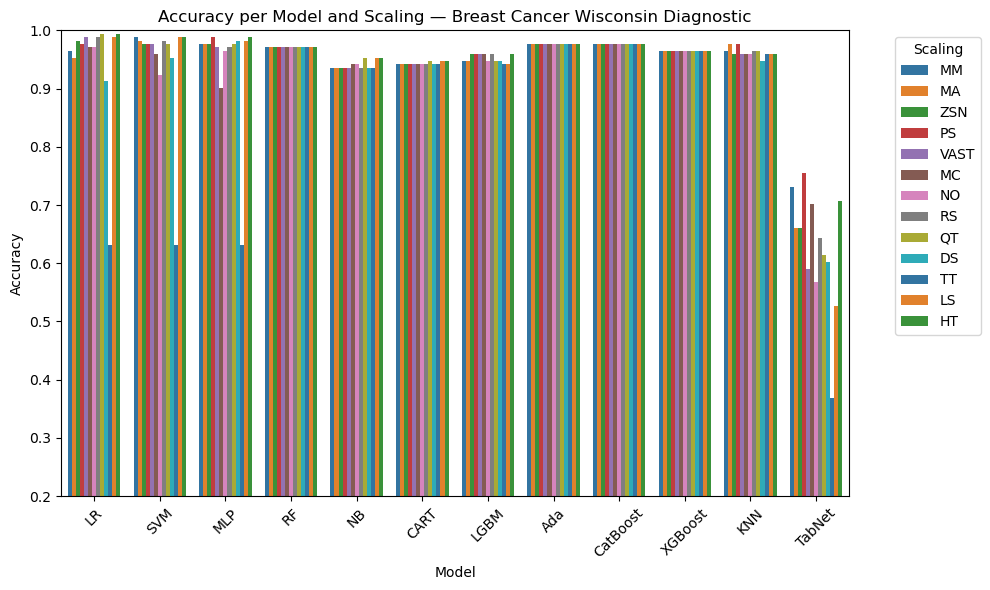

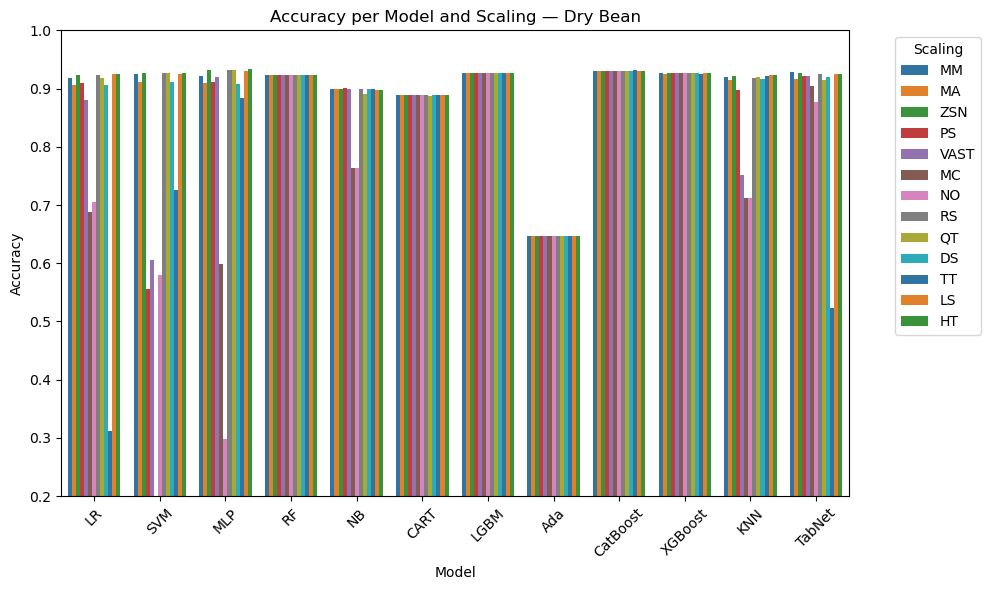

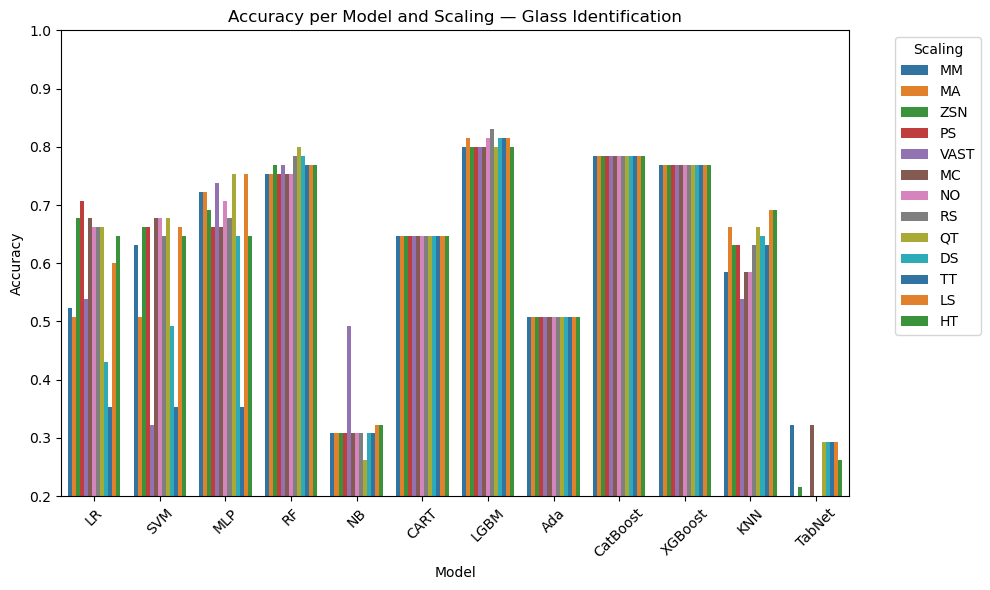

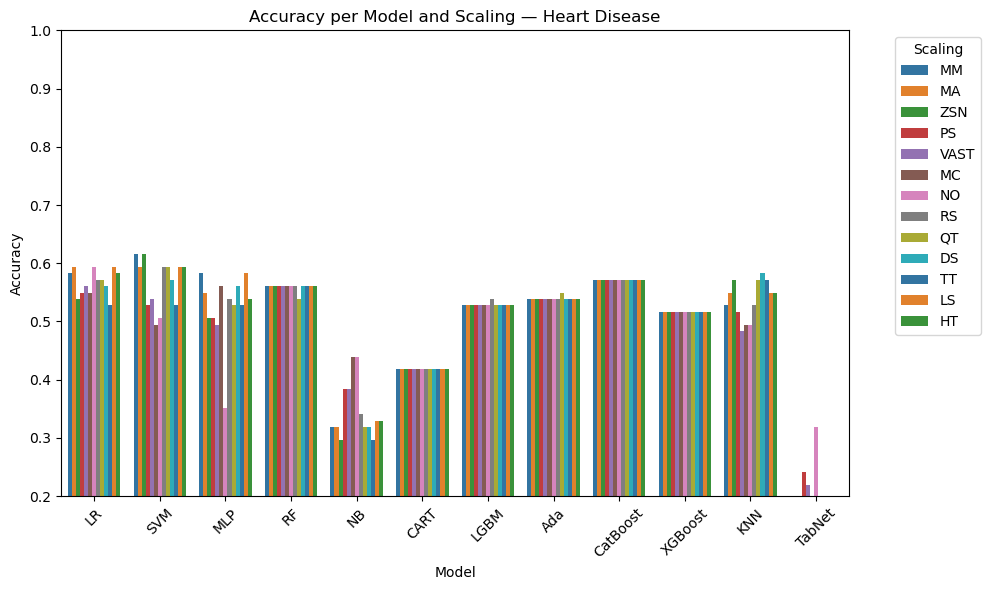

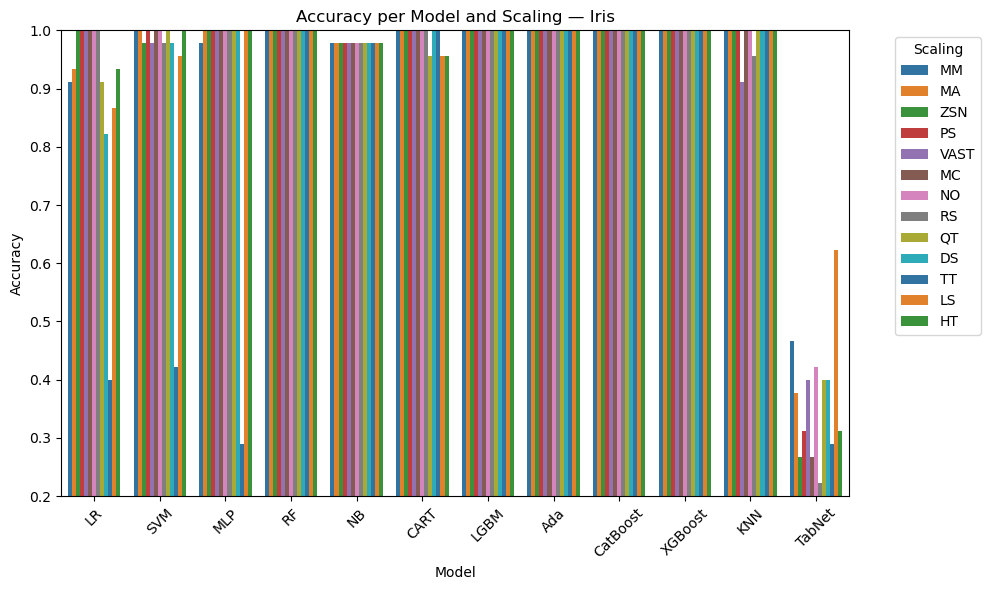

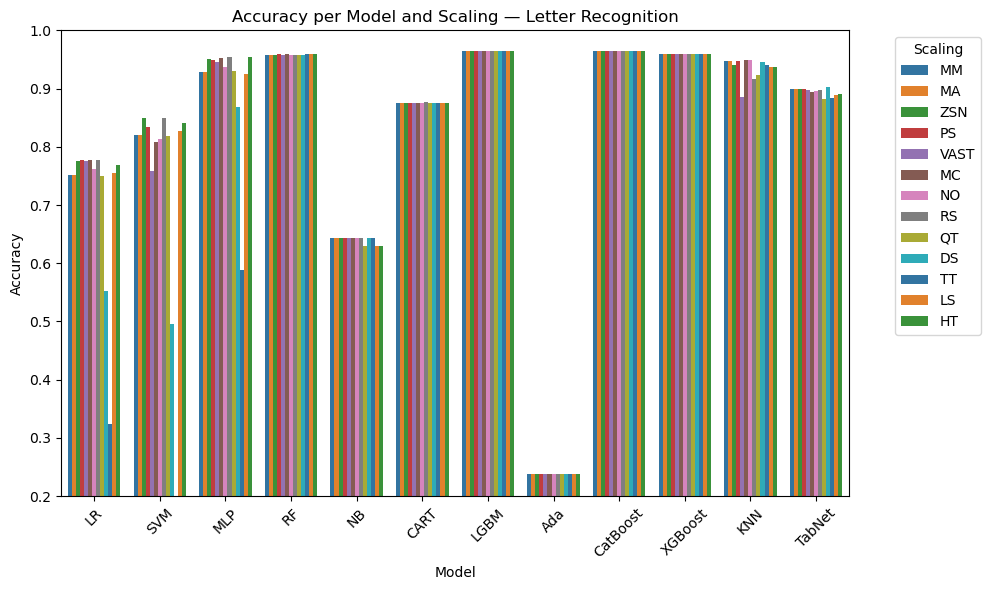

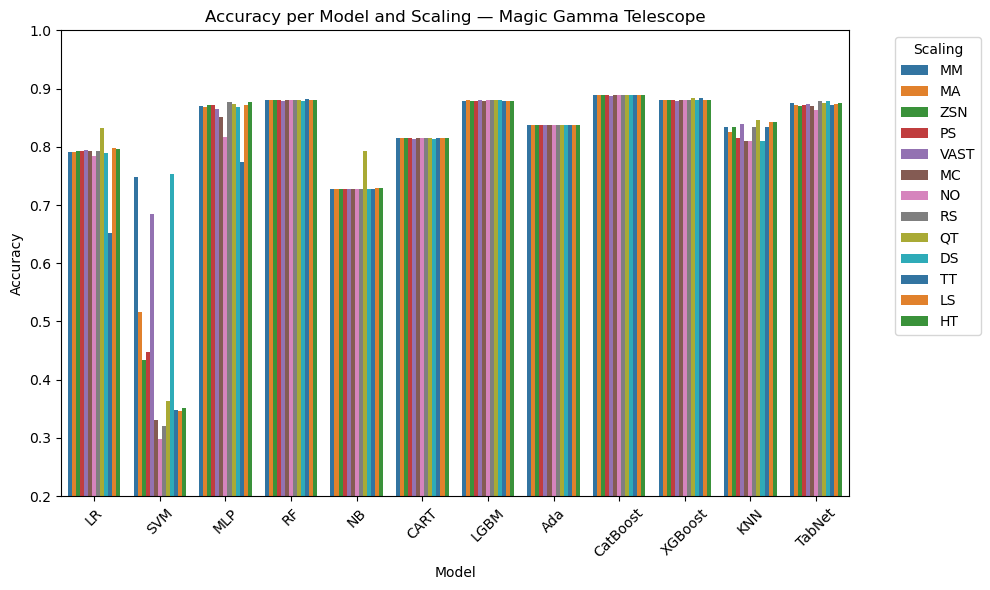

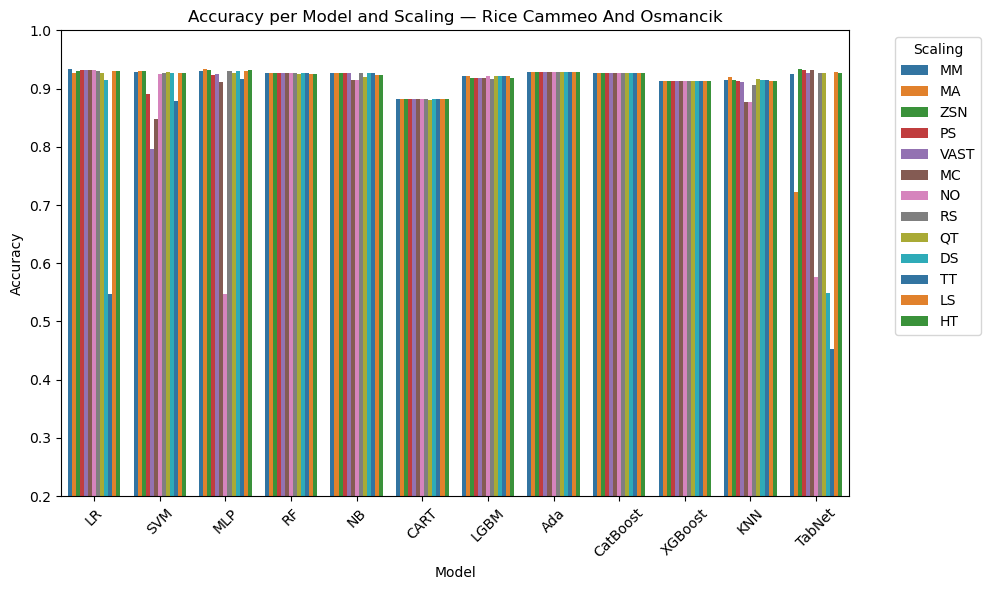

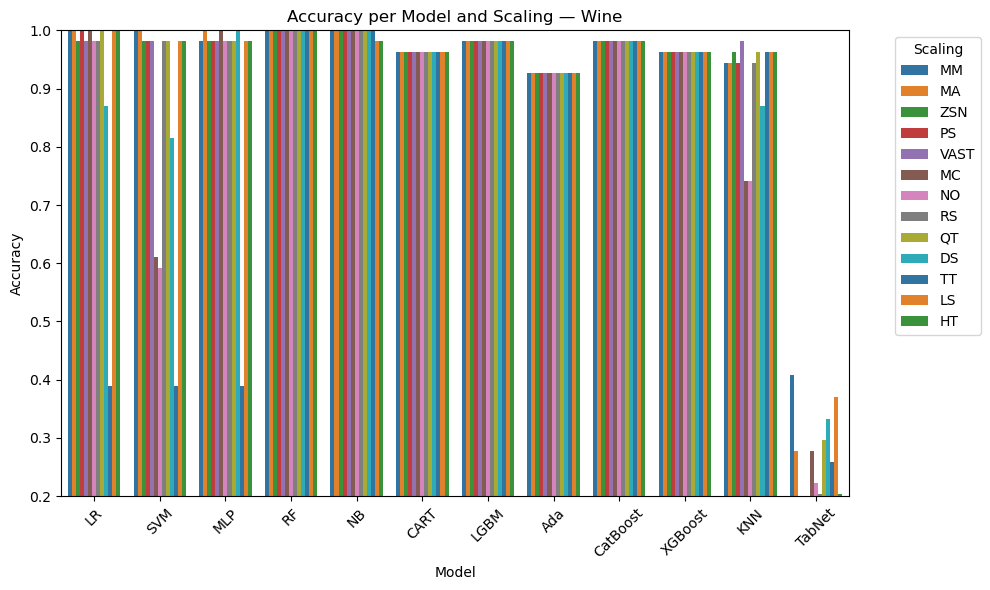

In [9]:
# Create output directory
output_dir = "results/figures_accuracy_scaling"
os.makedirs(output_dir, exist_ok=True)
import pandas as pd
import matplotlib.pyplot as plt

df_class_analysis = df_results['dataset_name'].loc[df_results['accuracy'].notna()].unique()

def bold_max_mask(df):
    return df.eq(df.max(axis=1), axis=0)

for dataset in df_class_analysis:
    df_filtered_class = df_results[df_results['dataset_name'] == dataset]
    heat_df = df_filtered_class.groupby(['model', 'scaling_abbrev'])['accuracy'].mean().unstack()
    heat_df = heat_df.round(4)

    bold_mask = bold_max_mask(heat_df)

    fig, ax = plt.subplots(figsize=(12, 0.5 * len(heat_df) + 2))
    ax.axis('off')
    # ax.set_title(
    #     f"Experimental Results for '{dataset}' Dataset\nMean time_train by Model and Scaling Method",
    #     fontsize=14, weight='bold'
    # )

    table = ax.table(
        cellText=heat_df.values,
        rowLabels=heat_df.index,
        colLabels=heat_df.columns,
        loc='center',
        cellLoc='center'
    )

    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)

    # Bold max values
    for i, row in enumerate(bold_mask.values):
        for j, is_bold in enumerate(row):
            if is_bold:
                cell = table[(i + 1, j)]
                cell.set_fontsize(10)
                cell.set_text_props(weight='bold')

    # Save one PDF per dataset
    plt.savefig(f"{output_dir}/{dataset}_table_accuracy.pdf", bbox_inches='tight')
    plt.close(fig)

# List of datasets to process
datasets = df_results['dataset_name'].loc[df_results['accuracy'].notna()].unique()

for dataset in datasets:
    df_filtered = df_results[df_results['dataset_name'] == dataset]
    nice_title = name_mapping.get(dataset, dataset)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=df_filtered,
        x='model',
        y='accuracy',
        hue='scaling_abbrev',
        palette='tab10'
    )
    plt.title(f"Accuracy per Model and Scaling — {nice_title}")
    plt.ylim(0.2, 1.0)
    plt.xticks(rotation=45)
    plt.ylabel("Accuracy")
    plt.xlabel("Model")
    plt.legend(title="Scaling", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    
    # Save figure
    plt.savefig(f"{output_dir}/{dataset}_accuracy.pdf")
    plt.show()
    plt.close()


### Time to train and time do inference in classifications results

#### Tables and plot time to train

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Create output directory
output_dir = "results/tables_time_train_classification"
os.makedirs(output_dir, exist_ok=True)
df_class_analysis = df_results['dataset_name'].loc[df_results['accuracy'].notna()].unique()

def bold_max_mask(df):
    return df.eq(df.max(axis=1), axis=0)

for dataset in df_class_analysis:
    df_filtered_class = df_results[df_results['dataset_name'] == dataset]
    heat_df = df_filtered_class.groupby(['model', 'scaling_abbrev'])['time_train'].mean().unstack()
    heat_df = heat_df.round(4)

    bold_mask = bold_max_mask(heat_df)

    fig, ax = plt.subplots(figsize=(12, 0.5 * len(heat_df) + 2))
    ax.axis('off')
    # ax.set_title(
    #     f"Experimental Results for '{dataset}' Dataset\nMean time_train by Model and Scaling Method",
    #     fontsize=14, weight='bold'
    # )

    table = ax.table(
        cellText=heat_df.values,
        rowLabels=heat_df.index,
        colLabels=heat_df.columns,
        loc='center',
        cellLoc='center'
    )

    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)

    # Bold max values
    for i, row in enumerate(bold_mask.values):
        for j, is_bold in enumerate(row):
            if is_bold:
                cell = table[(i + 1, j)]
                cell.set_fontsize(10)
                cell.set_text_props(weight='bold')

    # Save one PDF per dataset
    plt.savefig(f"{output_dir}/{dataset}_table_time_train.pdf", bbox_inches='tight')
    plt.close(fig)


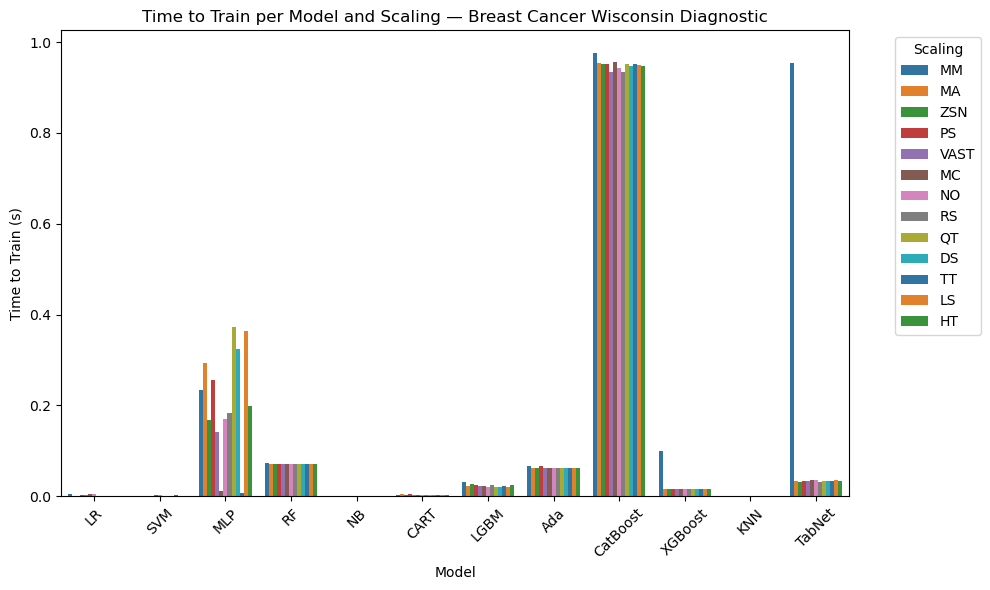

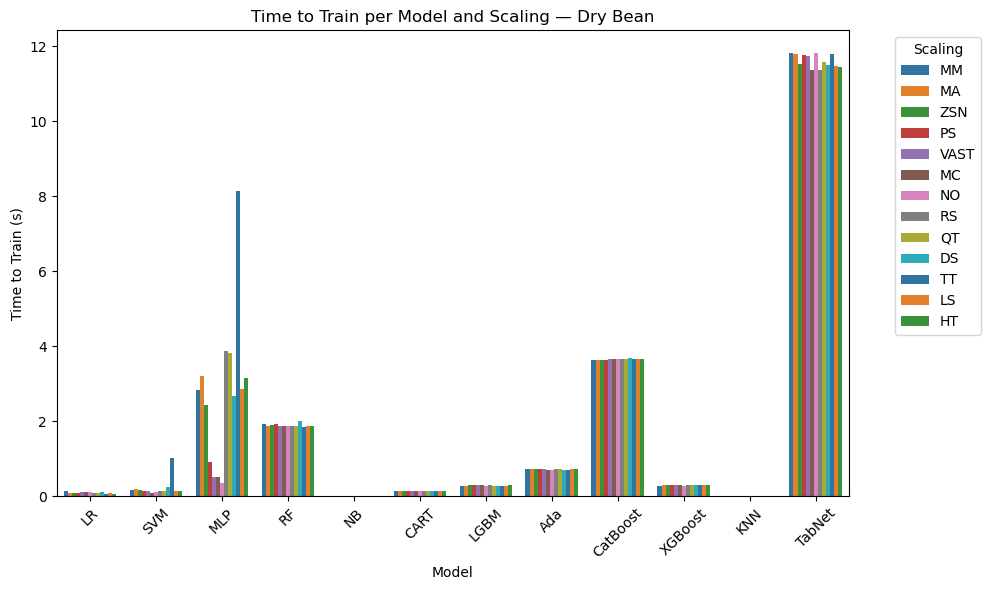

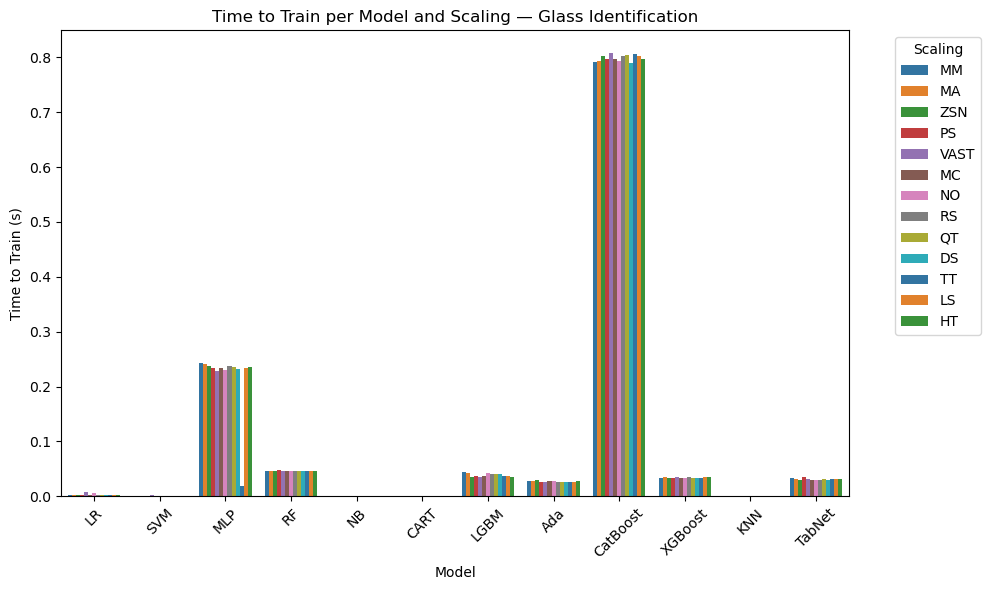

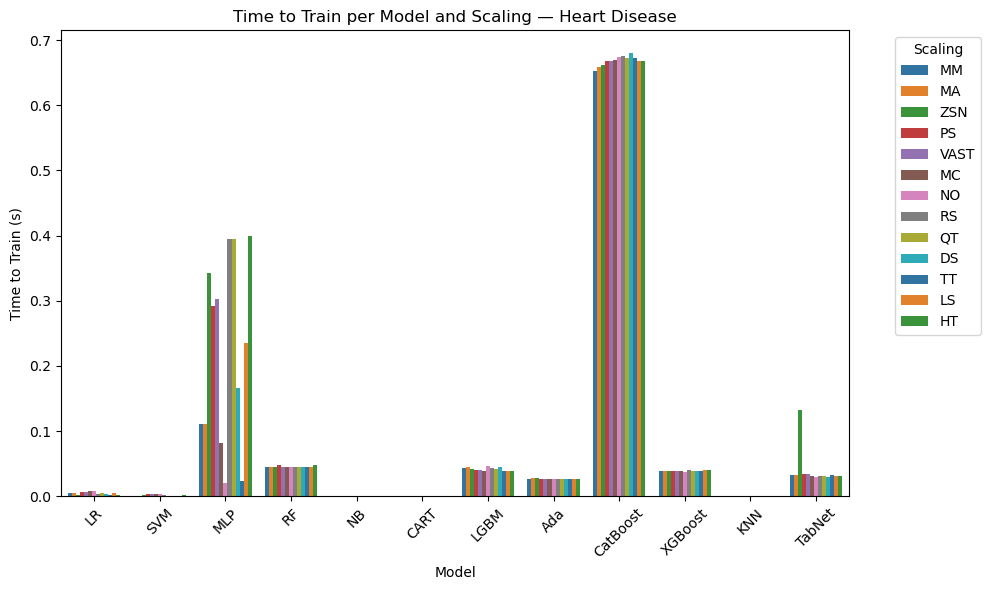

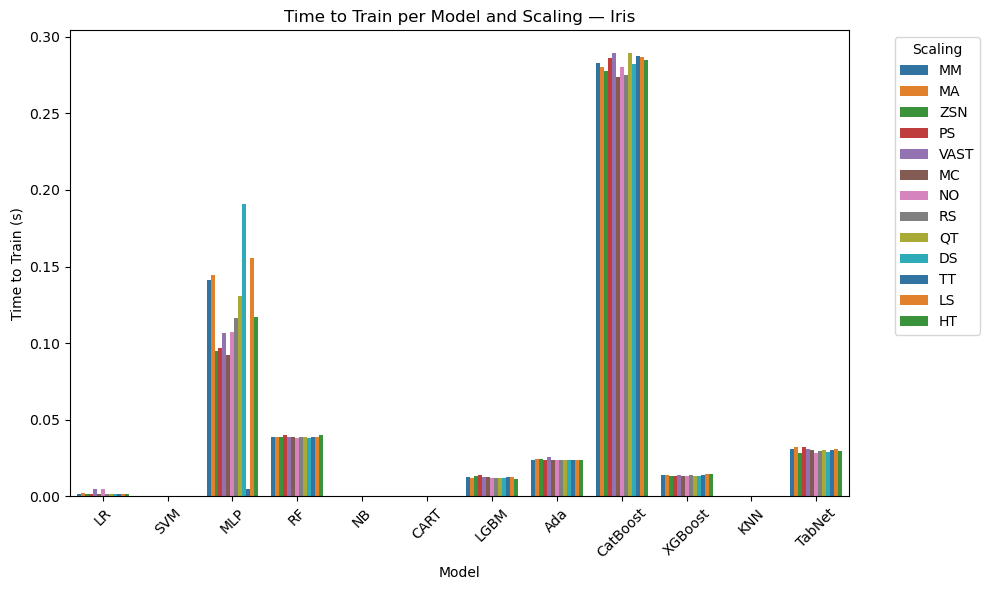

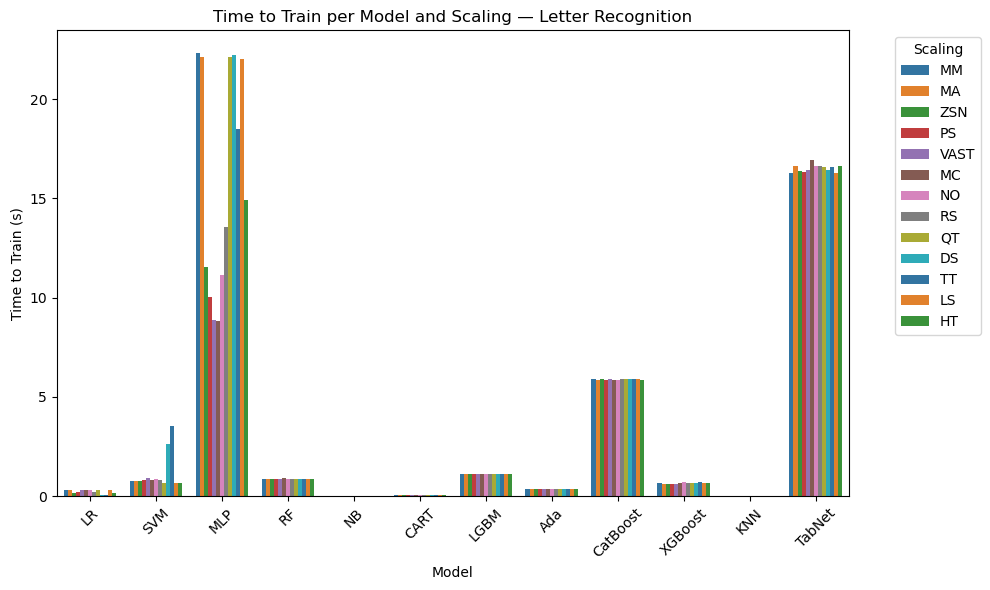

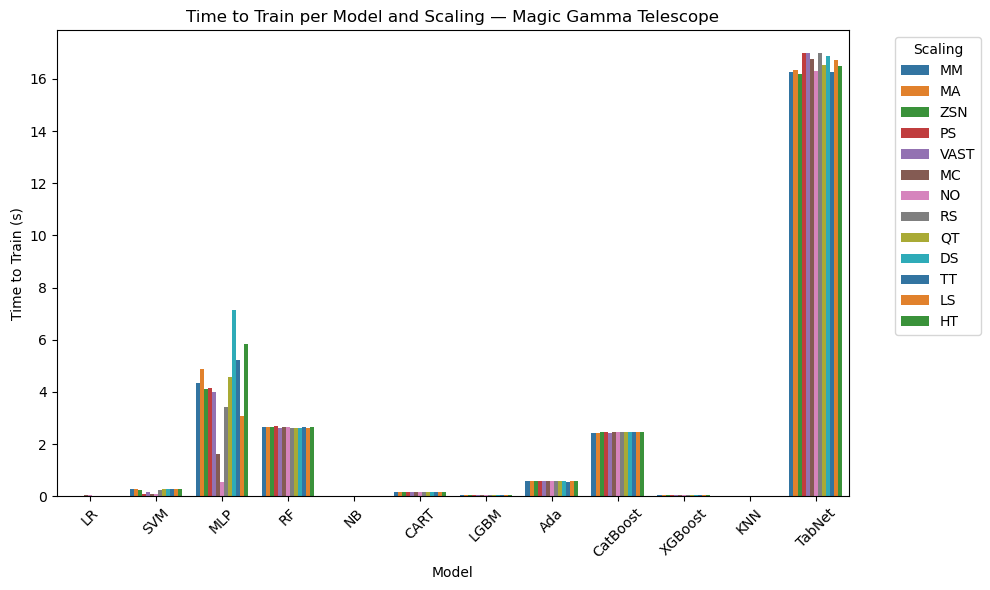

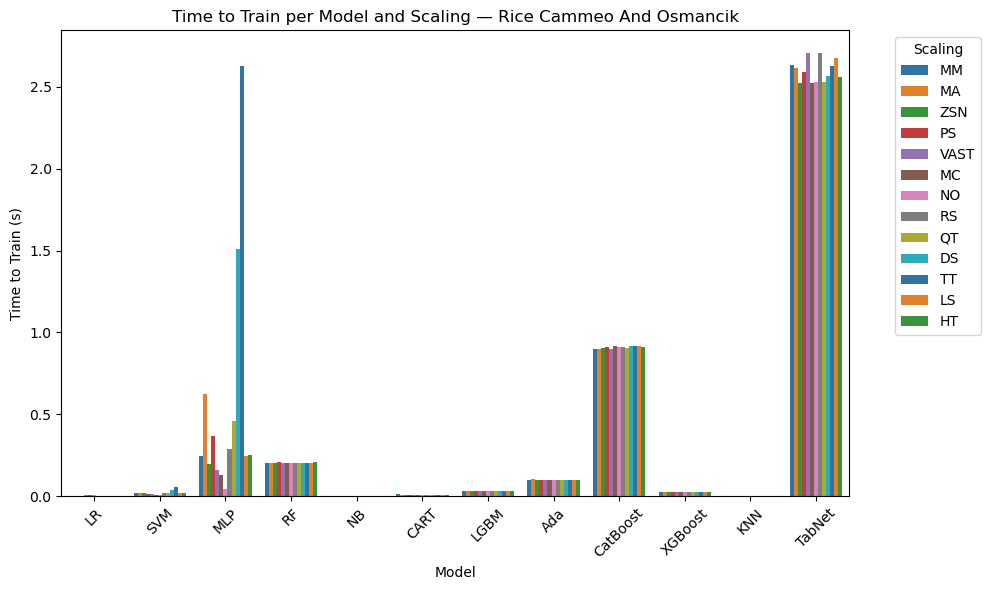

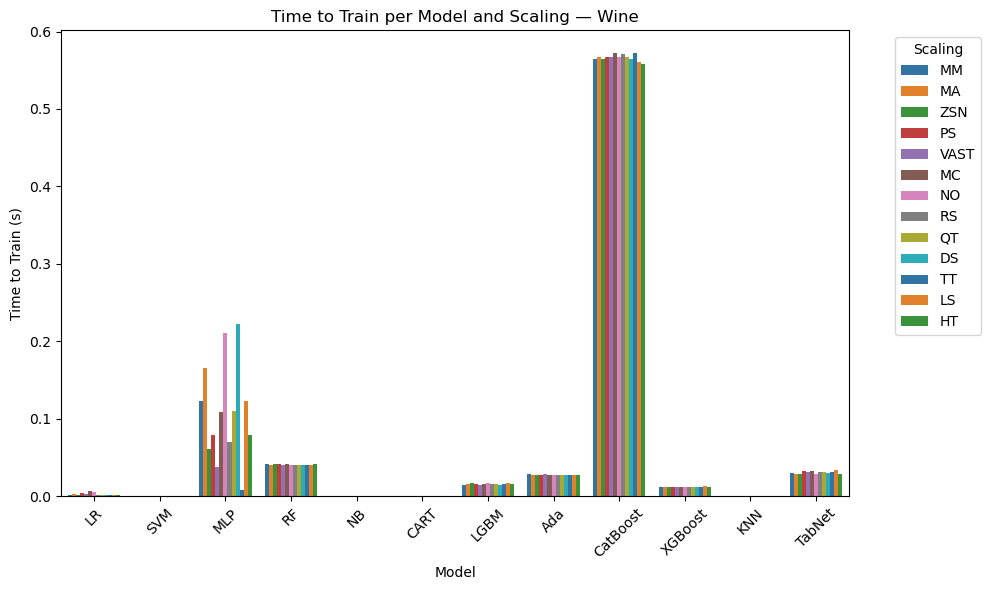

In [11]:
# Create output directory
output_dir = "results/tables_time_train_classification"
os.makedirs(output_dir, exist_ok=True)

# List of datasets to process
datasets = df_results['dataset_name'].loc[df_results['accuracy'].notna()].unique()

for dataset in datasets:
    df_filtered = df_results[df_results['dataset_name'] == dataset]
    nice_title = name_mapping.get(dataset, dataset)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=df_filtered,
        x='model',
        y='time_train',
        hue='scaling_abbrev',
        palette='tab10'
    )
    plt.title(f"Time to Train per Model and Scaling — {nice_title}")
    plt.ylim()
    plt.xticks(rotation=45)
    plt.ylabel("Time to Train (s)")
    plt.xlabel("Model")
    plt.legend(title="Scaling", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    
    # Save figure
    plt.savefig(f"{output_dir}/{dataset}_train_time.pdf")
    plt.show()
    plt.close()


#### Tables and plot time to inference

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Create output directory
output_dir = "results/tables_time_inference_classification"
os.makedirs(output_dir, exist_ok=True)
df_class_analysis = df_results['dataset_name'].loc[df_results['accuracy'].notna()].unique()

def bold_max_mask(df):
    return df.eq(df.max(axis=1), axis=0)

for dataset in df_class_analysis:
    df_filtered_class = df_results[df_results['dataset_name'] == dataset]
    heat_df = df_filtered_class.groupby(['model', 'scaling_abbrev'])['time_inference'].mean().unstack()
    heat_df = heat_df.round(4)

    bold_mask = bold_max_mask(heat_df)

    fig, ax = plt.subplots(figsize=(12, 0.5 * len(heat_df) + 2))
    ax.axis('off')
    # ax.set_title(
    #     f"Experimental Results for '{dataset}' Dataset\nMean time_train by Model and Scaling Method",
    #     fontsize=14, weight='bold'
    # )

    table = ax.table(
        cellText=heat_df.values,
        rowLabels=heat_df.index,
        colLabels=heat_df.columns,
        loc='center',
        cellLoc='center'
    )

    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)

    # Bold max values
    for i, row in enumerate(bold_mask.values):
        for j, is_bold in enumerate(row):
            if is_bold:
                cell = table[(i + 1, j)]
                cell.set_fontsize(10)
                cell.set_text_props(weight='bold')

    # Save one PDF per dataset
    plt.savefig(f"{output_dir}/{dataset}_table_time_inference.pdf", bbox_inches='tight')
    plt.close(fig)


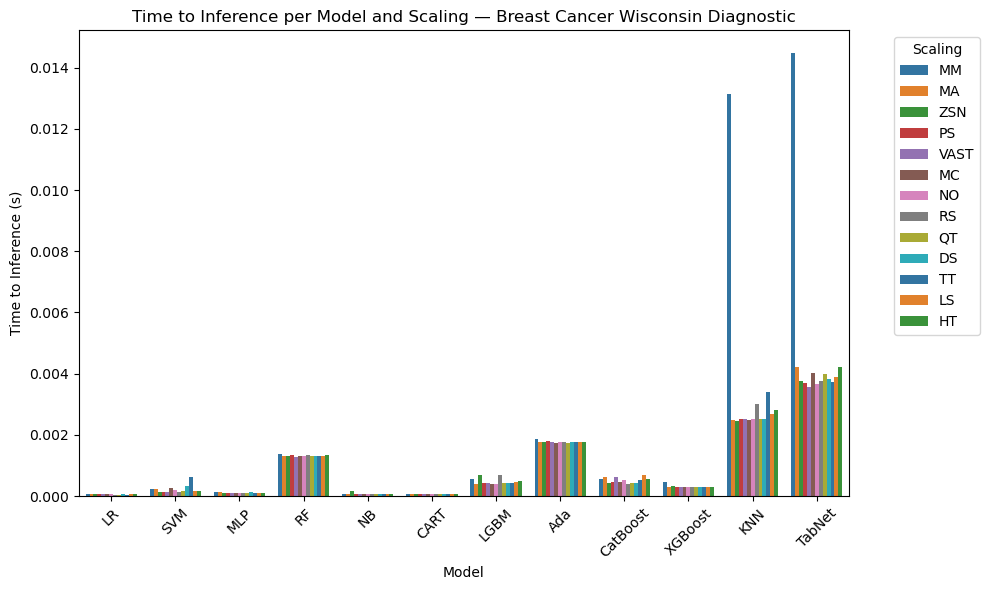

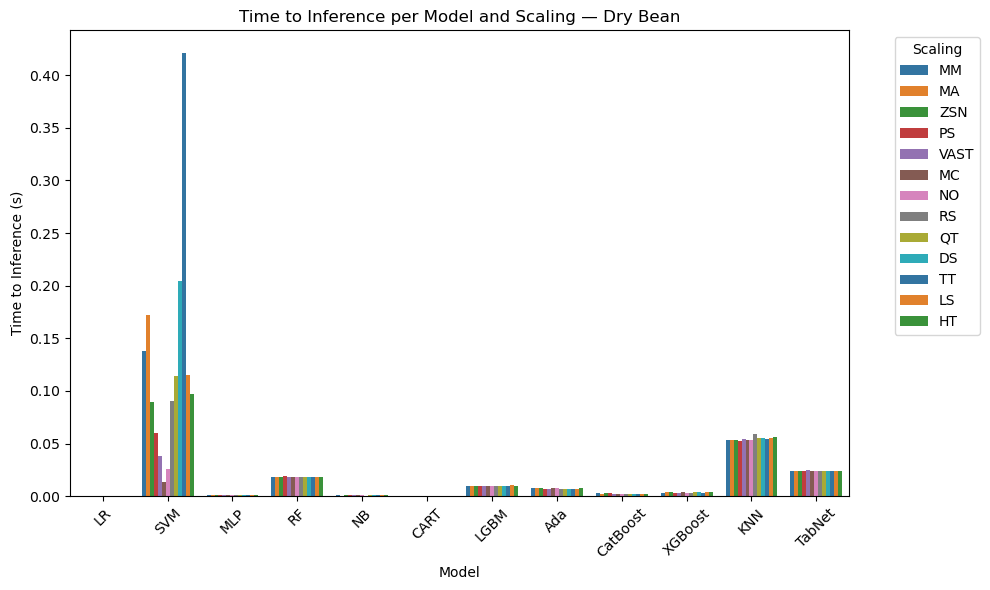

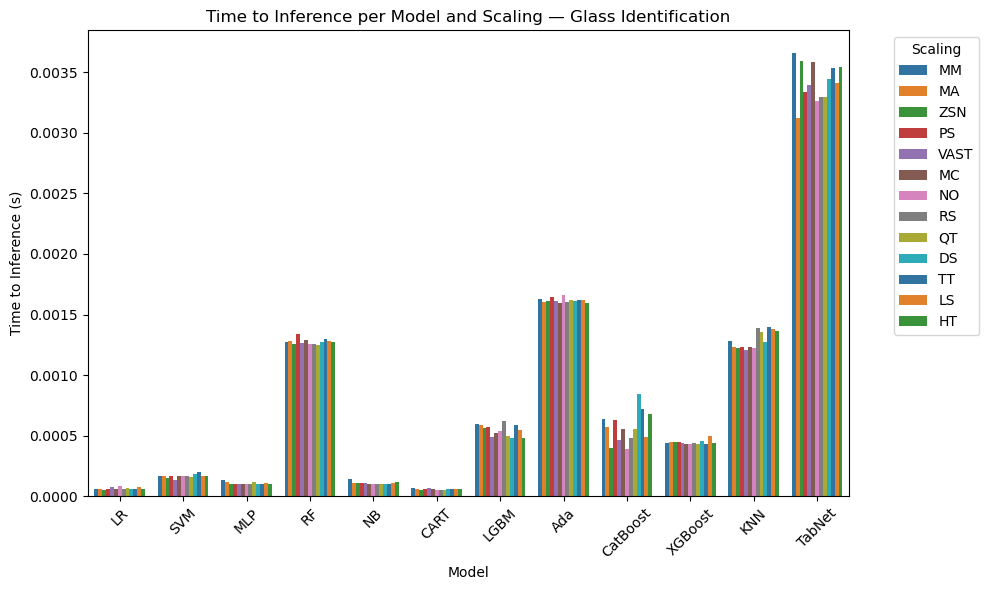

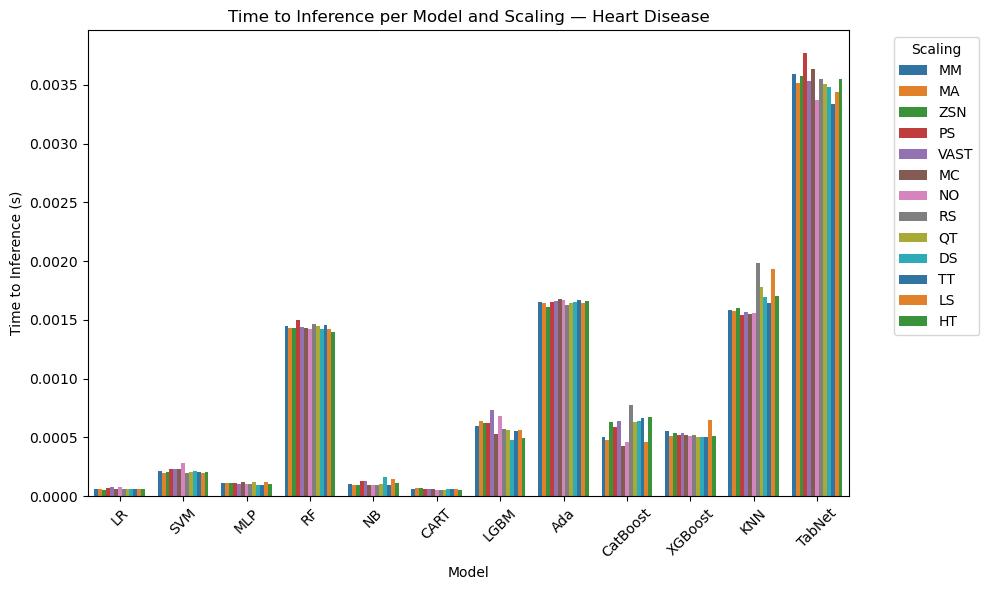

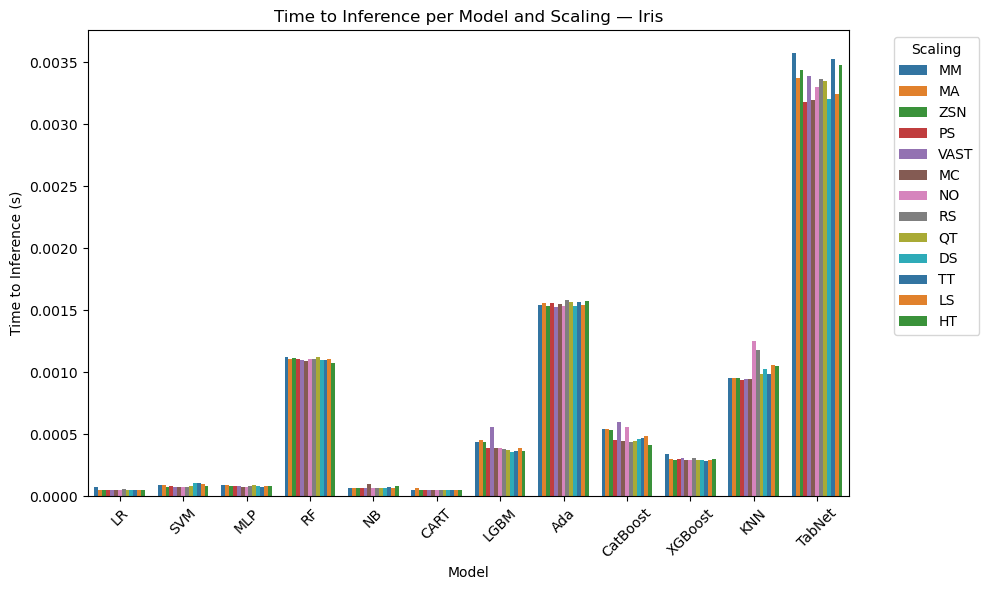

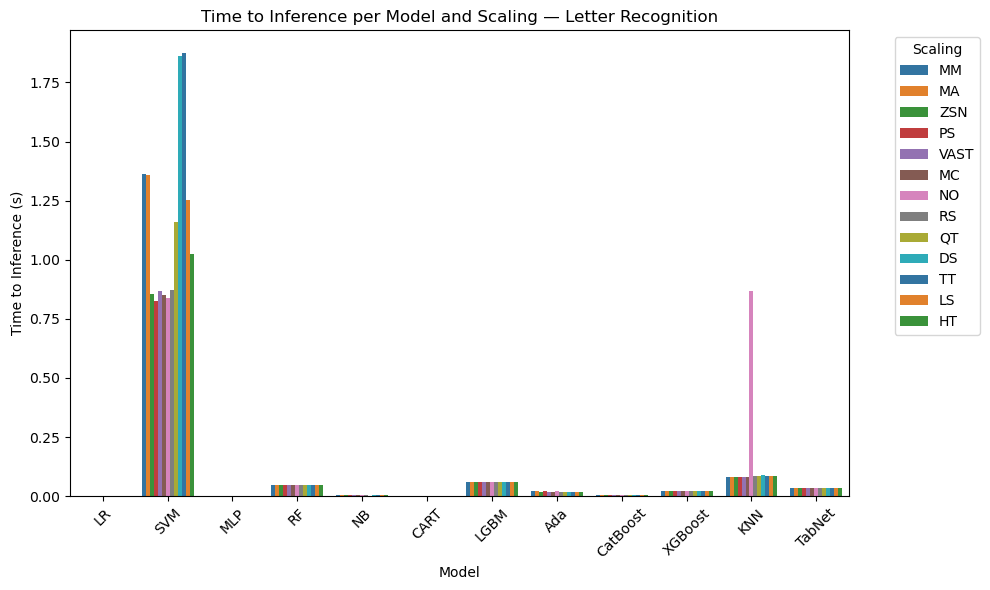

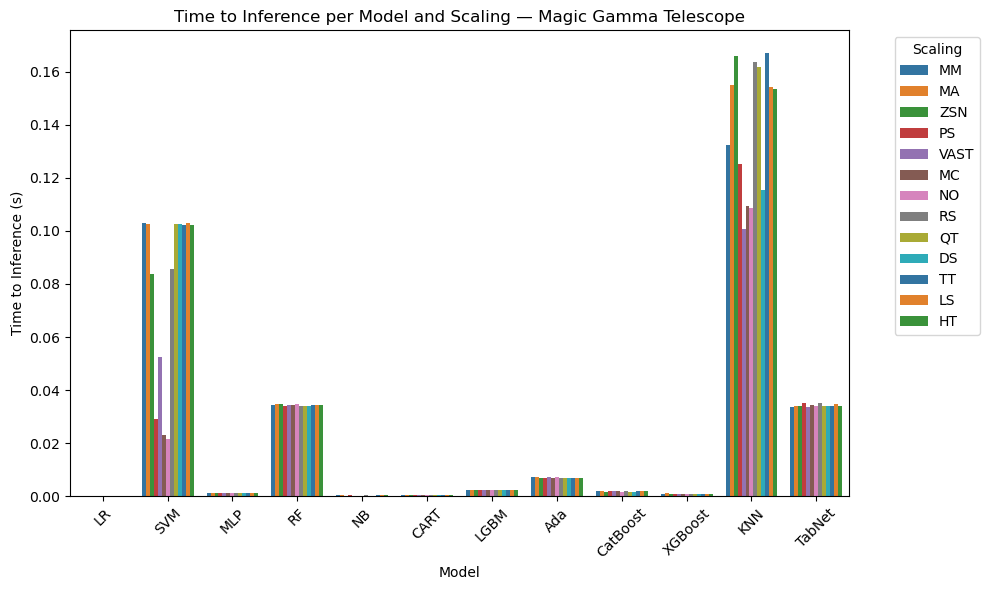

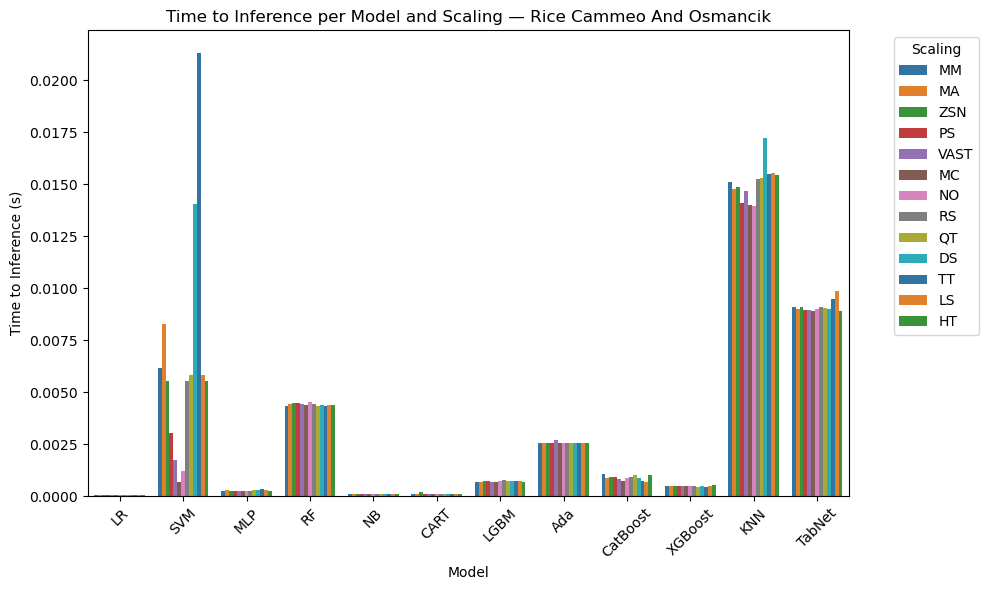

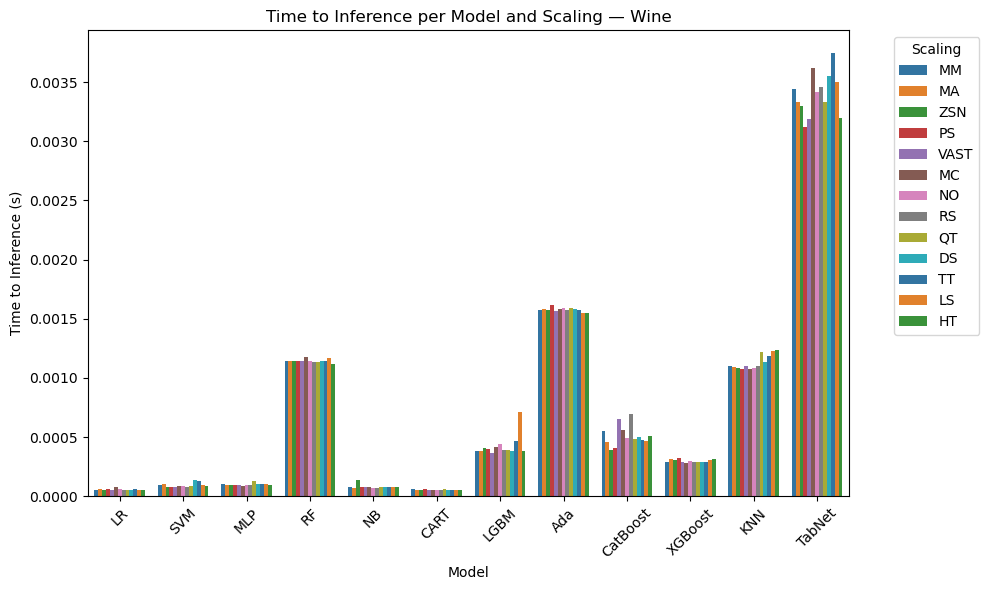

In [13]:
# Create output directory
os.makedirs(output_dir, exist_ok=True)

# List of datasets to process
datasets = df_results['dataset_name'].loc[df_results['accuracy'].notna()].unique()

for dataset in datasets:
    df_filtered = df_results[df_results['dataset_name'] == dataset]
    nice_title = name_mapping.get(dataset, dataset)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=df_filtered,
        x='model',
        y='time_inference',
        hue='scaling_abbrev',
        palette='tab10'
    )
    plt.title(f"Time to Inference per Model and Scaling — {nice_title}")
    plt.ylim()
    plt.xticks(rotation=45)
    plt.ylabel("Time to Inference (s)")
    plt.xlabel("Model")
    plt.legend(title="Scaling", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    
    # Save figure
    plt.savefig(f"{output_dir}/{dataset}_inference_time.pdf")
    plt.show()
    plt.close()


### Memory usage for each scaling

In [14]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Create output directory
# output_dir = "results/tables_memory_classification"
# os.makedirs(output_dir, exist_ok=True)
# df_class_analysis = df_results['dataset_name'].loc[df_results['accuracy'].notna()].unique()

# def bold_max_mask(df):
#     return df.eq(df.max(axis=1), axis=0)

# for dataset in df_class_analysis:
#     df_filtered_class = df_results[df_results['dataset_name'] == dataset]
#     heat_df = df_filtered_class.groupby(['model', 'scaling_abbrev'])['memory_used_kb'].mean().unstack()
#     heat_df = heat_df.round(4)

#     bold_mask = bold_max_mask(heat_df)

#     fig, ax = plt.subplots(figsize=(12, 0.5 * len(heat_df) + 2))
#     ax.axis('off')
#     # ax.set_title(
#     #     f"Experimental Results for '{dataset}' Dataset\nMean time_train by Model and Scaling Method",
#     #     fontsize=14, weight='bold'
#     # )

#     table = ax.table(
#         cellText=heat_df.values,
#         rowLabels=heat_df.index,
#         colLabels=heat_df.columns,
#         loc='center',
#         cellLoc='center'
#     )

#     table.auto_set_font_size(False)
#     table.set_fontsize(10)
#     table.scale(1, 1.5)

#     # Bold max values
#     for i, row in enumerate(bold_mask.values):
#         for j, is_bold in enumerate(row):
#             if is_bold:
#                 cell = table[(i + 1, j)]
#                 cell.set_fontsize(10)
#                 cell.set_text_props(weight='bold')

#     # Save one PDF per dataset
#     plt.savefig(f"{output_dir}/{dataset}_table_memory.pdf", bbox_inches='tight')
#     plt.close(fig)


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Assume df_results is a pre-existing DataFrame with your experimental data
# It should contain columns: 'dataset_name', 'scaling_abbrev', 'memory_used_kb', 'accuracy'

# Create output directory if it doesn't exist
output_dir = "results/tables_memory_classification"
os.makedirs(output_dir, exist_ok=True)

# Get unique dataset names that have valid results
df_class_analysis = df_results['dataset_name'].loc[df_results['accuracy'].notna()].unique()

# --- Adjusted Logic Starts Here ---

# 1. Create a dictionary to hold the mean memory usage for each dataset
mean_memory_data = {}

# 2. Loop through each dataset to calculate the mean memory per scaling method
for dataset in df_class_analysis:
    df_filtered_class = df_results[df_results['dataset_name'] == dataset]
    
    # Group by ONLY the scaling abbreviation and calculate the mean memory across all models
    mean_memory_by_scaling = df_filtered_class.groupby('scaling_abbrev')['memory_used_kb'].mean()
    
    # Add the result (a pandas Series) to our dictionary
    mean_memory_data[dataset] = mean_memory_by_scaling

# 3. Create a single, consolidated DataFrame from the dictionary of results
# The .T transposes the DataFrame, making datasets the rows and scalings the columns.
final_summary_df = pd.DataFrame(mean_memory_data).T

# Round the data for cleaner presentation
final_summary_df = final_summary_df.round(4)

# Optional: Sort columns alphabetically for consistency
final_summary_df = final_summary_df.reindex(sorted(final_summary_df.columns), axis=1)


# 4. Generate and save the final table visualization
# Adjust figsize dynamically based on the number of datasets
fig, ax = plt.subplots(figsize=(14, 0.5 * len(final_summary_df) + 1.5))
ax.axis('off')
ax.set_title(
    "Mean Memory Usage (Kb) by Dataset and Scaling Method",
    fontsize=16, weight='bold', pad=20
)

table = ax.table(
    cellText=final_summary_df.values,
    rowLabels=final_summary_df.index,
    colLabels=final_summary_df.columns,
    loc='center',
    cellLoc='center'
)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.8) # Adjusted scale for better readability

# Save the single consolidated table to a PDF
output_path = f"{output_dir}/summary_mean_memory_by_scaling.pdf"
plt.savefig(output_path, bbox_inches='tight')
plt.close(fig)

In [16]:
# # Create output directory
# os.makedirs(output_dir, exist_ok=True)

# # List of datasets to process
# datasets = df_results['dataset_name'].loc[df_results['accuracy'].notna()].unique()

# for dataset in datasets:
#     df_filtered = df_results[df_results['dataset_name'] == dataset]
#     nice_title = name_mapping.get(dataset, dataset)
    
#     plt.figure(figsize=(10, 6))
#     sns.barplot(
#         data=df_filtered,
#         x='model',
#         y='memory_used_kb',
#         hue='scaling_abbrev',
#         palette='tab10'
#     )
#     plt.title(f"Memory Usage (Kb) per Model and Scaling — {nice_title}")
#     plt.ylim()
#     plt.xticks(rotation=45)
#     plt.ylabel("Memory Usage (Kb)")
#     plt.xlabel("Model")
#     plt.legend(title="Scaling", bbox_to_anchor=(1.05, 1), loc='upper left')
#     plt.tight_layout()
    
#     # Save figure
#     plt.savefig(f"{output_dir}/{dataset}_memory.pdf")
#     plt.show()
#     plt.close()


## Classifications Results

### Regression results for in each dataset for each model and scaling

#### $R^2$

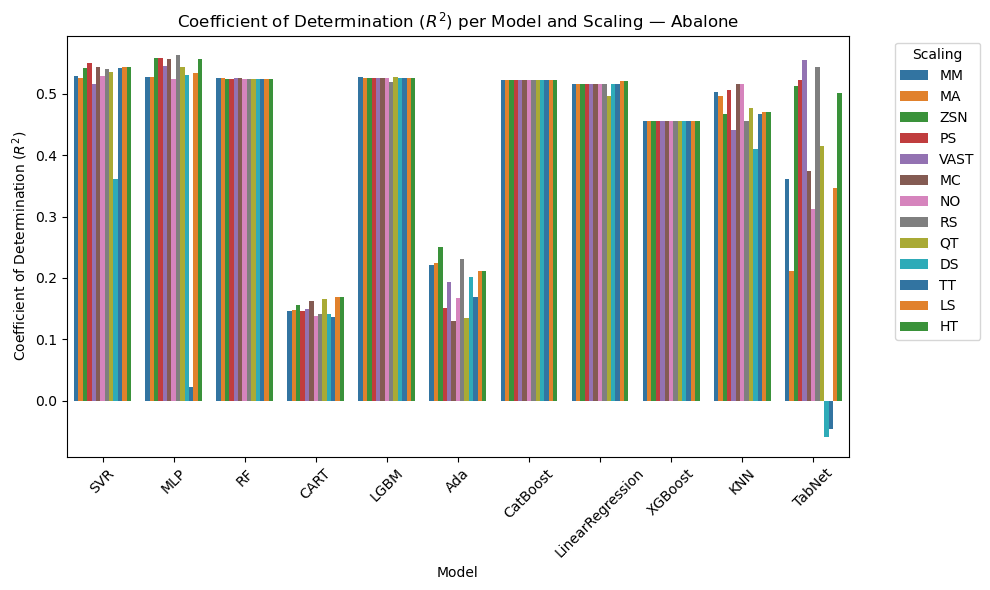

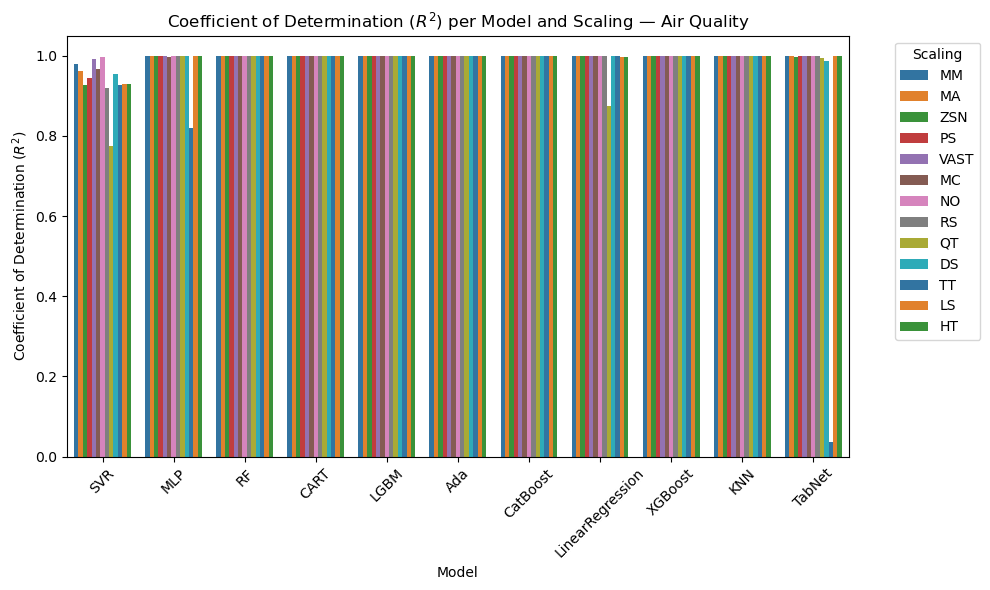

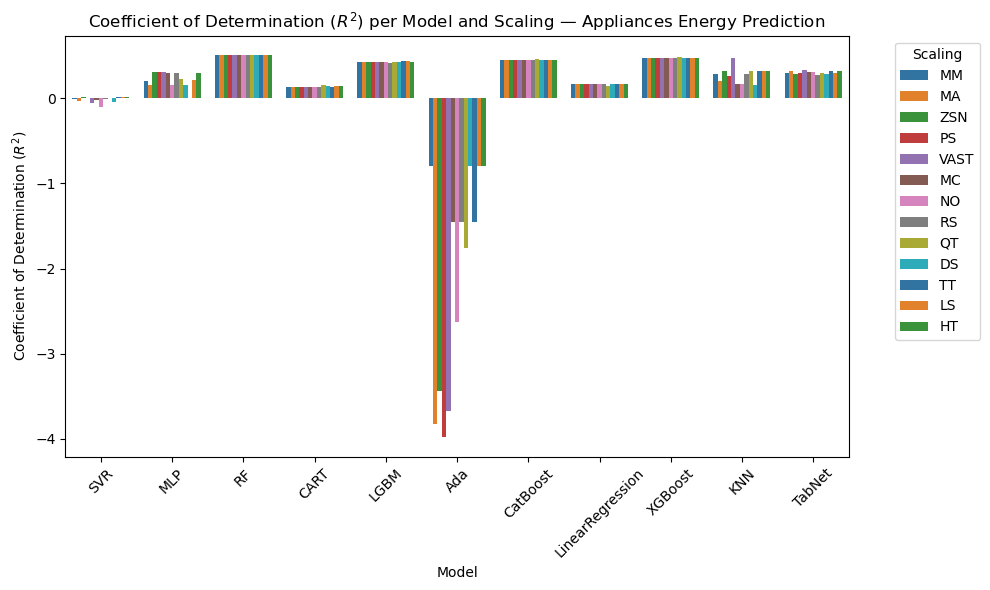

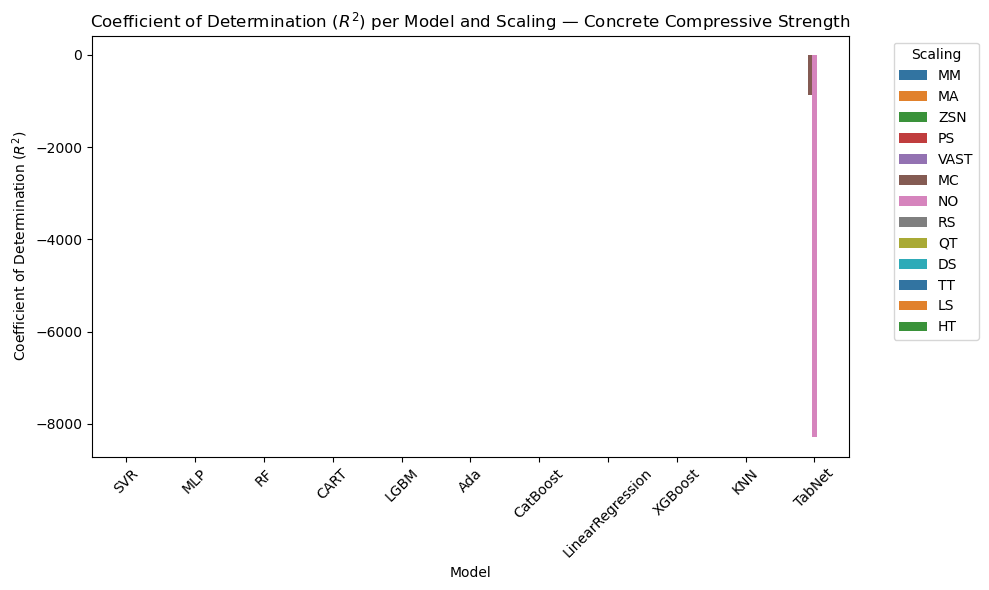

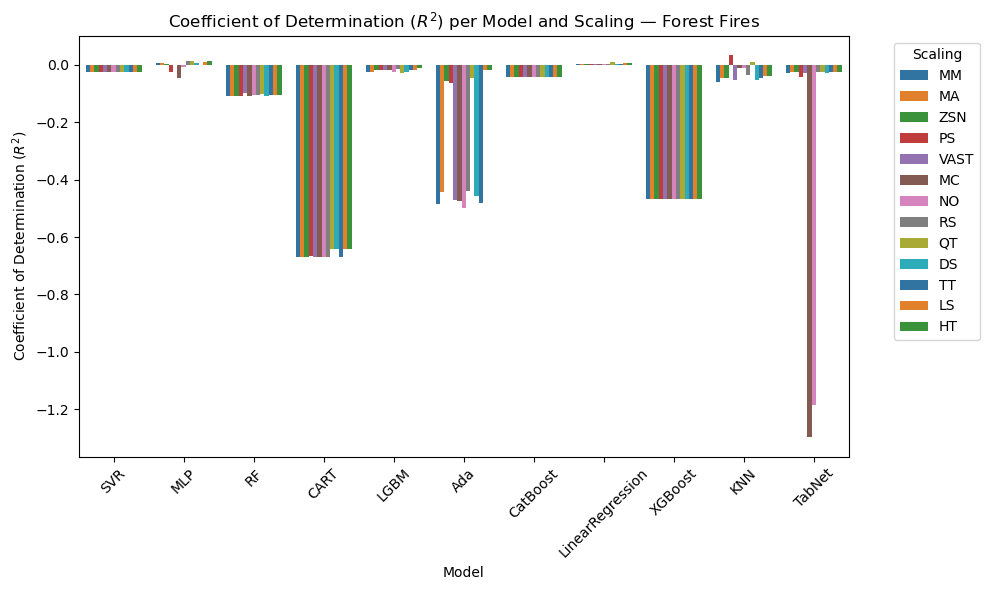

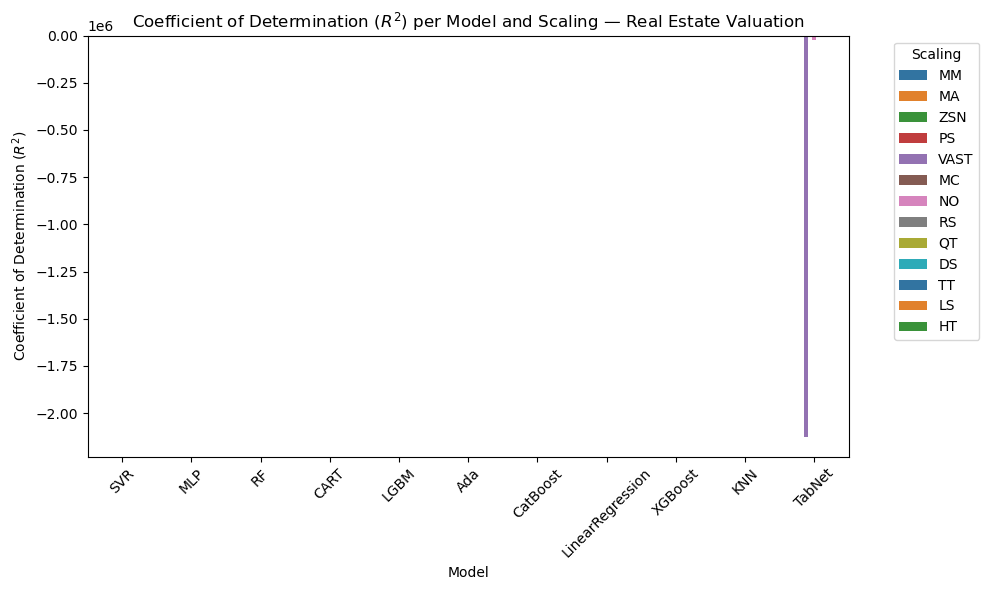

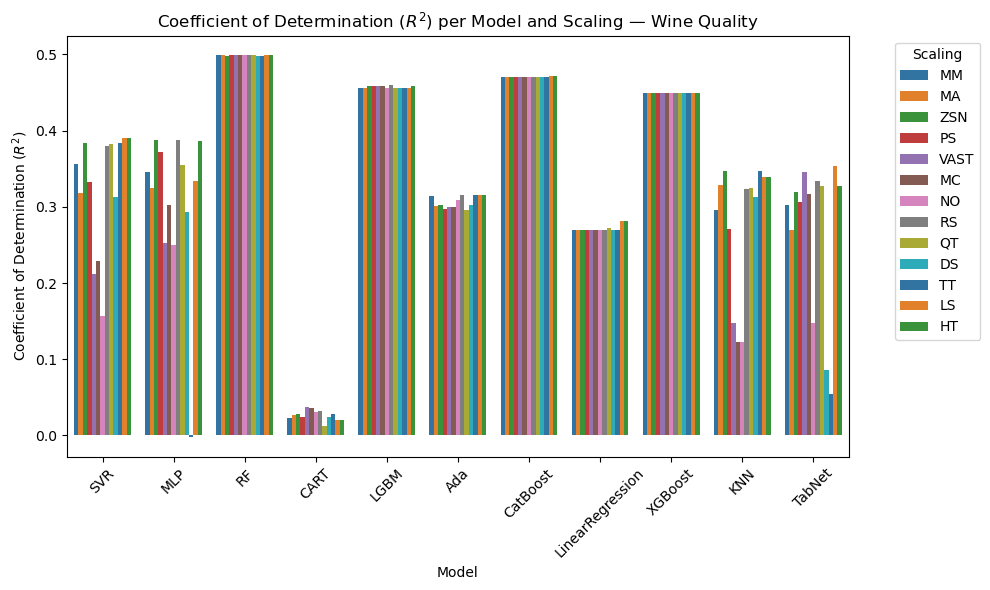

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Create output directory
output_dir = "results/tables_r2_regression"
os.makedirs(output_dir, exist_ok=True)
df_class_analysis = df_results['dataset_name'].loc[df_results['r2score'].notna()].unique()

def bold_max_mask(df):
    return df.eq(df.max(axis=1), axis=0)

for dataset in df_class_analysis:
    df_filtered_class = df_results[df_results['dataset_name'] == dataset]
    heat_df = df_filtered_class.groupby(['model', 'scaling_abbrev'])['r2score'].mean().unstack()
    heat_df = heat_df.round(4)

    bold_mask = bold_max_mask(heat_df)

    fig, ax = plt.subplots(figsize=(12, 0.5 * len(heat_df) + 2))
    ax.axis('off')
    # ax.set_title(
    #     f"Experimental Results for '{dataset}' Dataset\nMean time_train by Model and Scaling Method",
    #     fontsize=14, weight='bold'
    # )

    table = ax.table(
        cellText=heat_df.values,
        rowLabels=heat_df.index,
        colLabels=heat_df.columns,
        loc='center',
        cellLoc='center'
    )

    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)

    # Bold max values
    for i, row in enumerate(bold_mask.values):
        for j, is_bold in enumerate(row):
            if is_bold:
                cell = table[(i + 1, j)]
                cell.set_fontsize(10)
                cell.set_text_props(weight='bold')

    # Save one PDF per dataset
    plt.savefig(f"{output_dir}/{dataset}_table_r2score.pdf", bbox_inches='tight')
    plt.close(fig)

# Create output directory
os.makedirs(output_dir, exist_ok=True)

# List of datasets to process
datasets = df_results['dataset_name'].loc[df_results['r2score'].notna()].unique()

for dataset in datasets:
    df_filtered = df_results[df_results['dataset_name'] == dataset]
    nice_title = name_mapping.get(dataset, dataset)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=df_filtered,
        x='model',
        y='r2score',
        hue='scaling_abbrev',
        palette='tab10'
    )
    plt.title(f"Coefficient of Determination ($R^2$) per Model and Scaling — {nice_title}")
    plt.ylim()
    plt.xticks(rotation=45)
    plt.ylabel("Coefficient of Determination ($R^2$)")
    plt.xlabel("Model")
    plt.legend(title="Scaling", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    
    # Save figure
    plt.savefig(f"{output_dir}/{dataset}_r2score.pdf")
    plt.show()
    plt.close()


#### Mean Squared Error (MSE)

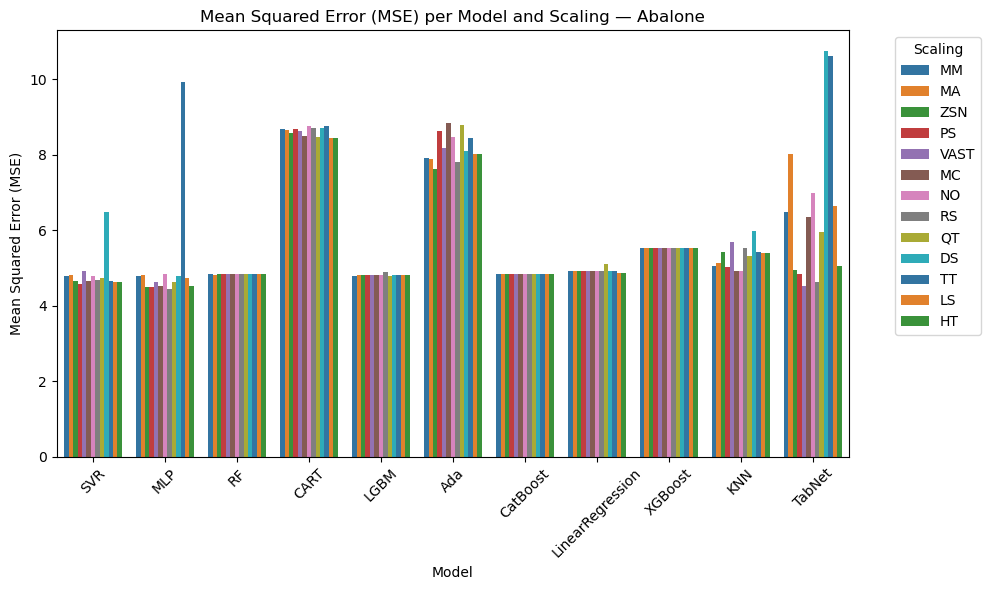

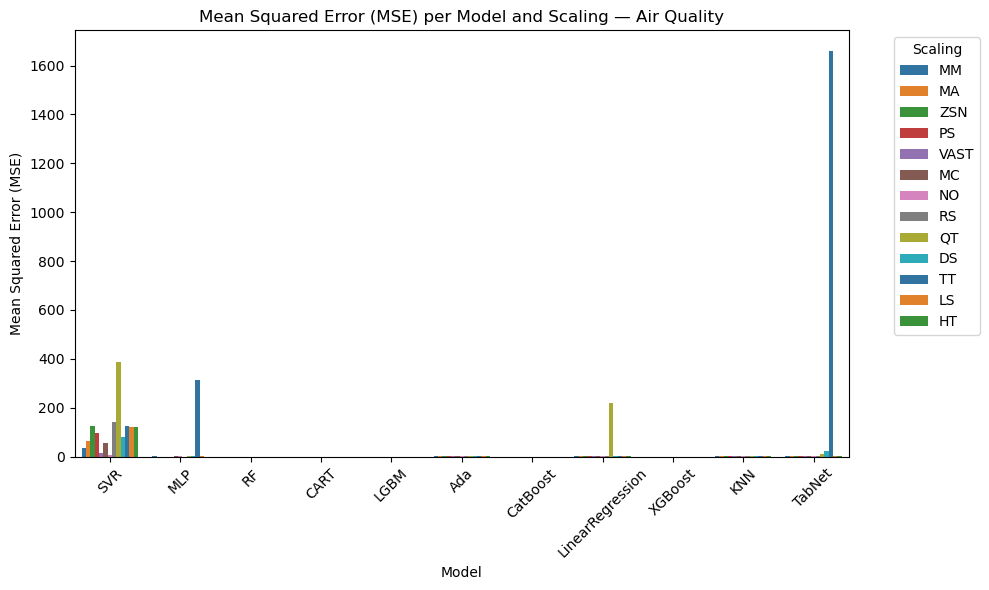

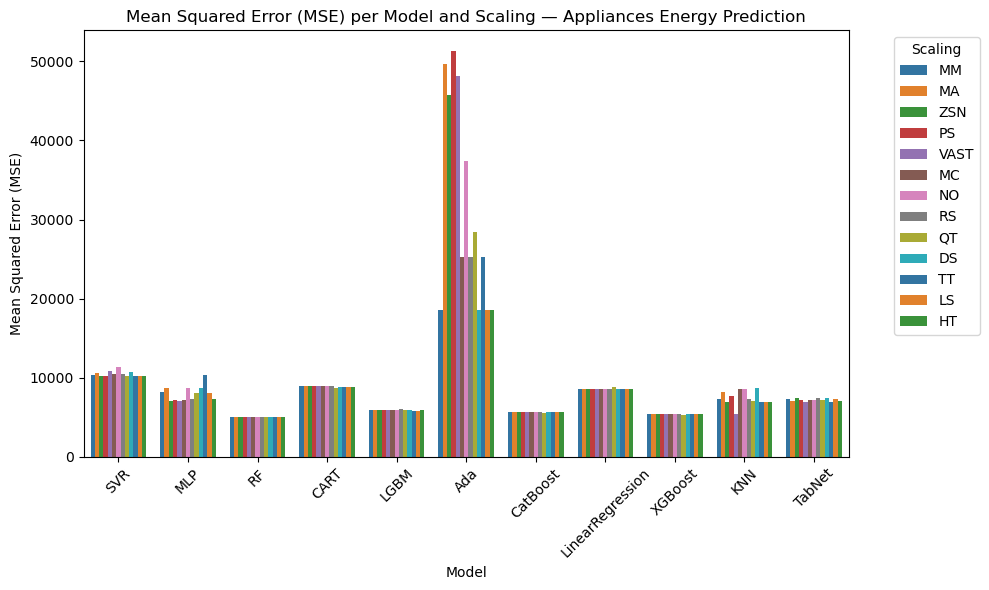

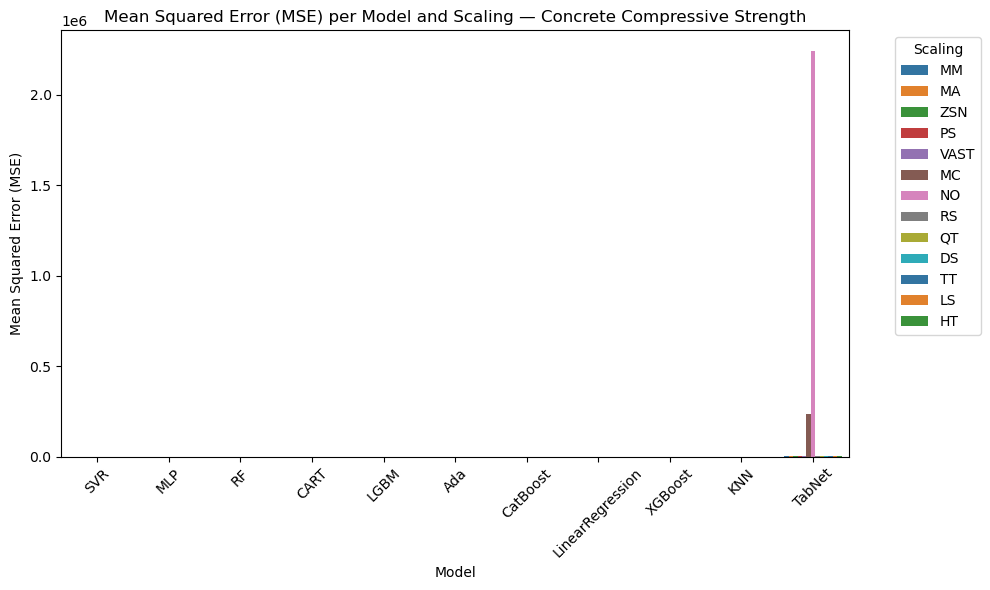

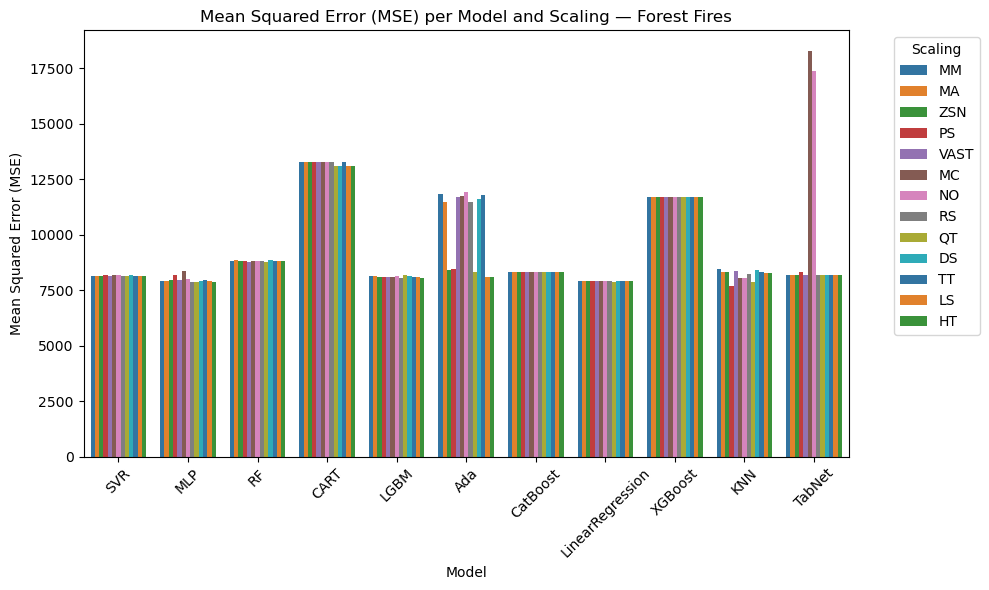

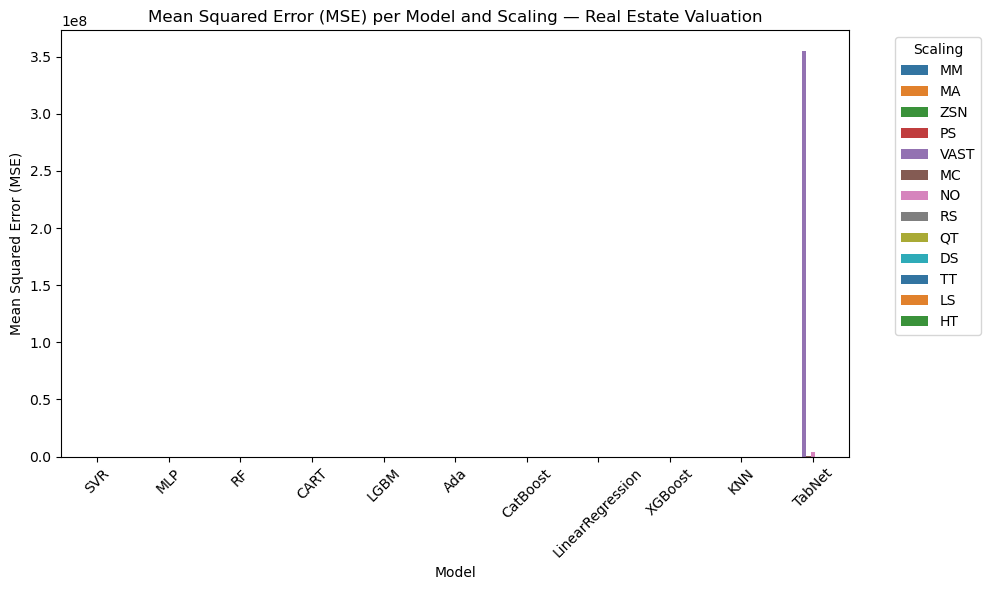

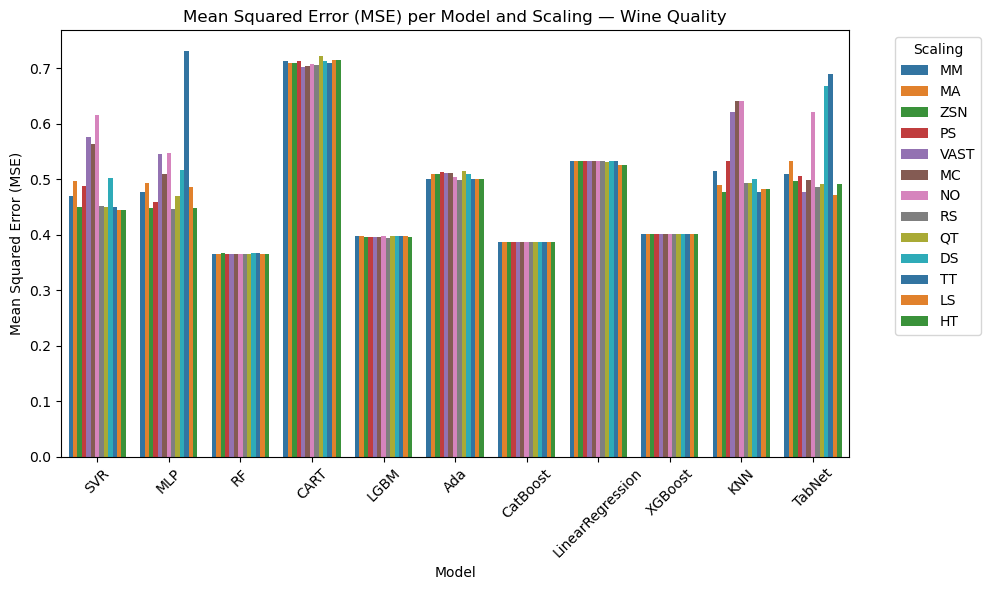

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Create output directory
output_dir = "results/tables_mse_regression"
os.makedirs(output_dir, exist_ok=True)
df_class_analysis = df_results['dataset_name'].loc[df_results['mse'].notna()].unique()

def bold_max_mask(df):
    return df.eq(df.max(axis=1), axis=0)

for dataset in df_class_analysis:
    df_filtered_class = df_results[df_results['dataset_name'] == dataset]
    heat_df = df_filtered_class.groupby(['model', 'scaling_abbrev'])['mse'].mean().unstack()
    heat_df = heat_df.round(4)

    bold_mask = bold_max_mask(heat_df)

    fig, ax = plt.subplots(figsize=(12, 0.5 * len(heat_df) + 2))
    ax.axis('off')
    # ax.set_title(
    #     f"Experimental Results for '{dataset}' Dataset\nMean time_train by Model and Scaling Method",
    #     fontsize=14, weight='bold'
    # )

    table = ax.table(
        cellText=heat_df.values,
        rowLabels=heat_df.index,
        colLabels=heat_df.columns,
        loc='center',
        cellLoc='center'
    )

    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)

    # Bold max values
    for i, row in enumerate(bold_mask.values):
        for j, is_bold in enumerate(row):
            if is_bold:
                cell = table[(i + 1, j)]
                cell.set_fontsize(10)
                cell.set_text_props(weight='bold')

    # Save one PDF per dataset
    plt.savefig(f"{output_dir}/{dataset}_table_mse.pdf", bbox_inches='tight')
    plt.close(fig)

# Create output directory
os.makedirs(output_dir, exist_ok=True)

# List of datasets to process
datasets = df_results['dataset_name'].loc[df_results['mse'].notna()].unique()

for dataset in datasets:
    df_filtered = df_results[df_results['dataset_name'] == dataset]
    nice_title = name_mapping.get(dataset, dataset)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=df_filtered,
        x='model',
        y='mse',
        hue='scaling_abbrev',
        palette='tab10'
    )
    plt.title(f"Mean Squared Error (MSE) per Model and Scaling — {nice_title}")
    plt.ylim()
    plt.xticks(rotation=45)
    plt.ylabel("Mean Squared Error (MSE)")
    plt.xlabel("Model")
    plt.legend(title="Scaling", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    
    # Save figure
    plt.savefig(f"{output_dir}/{dataset}_mse.pdf")
    plt.show()
    plt.close()


#### MAE

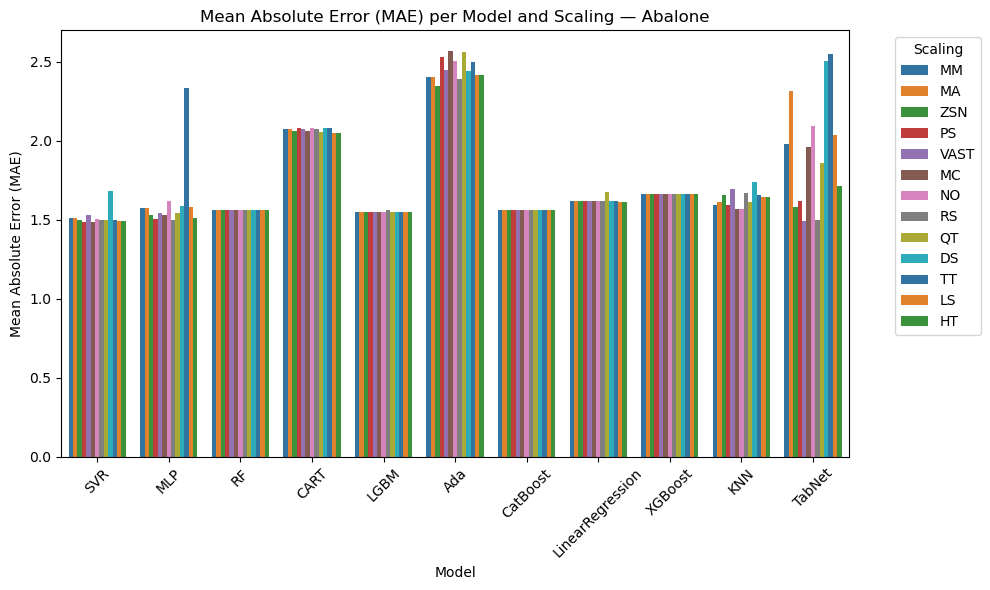

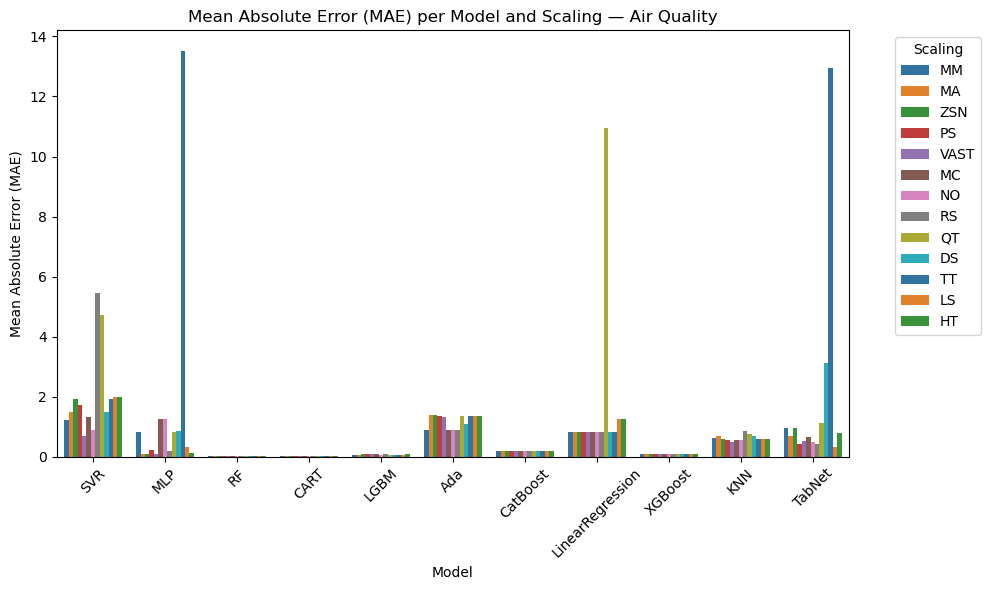

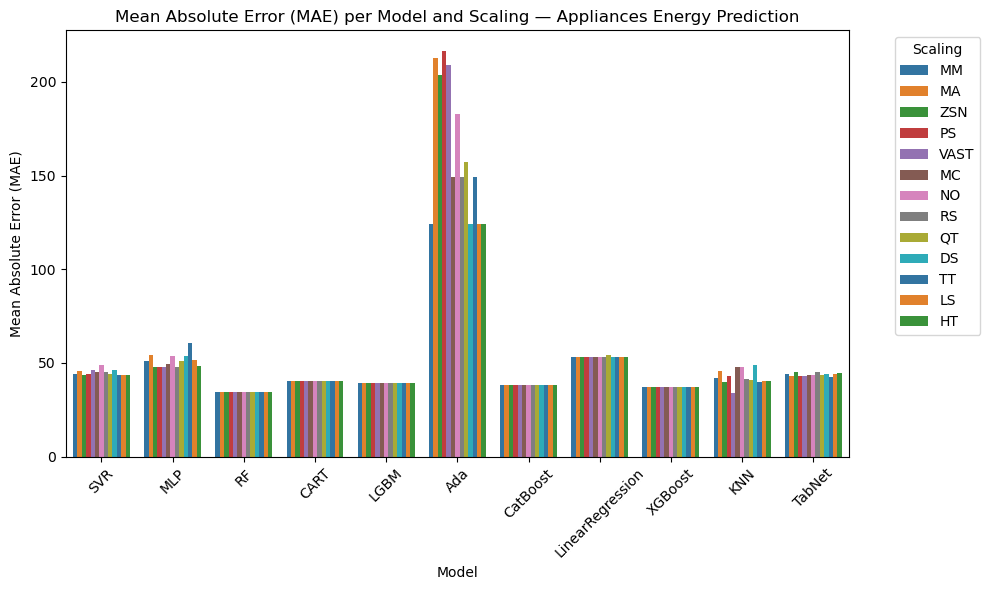

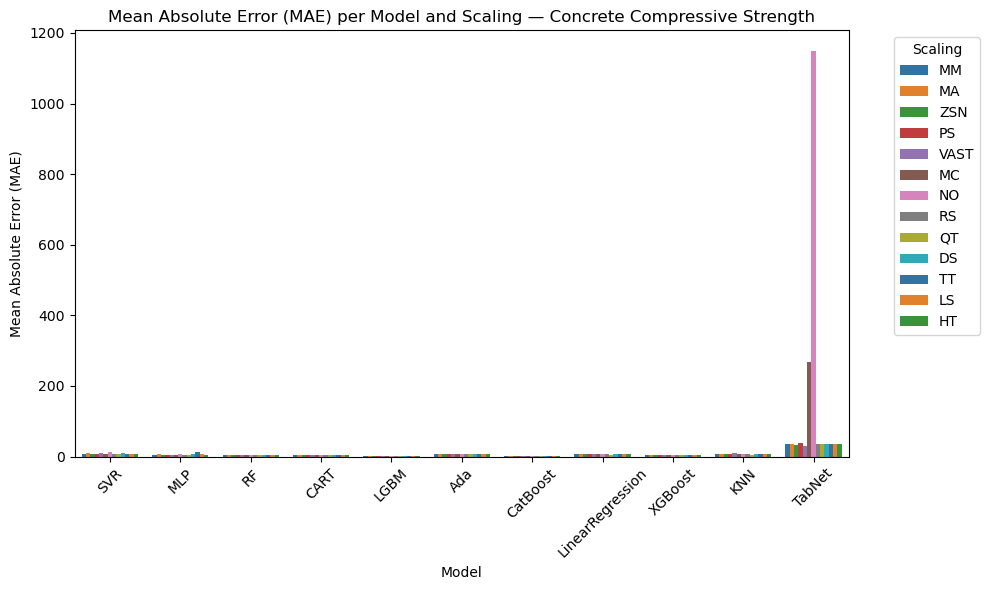

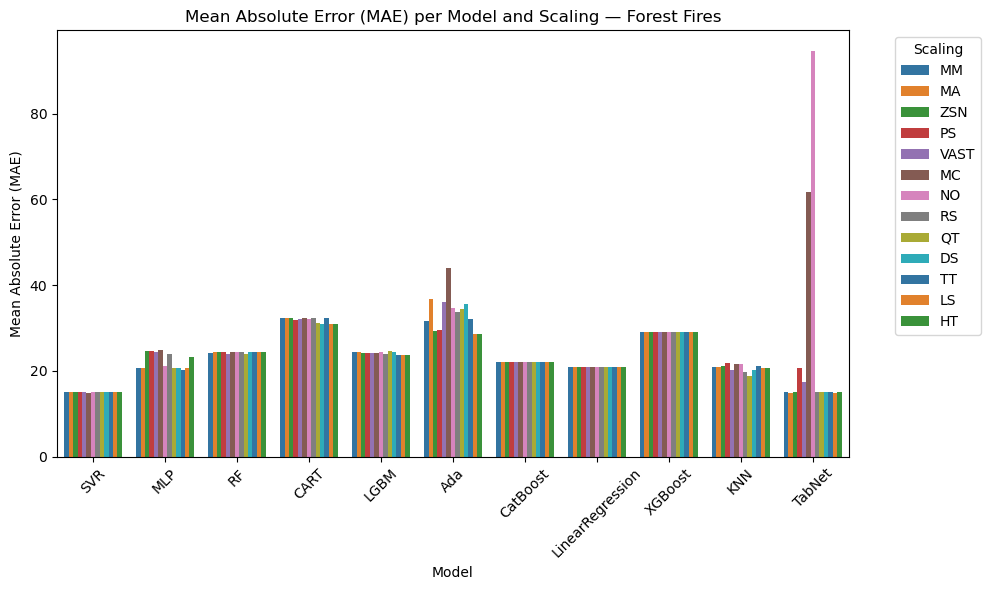

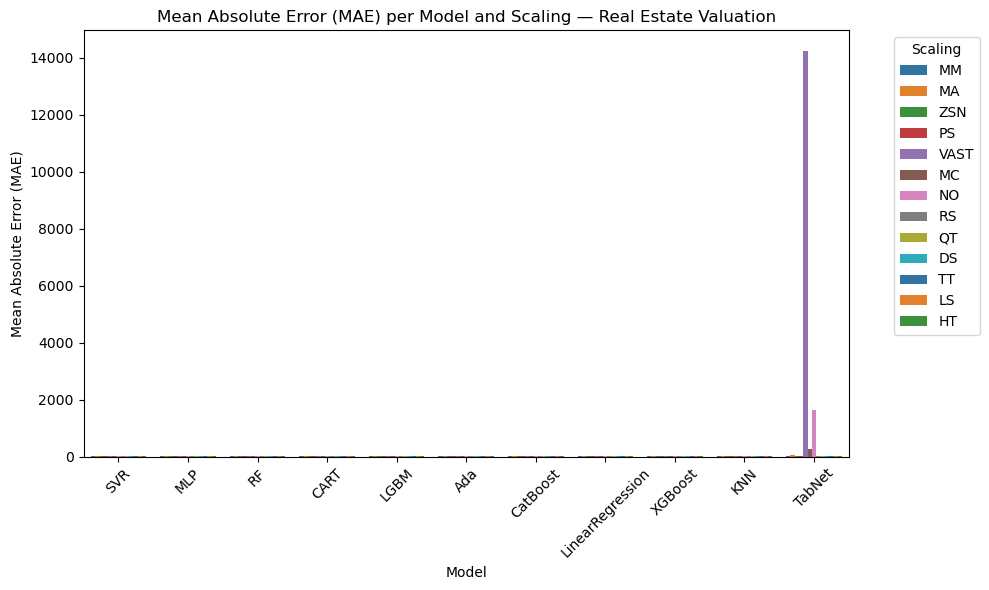

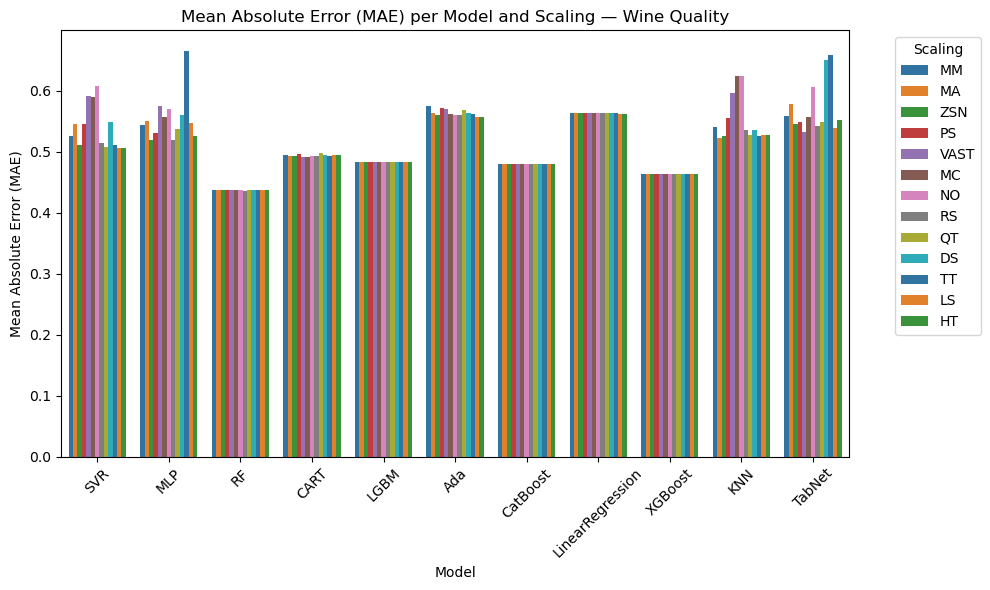

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Create output directory
output_dir = "results/tables_mae_regression"
os.makedirs(output_dir, exist_ok=True)
df_class_analysis = df_results['dataset_name'].loc[df_results['mae'].notna()].unique()

def bold_max_mask(df):
    return df.eq(df.max(axis=1), axis=0)

for dataset in df_class_analysis:
    df_filtered_class = df_results[df_results['dataset_name'] == dataset]
    heat_df = df_filtered_class.groupby(['model', 'scaling_abbrev'])['mae'].mean().unstack()
    heat_df = heat_df.round(4)

    bold_mask = bold_max_mask(heat_df)

    fig, ax = plt.subplots(figsize=(12, 0.5 * len(heat_df) + 2))
    ax.axis('off')
    # ax.set_title(
    #     f"Experimental Results for '{dataset}' Dataset\nMean time_train by Model and Scaling Method",
    #     fontsize=14, weight='bold'
    # )

    table = ax.table(
        cellText=heat_df.values,
        rowLabels=heat_df.index,
        colLabels=heat_df.columns,
        loc='center',
        cellLoc='center'
    )

    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)

    # Bold max values
    for i, row in enumerate(bold_mask.values):
        for j, is_bold in enumerate(row):
            if is_bold:
                cell = table[(i + 1, j)]
                cell.set_fontsize(10)
                cell.set_text_props(weight='bold')

    # Save one PDF per dataset
    plt.savefig(f"{output_dir}/{dataset}_table_mae.pdf", bbox_inches='tight')
    plt.close(fig)

# Create output directory
os.makedirs(output_dir, exist_ok=True)

# List of datasets to process
datasets = df_results['dataset_name'].loc[df_results['mae'].notna()].unique()

for dataset in datasets:
    df_filtered = df_results[df_results['dataset_name'] == dataset]
    nice_title = name_mapping.get(dataset, dataset)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=df_filtered,
        x='model',
        y='mae',
        hue='scaling_abbrev',
        palette='tab10'
    )
    plt.title(f"Mean Absolute Error (MAE) per Model and Scaling — {nice_title}")
    plt.ylim()
    plt.xticks(rotation=45)
    plt.ylabel("Mean Absolute Error (MAE)")
    plt.xlabel("Model")
    plt.legend(title="Scaling", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    
    # Save figure
    plt.savefig(f"{output_dir}/{dataset}_mae.pdf")
    plt.show()
    plt.close()


### Time to train and time do inference in regression results

#### Time to train

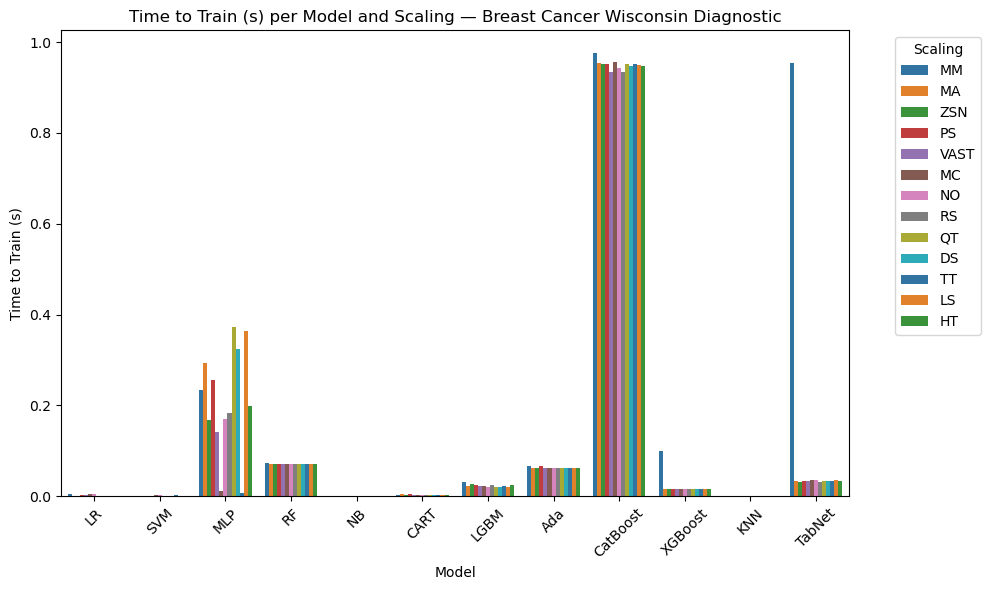

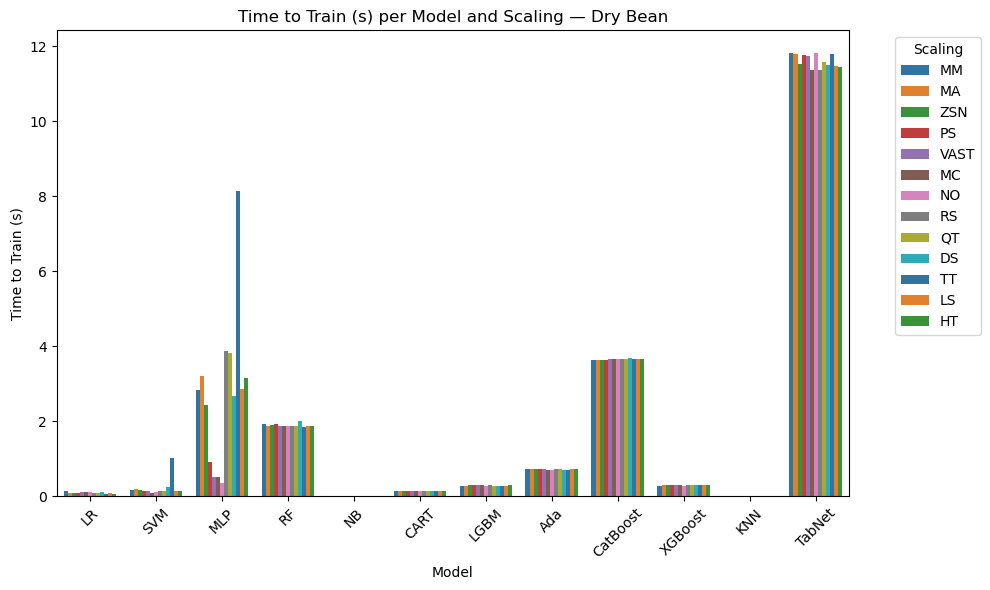

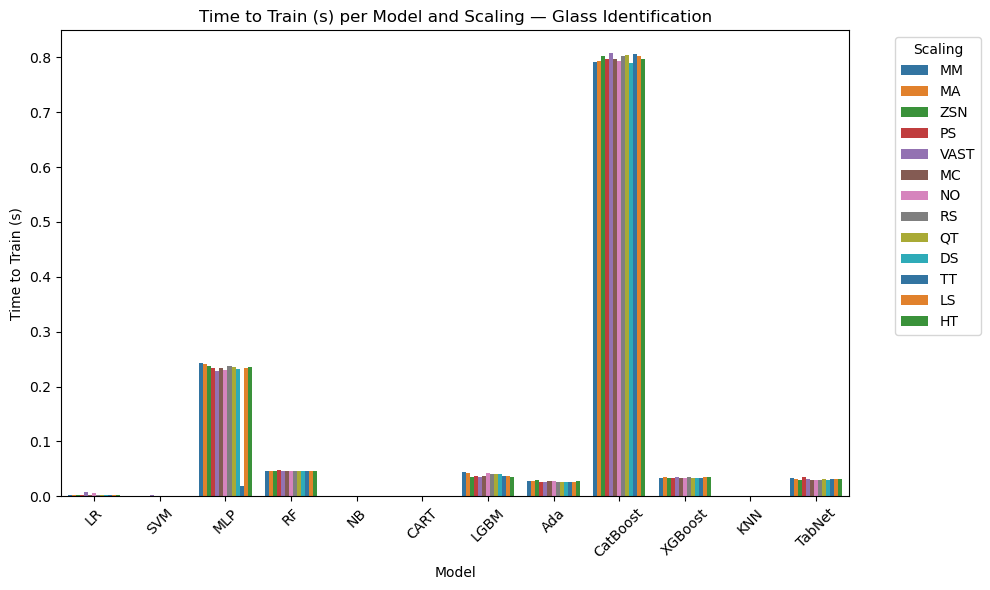

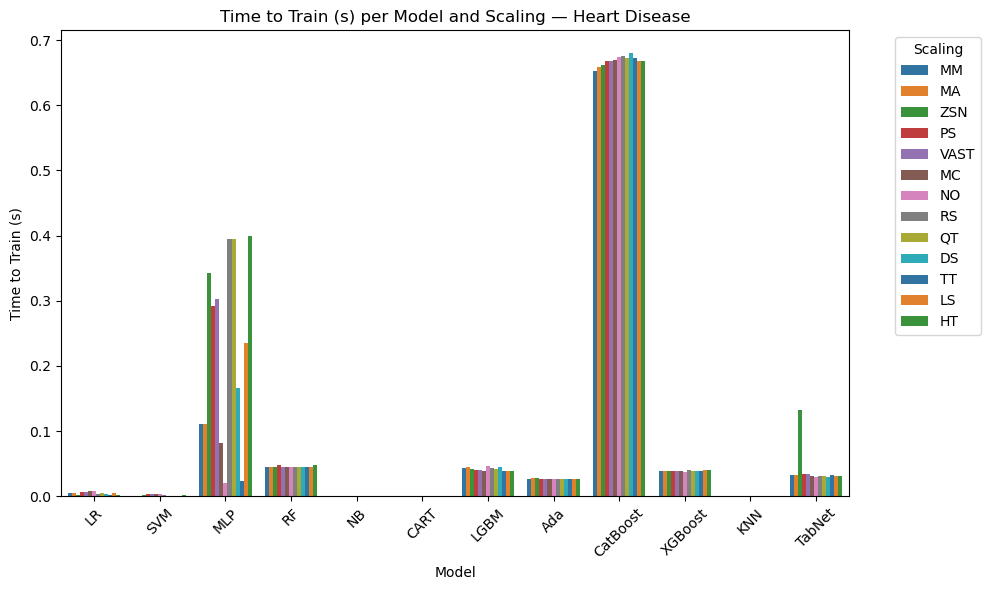

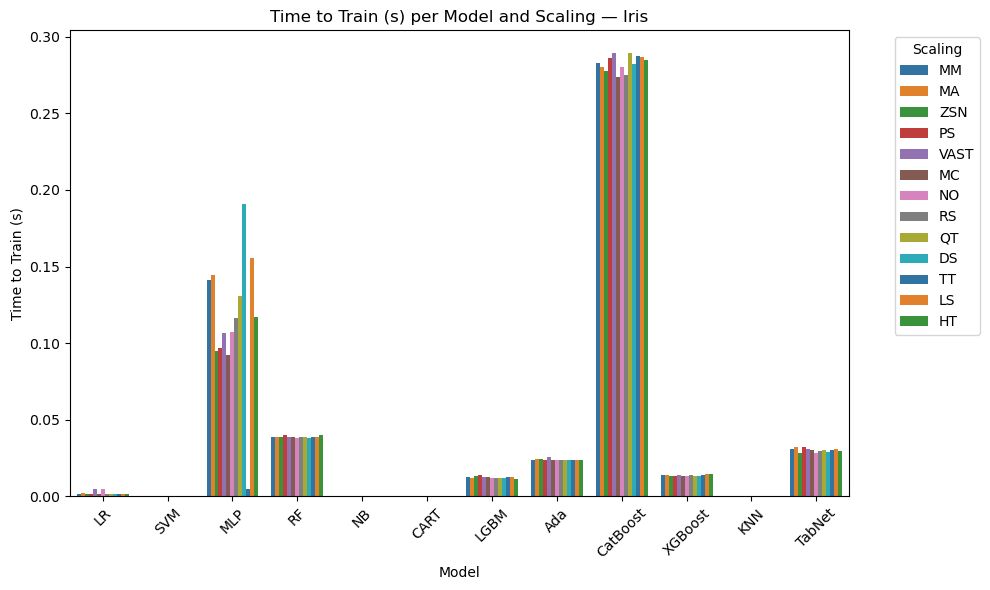

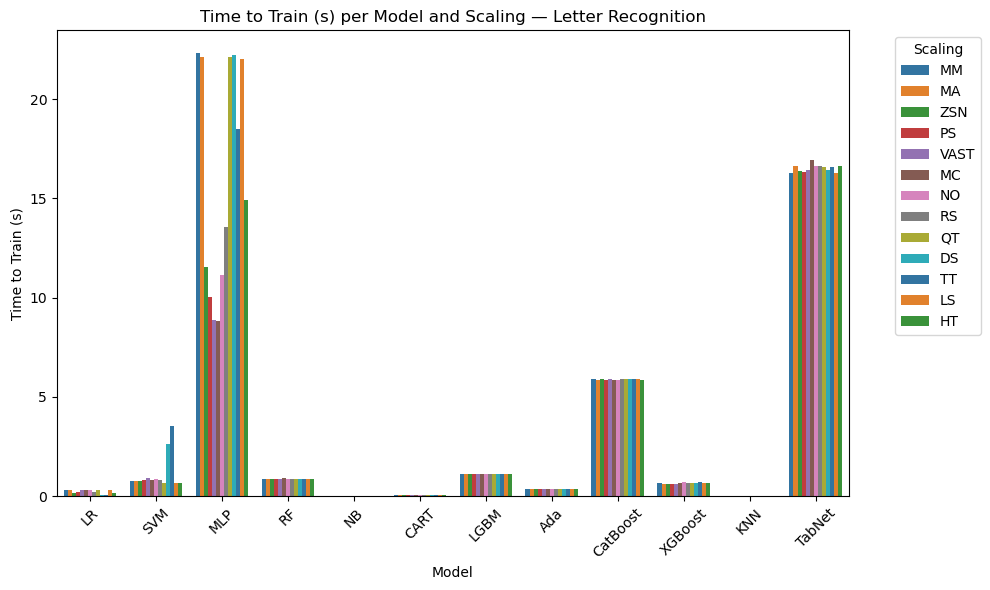

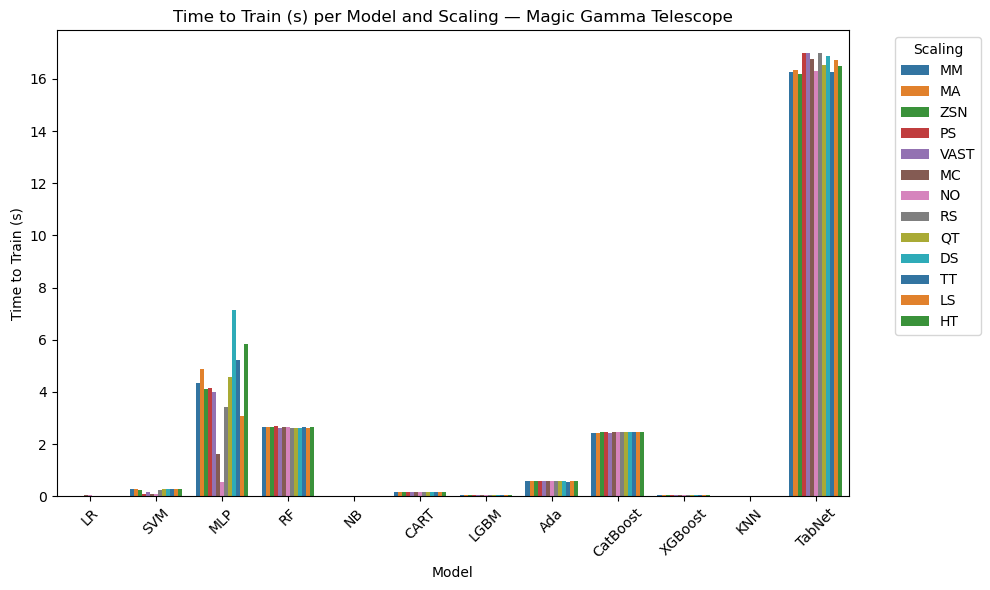

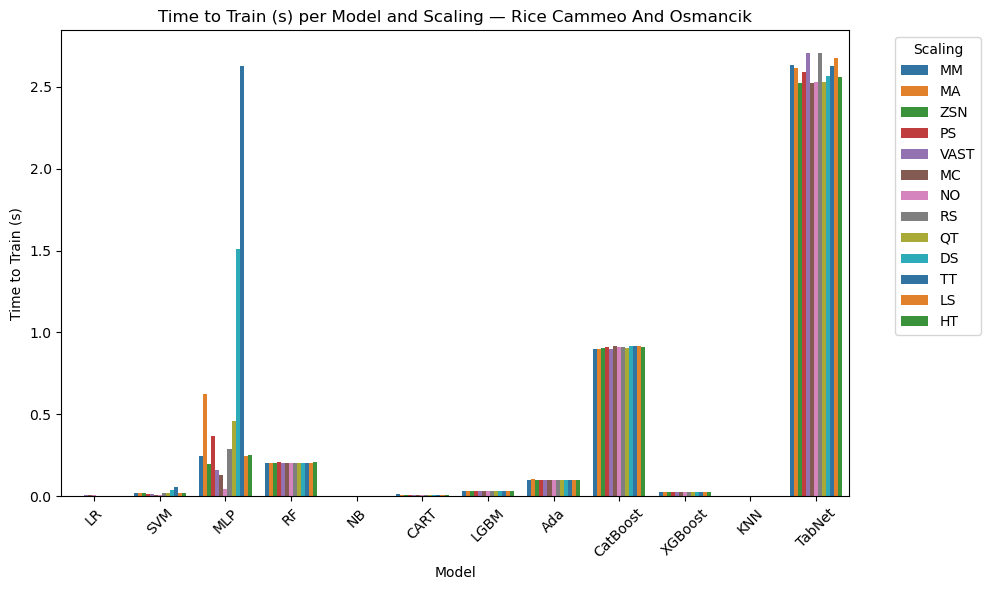

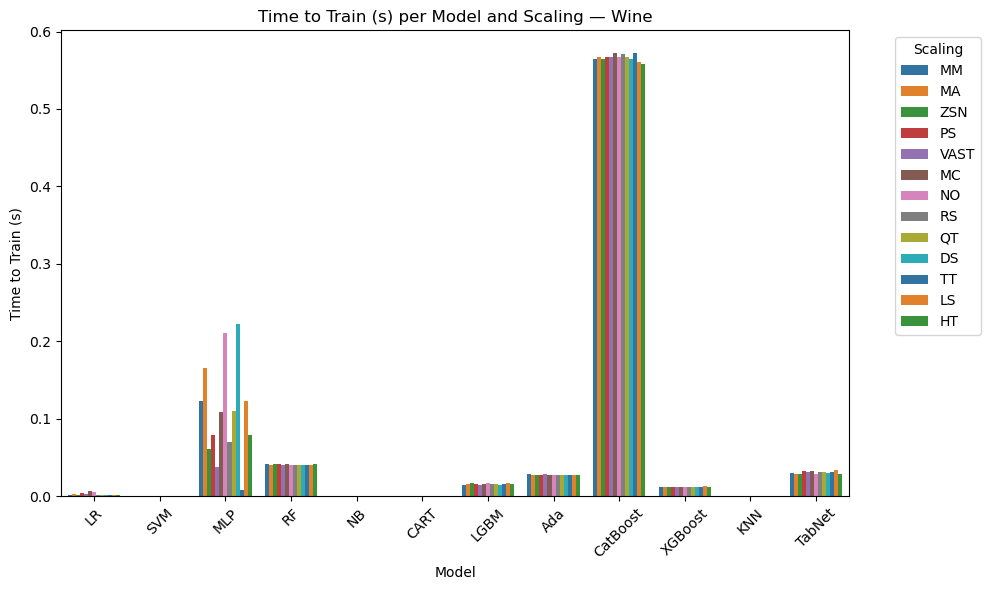

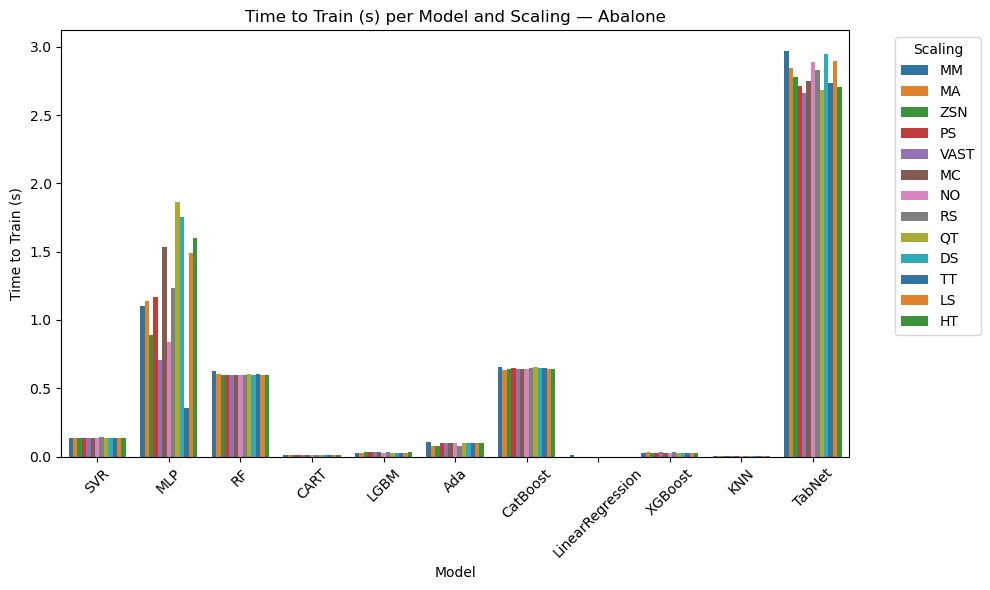

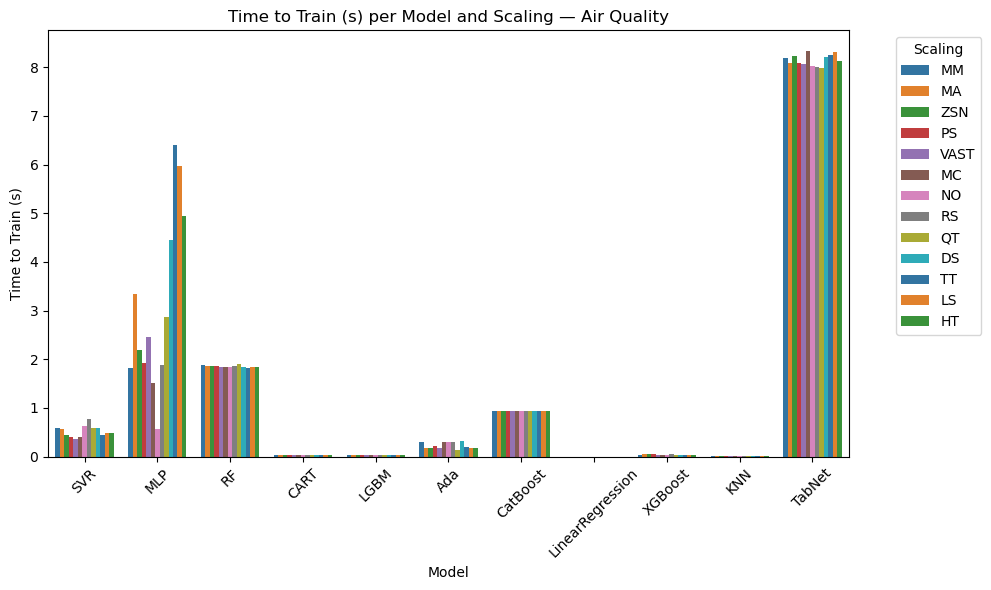

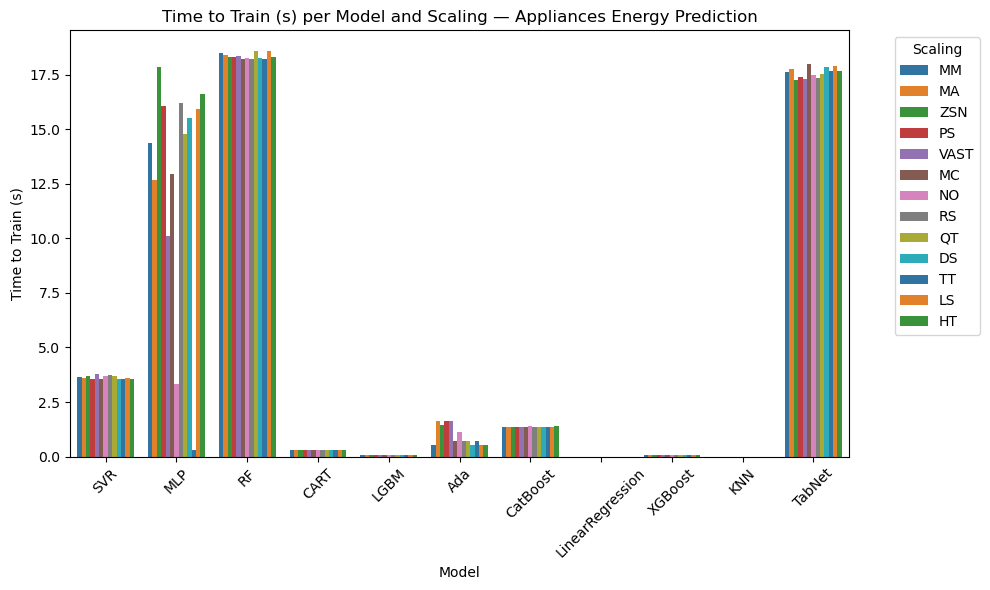

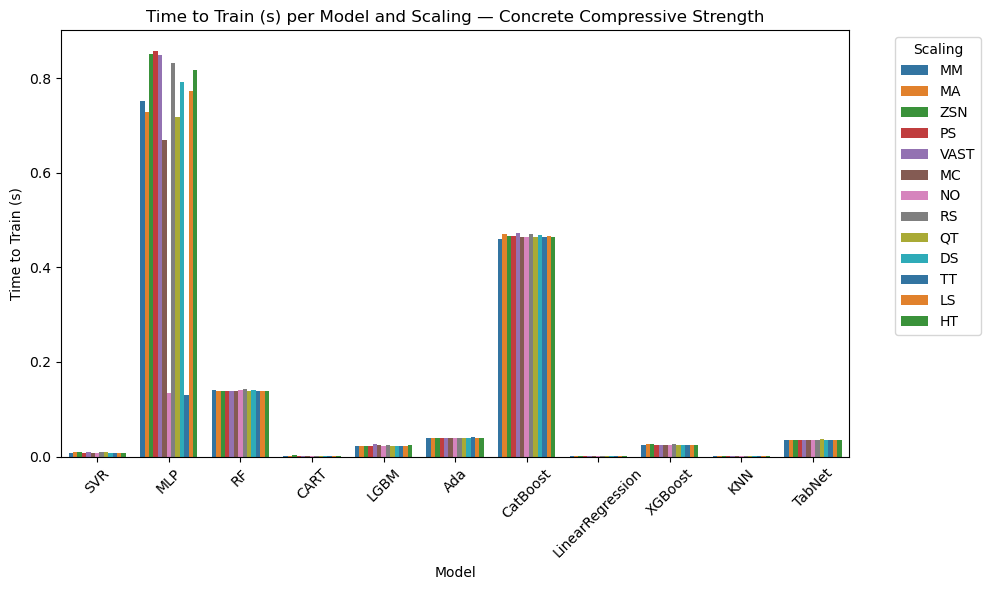

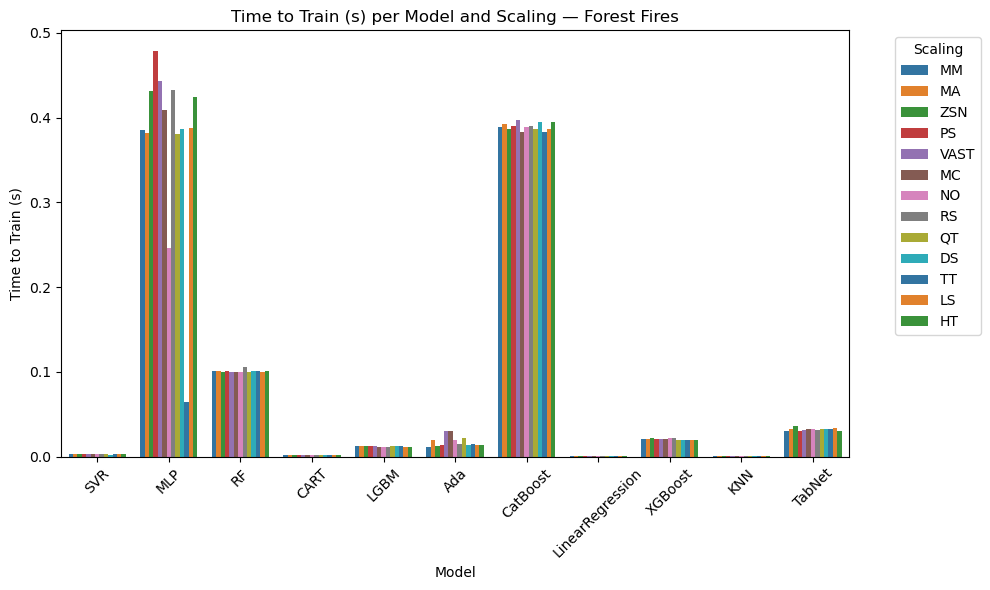

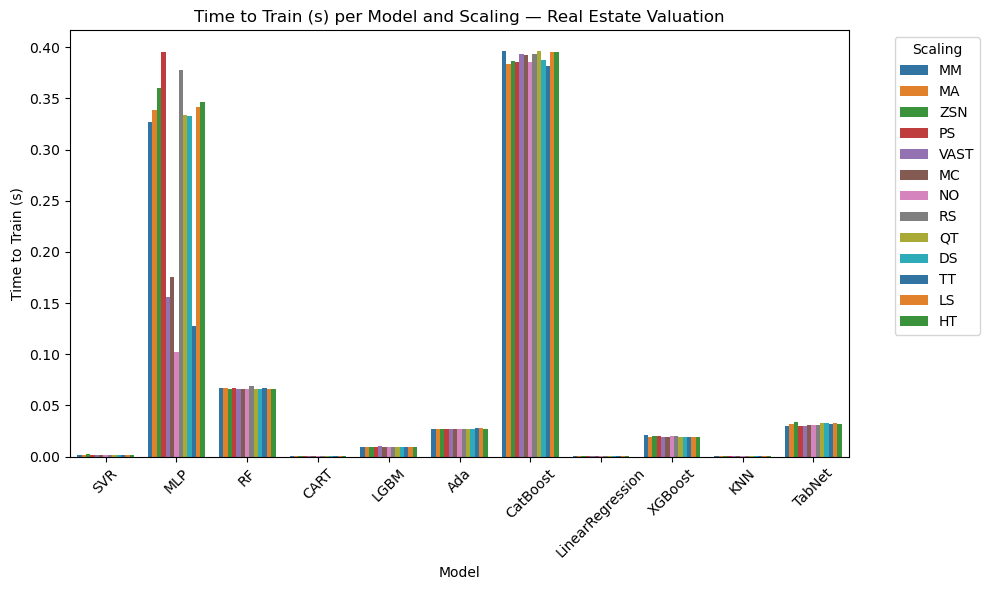

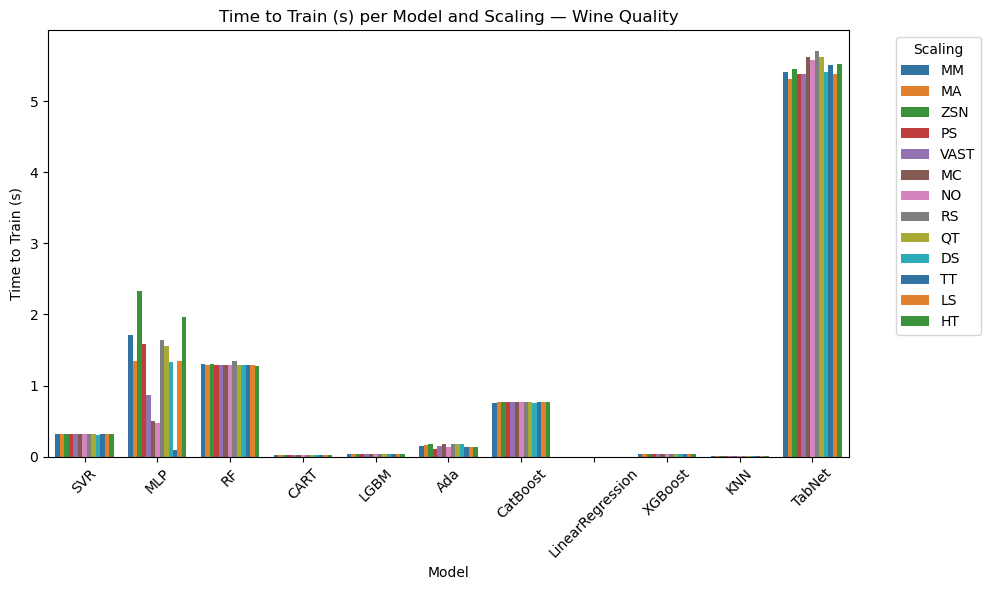

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Create output directory
output_dir = "results/tables_train_regression"
os.makedirs(output_dir, exist_ok=True)
df_class_analysis = df_results['dataset_name'].loc[df_results['mae'].notna()].unique()

def bold_max_mask(df):
    return df.eq(df.max(axis=1), axis=0)

for dataset in df_class_analysis:
    df_filtered_class = df_results[df_results['dataset_name'] == dataset]
    heat_df = df_filtered_class.groupby(['model', 'scaling_abbrev'])['time_train'].mean().unstack()
    heat_df = heat_df.round(4)

    bold_mask = bold_max_mask(heat_df)

    fig, ax = plt.subplots(figsize=(12, 0.5 * len(heat_df) + 2))
    ax.axis('off')
    # ax.set_title(
    #     f"Experimental Results for '{dataset}' Dataset\nMean time_train by Model and Scaling Method",
    #     fontsize=14, weight='bold'
    # )

    table = ax.table(
        cellText=heat_df.values,
        rowLabels=heat_df.index,
        colLabels=heat_df.columns,
        loc='center',
        cellLoc='center'
    )

    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)

    # Bold max values
    for i, row in enumerate(bold_mask.values):
        for j, is_bold in enumerate(row):
            if is_bold:
                cell = table[(i + 1, j)]
                cell.set_fontsize(10)
                cell.set_text_props(weight='bold')

    # Save one PDF per dataset
    plt.savefig(f"{output_dir}/{dataset}_table_time_train.pdf", bbox_inches='tight')
    plt.close(fig)

# Create output directory
os.makedirs(output_dir, exist_ok=True)

# List of datasets to process
datasets = df_results['dataset_name'].loc[df_results['time_train'].notna()].unique()

for dataset in datasets:
    df_filtered = df_results[df_results['dataset_name'] == dataset]
    nice_title = name_mapping.get(dataset, dataset)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=df_filtered,
        x='model',
        y='time_train',
        hue='scaling_abbrev',
        palette='tab10'
    )
    plt.title(f"Time to Train (s) per Model and Scaling — {nice_title}")
    plt.ylim()
    plt.xticks(rotation=45)
    plt.ylabel("Time to Train (s)")
    plt.xlabel("Model")
    plt.legend(title="Scaling", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    
    # Save figure
    plt.savefig(f"{output_dir}/{dataset}_time_train.pdf")
    plt.show()
    plt.close()


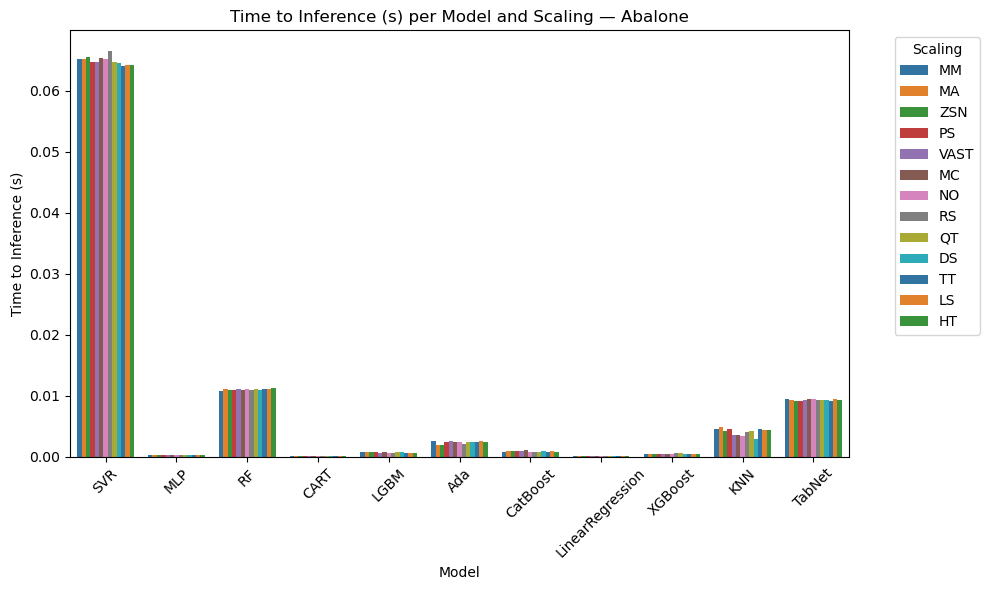

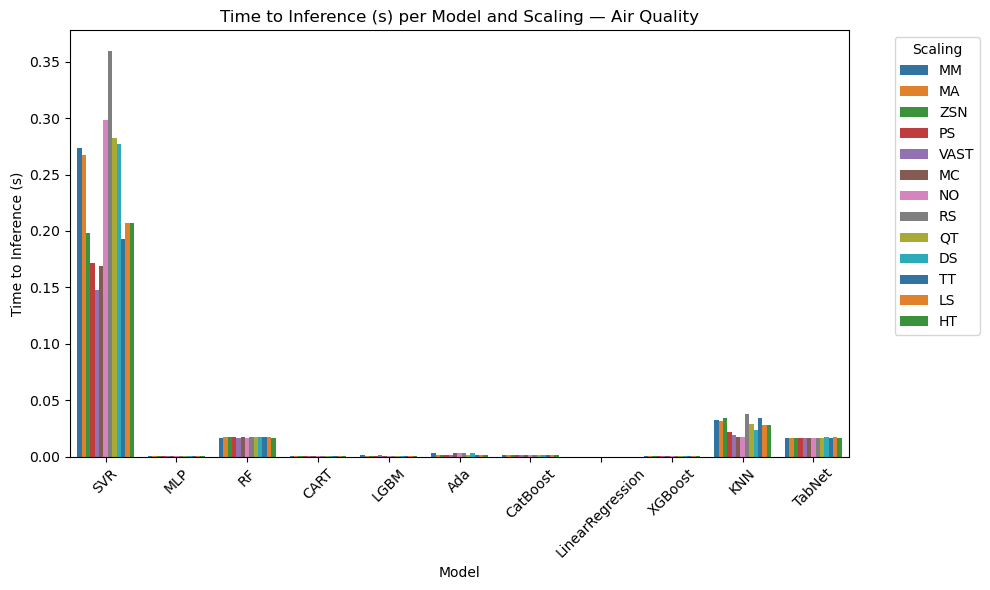

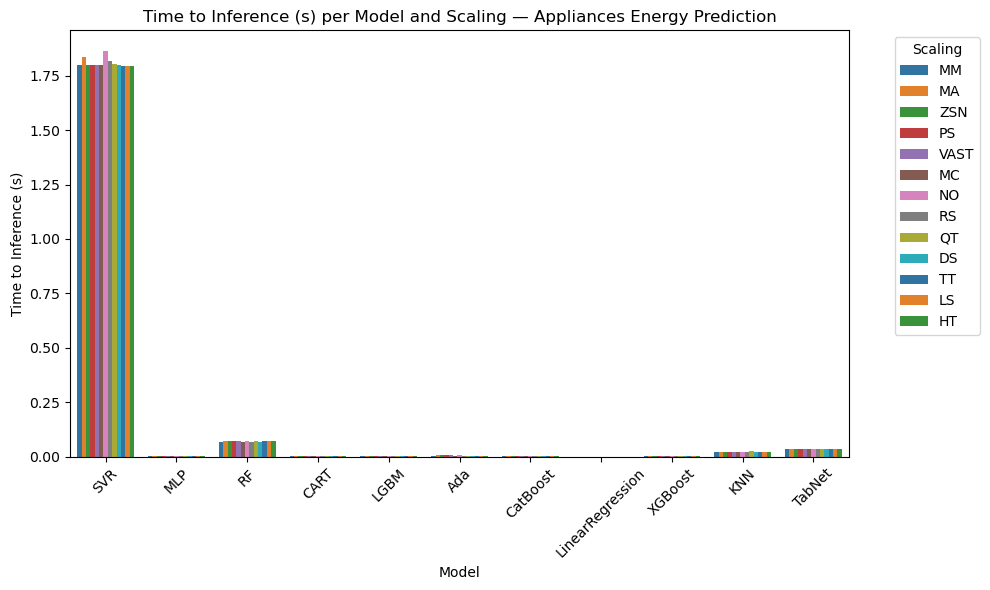

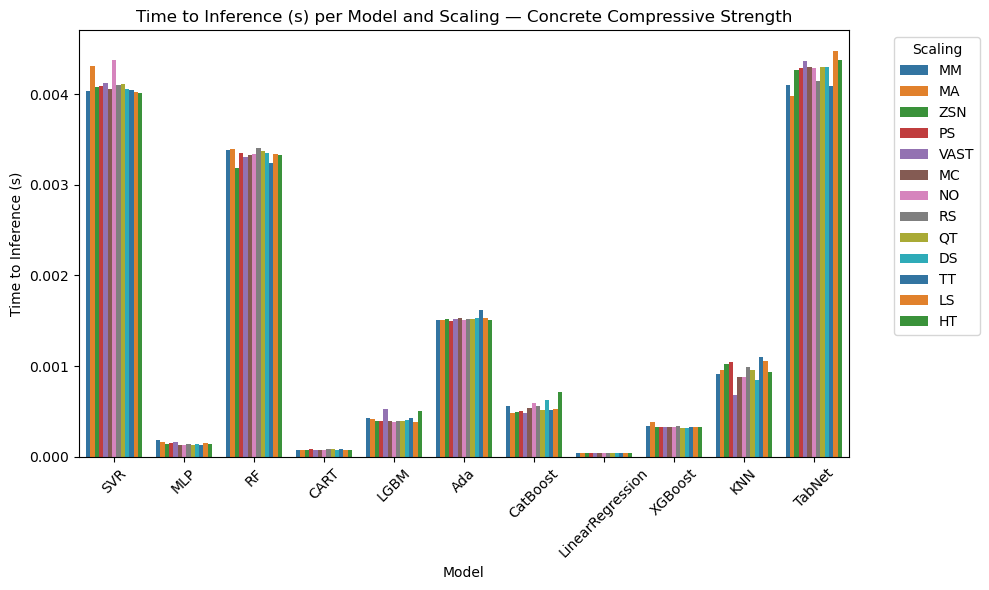

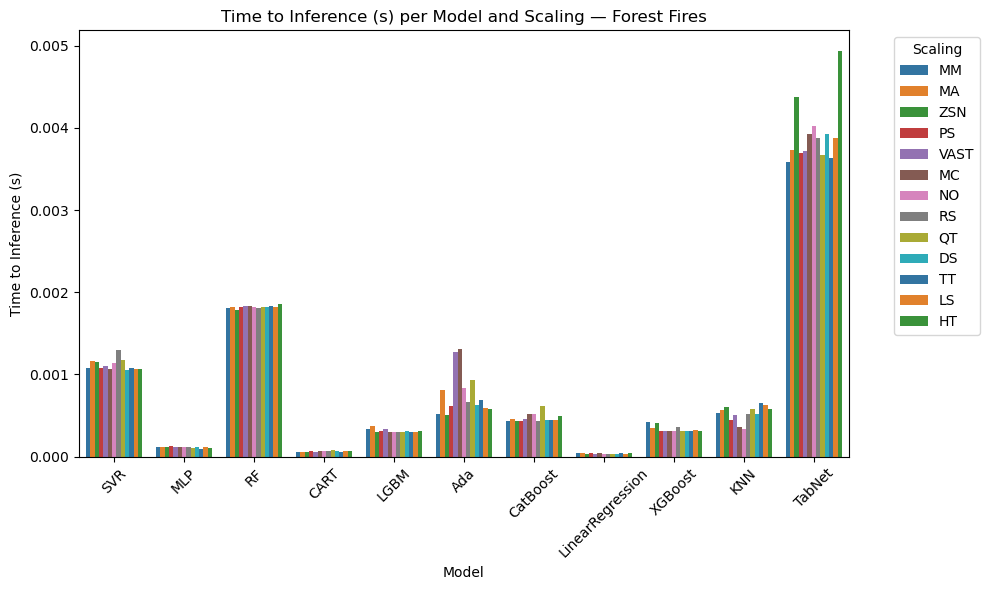

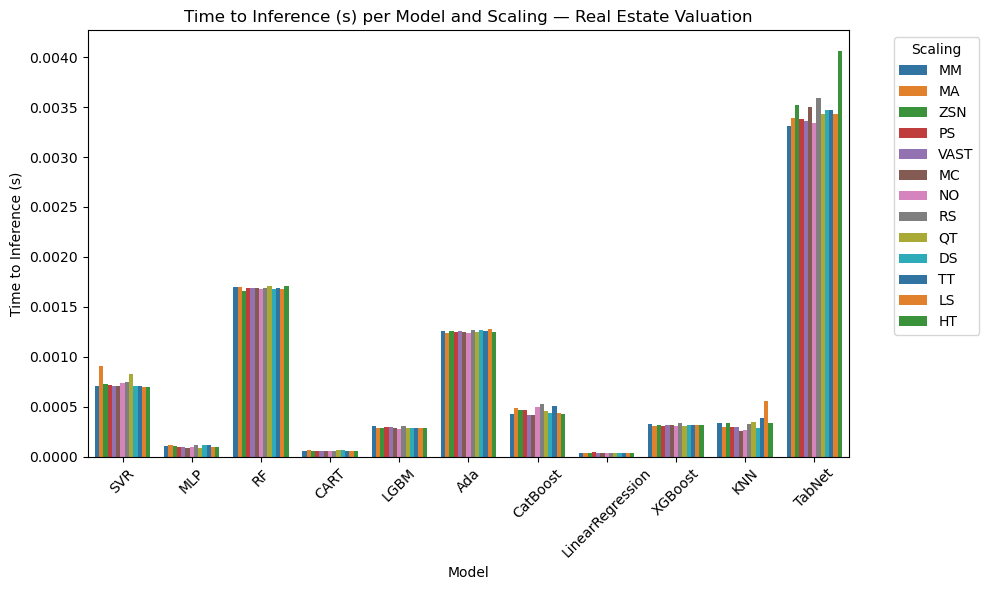

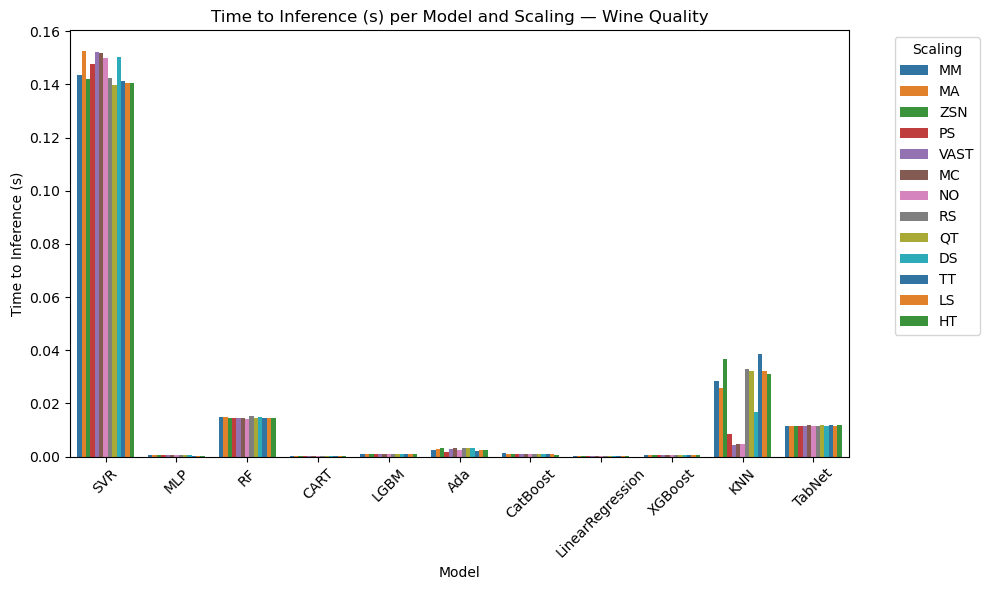

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Create output directory
output_dir = "results/tables_inference_regression"
os.makedirs(output_dir, exist_ok=True)
df_class_analysis = df_results['dataset_name'].loc[df_results['mae'].notna()].unique()

def bold_max_mask(df):
    return df.eq(df.max(axis=1), axis=0)

for dataset in df_class_analysis:
    df_filtered_class = df_results[df_results['dataset_name'] == dataset]
    heat_df = df_filtered_class.groupby(['model', 'scaling_abbrev'])['time_inference'].mean().unstack()
    heat_df = heat_df.round(4)

    bold_mask = bold_max_mask(heat_df)

    fig, ax = plt.subplots(figsize=(12, 0.5 * len(heat_df) + 2))
    ax.axis('off')
    # ax.set_title(
    #     f"Experimental Results for '{dataset}' Dataset\nMean time_train by Model and Scaling Method",
    #     fontsize=14, weight='bold'
    # )

    table = ax.table(
        cellText=heat_df.values,
        rowLabels=heat_df.index,
        colLabels=heat_df.columns,
        loc='center',
        cellLoc='center'
    )

    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)

    # Bold max values
    for i, row in enumerate(bold_mask.values):
        for j, is_bold in enumerate(row):
            if is_bold:
                cell = table[(i + 1, j)]
                cell.set_fontsize(10)
                cell.set_text_props(weight='bold')

    # Save one PDF per dataset
    plt.savefig(f"{output_dir}/{dataset}_table_time_inference.pdf", bbox_inches='tight')
    plt.close(fig)

# Create output directory
os.makedirs(output_dir, exist_ok=True)

# List of datasets to process
datasets = df_results['dataset_name'].loc[df_results['mae'].notna()].unique()

for dataset in datasets:
    df_filtered = df_results[df_results['dataset_name'] == dataset]
    nice_title = name_mapping.get(dataset, dataset)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=df_filtered,
        x='model',
        y='time_inference',
        hue='scaling_abbrev',
        palette='tab10'
    )
    plt.title(f"Time to Inference (s) per Model and Scaling — {nice_title}")
    plt.ylim()
    plt.xticks(rotation=45)
    plt.ylabel("Time to Inference (s)")
    plt.xlabel("Model")
    plt.legend(title="Scaling", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    
    # Save figure
    plt.savefig(f"{output_dir}/{dataset}_time_inference.pdf")
    plt.show()
    plt.close()


#### Memory Usage in regression

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# --- Configuration ---
# Set the metric you want to analyze. Your code used 'memory_used_kb'.
# You can easily change this to 'time_to_inference' or 'time_to_train'.
metric_to_analyze = 'memory_used_kb'
# --- End Configuration ---


# Assume df_results is a pre-existing DataFrame with all your experimental data
# It should contain 'dataset_name', 'mae', 'scaling_abbrev', and the metric_to_analyze.

# Create a clear output directory for summary tables
output_dir = "results/summary_tables_regression"
os.makedirs(output_dir, exist_ok=True)

# 1. Filter for your regression datasets by checking for the 'mae' metric
df_regr_analysis = df_results['dataset_name'].loc[df_results['mae'].notna()].unique()

# 2. Create a dictionary to hold the mean results for each dataset
mean_results_data = {}

# 3. Loop through each regression dataset to perform the aggregation
for dataset in df_regr_analysis:
    df_filtered_regr = df_results[df_results['dataset_name'] == dataset]
    
    # Group by scaling abbreviation and calculate the mean of the chosen metric
    mean_by_scaling = df_filtered_regr.groupby('scaling_abbrev')[metric_to_analyze].mean()
    
    # Add the result to our dictionary
    mean_results_data[dataset] = mean_by_scaling

# 4. Create a single, consolidated DataFrame from the collected results
final_summary_df = pd.DataFrame(mean_results_data).T

# Round the data for cleaner presentation
final_summary_df = final_summary_df.round(4)

# Optional: Sort columns alphabetically for consistency
final_summary_df = final_summary_df.reindex(sorted(final_summary_df.columns), axis=1)

# 5. Generate and save the final table visualization
# Create a title-friendly version of the metric name
metric_title = metric_to_analyze.replace('_', ' ').title()

fig, ax = plt.subplots(figsize=(14, 0.5 * len(final_summary_df) + 1.5))
ax.axis('off')
ax.set_title(
    f"Mean {metric_title} by Dataset and Scaling Method (Regression)",
    fontsize=16, weight='bold', pad=20
)

table = ax.table(
    cellText=final_summary_df.values,
    rowLabels=final_summary_df.index,
    colLabels=final_summary_df.columns,
    loc='center',
    cellLoc='center'
)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.8)

# Save the single consolidated table to a PDF with a descriptive name
output_filename = f"summary_mean_{metric_to_analyze}_regression.pdf"
output_path = os.path.join(output_dir, output_filename)
plt.savefig(output_path, bbox_inches='tight')
plt.close(fig)

In [23]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Create output directory
# output_dir = "results/tables_inference_regression"
# os.makedirs(output_dir, exist_ok=True)
# df_class_analysis = df_results['dataset_name'].loc[df_results['mae'].notna()].unique()

# def bold_max_mask(df):
#     return df.eq(df.max(axis=1), axis=0)

# for dataset in df_class_analysis:
#     df_filtered_class = df_results[df_results['dataset_name'] == dataset]
#     heat_df = df_filtered_class.groupby(['model', 'scaling_abbrev'])['memory_used_kb'].mean().unstack()
#     heat_df = heat_df.round(4)

#     bold_mask = bold_max_mask(heat_df)

#     fig, ax = plt.subplots(figsize=(12, 0.5 * len(heat_df) + 2))
#     ax.axis('off')
#     # ax.set_title(
#     #     f"Experimental Results for '{dataset}' Dataset\nMean time_train by Model and Scaling Method",
#     #     fontsize=14, weight='bold'
#     # )

#     table = ax.table(
#         cellText=heat_df.values,
#         rowLabels=heat_df.index,
#         colLabels=heat_df.columns,
#         loc='center',
#         cellLoc='center'
#     )

#     table.auto_set_font_size(False)
#     table.set_fontsize(10)
#     table.scale(1, 1.5)

#     # Bold max values
#     for i, row in enumerate(bold_mask.values):
#         for j, is_bold in enumerate(row):
#             if is_bold:
#                 cell = table[(i + 1, j)]
#                 cell.set_fontsize(10)
#                 cell.set_text_props(weight='bold')

#     # Save one PDF per dataset
#     plt.savefig(f"{output_dir}/{dataset}_table_memory.pdf", bbox_inches='tight')
#     plt.close(fig)

# # Create output directory
# os.makedirs(output_dir, exist_ok=True)

# # List of datasets to process
# datasets = df_results['dataset_name'].loc[df_results['mae'].notna()].unique()

# for dataset in datasets:
#     df_filtered = df_results[df_results['dataset_name'] == dataset]
#     nice_title = name_mapping.get(dataset, dataset)
    
#     plt.figure(figsize=(10, 6))
#     sns.barplot(
#         data=df_filtered,
#         x='model',
#         y='memory_used_kb',
#         hue='scaling_abbrev',
#         palette='tab10'
#     )
#     plt.title(f"Memory Usage (Kb) per Model and Scaling — {nice_title}")
#     plt.ylim()
#     plt.xticks(rotation=45)
#     plt.ylabel("Memory Usage (Kb)")
#     plt.xlabel("Model")
#     plt.legend(title="Scaling", bbox_to_anchor=(1.05, 1), loc='upper left')
#     plt.tight_layout()
    
#     # Save figure
#     plt.savefig(f"{output_dir}/{dataset}_memory.pdf")
#     plt.show()
#     plt.close()


Top models frequency

In [24]:
# Step 1: Find the maximum accuracy for each model within each dataset.
# This creates a new Series where each model is represented only once per dataset with its best score.
df_filtered = df_results.loc[df_results['accuracy'].notna()]
max_accuracy_per_model = df_filtered.groupby(['dataset_name', 'model'])['accuracy'].max()

# Step 2: Now, group the above result by dataset and get the top 4 entries.
# Since each model is now unique within a dataset group, this gives us the top 4 distinct models.
top_4_distinct_models = max_accuracy_per_model.groupby('dataset_name', group_keys=False).nlargest(4)

# Display the final result
# Access the 'model' level of the index and perform a value count
model_appearance_counts = top_4_distinct_models.index.get_level_values('model').value_counts()

# Display the result
print(model_appearance_counts)

model
MLP         5
CatBoost    5
LGBM        4
LR          4
RF          4
SVM         3
XGBoost     3
Ada         2
TabNet      2
KNN         2
CART        1
NB          1
Name: count, dtype: int64


In [25]:
# Step 1: Find the maximum accuracy for each model within each dataset.
# This creates a new Series where each model is represented only once per dataset with its best score.
df_filtered = df_results.loc[df_results['mae'].notna()]
max_accuracy_per_model = df_filtered.groupby(['dataset_name', 'model'])['mse'].min()

# Step 2: Now, group the above result by dataset and get the top 4 entries.
# Since each model is now unique within a dataset group, this gives us the top 4 distinct models.
top_4_distinct_models = max_accuracy_per_model.groupby('dataset_name', group_keys=False).nsmallest(4)

# Display the final result
# Access the 'model' level of the index and perform a value count
model_appearance_counts = top_4_distinct_models.index.get_level_values('model').value_counts()

# Display the result
print(model_appearance_counts)

model
RF                  5
LGBM                5
XGBoost             5
CatBoost            4
MLP                 3
KNN                 2
TabNet              1
SVR                 1
CART                1
LinearRegression    1
Name: count, dtype: int64


In [26]:
# Step 1: Find the maximum accuracy for each model within each dataset.
# This creates a new Series where each model is represented only once per dataset with its best score.
df_filtered = df_results.loc[df_results['mae'].notna()]
max_accuracy_per_model = df_filtered.groupby(['dataset_name', 'model'])['mae'].min()

# Step 2: Now, group the above result by dataset and get the top 4 entries.
# Since each model is now unique within a dataset group, this gives us the top 4 distinct models.
top_4_distinct_models = max_accuracy_per_model.groupby('dataset_name', group_keys=False).nsmallest(4)

# Display the final result
# Access the 'model' level of the index and perform a value count
model_appearance_counts = top_4_distinct_models.index.get_level_values('model').value_counts()

# Display the result
print(model_appearance_counts)

model
RF          5
LGBM        5
XGBoost     4
CatBoost    4
MLP         3
SVR         2
TabNet      2
KNN         2
CART        1
Name: count, dtype: int64


In [27]:
# Step 1: Find the maximum accuracy for each model within each dataset.
# This creates a new Series where each model is represented only once per dataset with its best score.
df_filtered = df_results.loc[df_results['mae'].notna()]
max_accuracy_per_model = df_filtered.groupby(['dataset_name', 'model'])['r2score'].max()

# Step 2: Now, group the above result by dataset and get the top 4 entries.
# Since each model is now unique within a dataset group, this gives us the top 4 distinct models.
top_4_distinct_models = max_accuracy_per_model.groupby('dataset_name', group_keys=False).nlargest(4)

# Display the final result
# Access the 'model' level of the index and perform a value count
model_appearance_counts = top_4_distinct_models.index.get_level_values('model').value_counts()

# Display the result
print(model_appearance_counts)

model
RF                  5
LGBM                5
XGBoost             5
CatBoost            4
MLP                 3
KNN                 2
TabNet              1
SVR                 1
CART                1
LinearRegression    1
Name: count, dtype: int64


### Analysis only some results

In [20]:
model_list_results = ['RF','LGBM','MLP','SVM','KNN','SVR']
scaling_list_results = ['NO','MA','ZSN','RS']

#### Accuracy

In [21]:
import pandas as pd

# Apply dataset name mapping
df_latex = df_results.copy()
df_latex['dataset_name'] = df_latex['dataset_name'].map(name_mapping)
ordered_datasets = df_latex['dataset_name'].drop_duplicates().tolist()
df_latex['dataset_name'] = df_latex['dataset_name'].apply(format_multiline_latex)
df_latex['dataset_name'] = pd.Categorical(
    df_latex['dataset_name'],
    categories=[format_multiline_latex(name) for name in ordered_datasets],
    ordered=True
)

# Rename columns
df_latex = df_latex.rename(columns={
    'dataset_name': 'dataset',
    'scaling_abbrev': 'scaling'
})

# Filter out rows with missing accuracy
df_filtered = df_latex.dropna(subset=['accuracy'])

# Only keep selected models and scalings
model_list_results = ['RF','LGBM','MLP','SVM','KNN','SVR']
scaling_list_results = ['NO', 'MA', 'ZSN', 'RS']

df_filtered = df_filtered[
    df_filtered['model'].isin(model_list_results) &
    df_filtered['scaling'].isin(scaling_list_results)
]

# Create pivot table
pivot_table = df_filtered.pivot_table(
    index=['dataset', 'model'],    
    columns='scaling',             
    values='accuracy',
    aggfunc='mean'
)

# Reindex to ensure specific column order
pivot_table = pivot_table.reindex(columns=scaling_list_results)

# Export LaTeX
latex_longtable_string = pivot_table.to_latex(
    longtable=False,
    column_format="llrrrr",
    float_format="%.4f",
    na_rep="-",
    multicolumn=True,
    multirow=True,
    index=True,
    caption="Accuracy per Dataset, Model, and Scaling Method",
    label="tab:accuracy_results_table"
)

final_latex_code = (

    latex_longtable_string

)

print(final_latex_code)


\begin{table}
\caption{Accuracy per Dataset, Model, and Scaling Method}
\label{tab:accuracy_results_table}
\begin{tabular}{llrrrr}
\toprule
 & scaling & NO & MA & ZSN & RS \\
dataset & model &  &  &  &  \\
\midrule
\multirow[t]{5}{*}{\begin{tabular}[t]{@{}l@{}}Breast Cancer \\ Wisconsin \\ Diagnostic\end{tabular}} & KNN & 0.9591 & 0.9766 & 0.9591 & 0.9649 \\
 & LGBM & 0.9474 & 0.9474 & 0.9591 & 0.9591 \\
 & MLP & 0.9649 & 0.9766 & 0.9766 & 0.9708 \\
 & RF & 0.9708 & 0.9708 & 0.9708 & 0.9708 \\
 & SVM & 0.9240 & 0.9825 & 0.9766 & 0.9825 \\
\cline{1-6}
\multirow[t]{5}{*}{Dry Bean} & KNN & 0.7113 & 0.9141 & 0.9216 & 0.9190 \\
 & LGBM & 0.9275 & 0.9275 & 0.9263 & 0.9275 \\
 & MLP & 0.2980 & 0.9101 & 0.9327 & 0.9314 \\
 & RF & 0.9238 & 0.9226 & 0.9226 & 0.9226 \\
 & SVM & 0.5803 & 0.9109 & 0.9263 & 0.9268 \\
\cline{1-6}
\multirow[t]{5}{*}{\begin{tabular}[t]{@{}l@{}}Glass \\ Identification\end{tabular}} & KNN & 0.5846 & 0.6615 & 0.6308 & 0.6308 \\
 & LGBM & 0.8154 & 0.8154 & 0.8000 & 0.8308 

/tmp/ipykernel_102413/2766817867.py:33: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_filtered.pivot_table(


#### Classification - Time to Train

In [65]:

df_filtered = df_latex.dropna(subset=['accuracy'])
df_filtered = df_filtered[
    df_filtered['model'].isin(model_list_results) &
    df_filtered['scaling'].isin(scaling_list_results)
]

pivot_table = df_filtered.pivot_table(
    index=['dataset', 'model'],    
    columns='scaling',             
    values='time_train',
    aggfunc='mean'
)
pivot_table = pivot_table.reindex(columns=scaling_list_results)

latex_longtable_string = pivot_table.to_latex(
    longtable=False,
    column_format="llrrrrrrrrrrrrr",
    float_format="%.4f",
    na_rep="-",
    multicolumn=True,
    multirow=True,
    index=True,
    caption="Time to Train (s) per Dataset, Model, and Scaling Method",
    label="tab:train_class_table"
)


final_latex_code = (
    latex_longtable_string)

print(final_latex_code)


\begin{table}
\caption{Time to Train (s) per Dataset, Model, and Scaling Method}
\label{tab:train_class_table}
\begin{tabular}{llrrrrrrrrrrrrr}
\toprule
 & scaling & NO & MA & ZSN & RS \\
dataset & model &  &  &  &  \\
\midrule
\multirow[t]{5}{*}{\begin{tabular}[t]{@{}l@{}}Breast Cancer \\ Wisconsin \\ Diagnostic\end{tabular}} & KNN & 0.0002 & 0.0002 & 0.0002 & 0.0002 \\
 & LGBM & 0.0213 & 0.0219 & 0.0275 & 0.0256 \\
 & MLP & 0.1708 & 0.2929 & 0.1683 & 0.1824 \\
 & RF & 0.0706 & 0.0707 & 0.0709 & 0.0706 \\
 & SVM & 0.0016 & 0.0007 & 0.0009 & 0.0009 \\
\cline{1-6}
\multirow[t]{5}{*}{Dry Bean} & KNN & 0.0008 & 0.0008 & 0.0008 & 0.0008 \\
 & LGBM & 0.2732 & 0.2759 & 0.2988 & 0.3025 \\
 & MLP & 0.3396 & 3.2012 & 2.4228 & 3.8822 \\
 & RF & 1.8703 & 1.8860 & 1.8872 & 1.8734 \\
 & SVM & 0.1096 & 0.1932 & 0.1560 & 0.1470 \\
\cline{1-6}
\multirow[t]{5}{*}{\begin{tabular}[t]{@{}l@{}}Glass \\ Identification\end{tabular}} & KNN & 0.0002 & 0.0002 & 0.0002 & 0.0004 \\
 & LGBM & 0.0422 & 0.0427 & 0.0

/tmp/ipykernel_11154/420341784.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_filtered.pivot_table(


#### Classification - Time to Inference

In [66]:

df_filtered = df_latex.dropna(subset=['accuracy'])
df_filtered = df_filtered[
    df_filtered['model'].isin(model_list_results) &
    df_filtered['scaling'].isin(scaling_list_results)
]

pivot_table = df_filtered.pivot_table(
    index=['dataset', 'model'],    
    columns='scaling',             
    values='time_inference',
    aggfunc='mean'
)
pivot_table = pivot_table.reindex(columns=scaling_list_results)

latex_longtable_string = pivot_table.to_latex(
    longtable=False,
    column_format="llrrrrrrrrrrrrr",
    float_format="%.4f",
    na_rep="-",
    multicolumn=True,
    multirow=True,
    index=True,
    caption="Time to Inference (s) per Dataset, Model, and Scaling Method",
    label="tab:inf_class_table"
)


final_latex_code = (
    latex_longtable_string
)

print(final_latex_code)


\begin{table}
\caption{Time to Inference (s) per Dataset, Model, and Scaling Method}
\label{tab:inf_class_table}
\begin{tabular}{llrrrrrrrrrrrrr}
\toprule
 & scaling & NO & MA & ZSN & RS \\
dataset & model &  &  &  &  \\
\midrule
\multirow[t]{5}{*}{\begin{tabular}[t]{@{}l@{}}Breast Cancer \\ Wisconsin \\ Diagnostic\end{tabular}} & KNN & 0.0025 & 0.0025 & 0.0025 & 0.0030 \\
 & LGBM & 0.0004 & 0.0004 & 0.0007 & 0.0007 \\
 & MLP & 0.0001 & 0.0001 & 0.0001 & 0.0001 \\
 & RF & 0.0013 & 0.0013 & 0.0013 & 0.0013 \\
 & SVM & 0.0002 & 0.0002 & 0.0001 & 0.0001 \\
\cline{1-6}
\multirow[t]{5}{*}{Dry Bean} & KNN & 0.0529 & 0.0536 & 0.0536 & 0.0594 \\
 & LGBM & 0.0101 & 0.0099 & 0.0099 & 0.0100 \\
 & MLP & 0.0011 & 0.0012 & 0.0012 & 0.0012 \\
 & RF & 0.0180 & 0.0181 & 0.0184 & 0.0179 \\
 & SVM & 0.0255 & 0.1723 & 0.0892 & 0.0907 \\
\cline{1-6}
\multirow[t]{5}{*}{\begin{tabular}[t]{@{}l@{}}Glass \\ Identification\end{tabular}} & KNN & 0.0012 & 0.0012 & 0.0012 & 0.0014 \\
 & LGBM & 0.0005 & 0.0006 & 0

/tmp/ipykernel_11154/3963428496.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_filtered.pivot_table(


#### $R²$

In [22]:

# Filter out rows with missing accuracy
df_filtered = df_latex.dropna(subset=['mse'])
df_filtered = df_filtered[
    df_filtered['model'].isin(model_list_results) &
    df_filtered['scaling'].isin(scaling_list_results)
]

pivot_table = df_filtered.pivot_table(
    index=['dataset', 'model'],    
    columns='scaling',             
    values='r2score',
    aggfunc='mean'
)
pivot_table = pivot_table.reindex(columns=scaling_list_results)

latex_longtable_string = pivot_table.to_latex(
    longtable=False,
    column_format="llrrrrrrrrrrrrr",
    float_format="%.4f",
    na_rep="-",
    multicolumn=True,
    multirow=True,
    index=True,
    caption="$R^2$ score",
    label="tab:r2_table"
)


final_latex_code = (
   latex_longtable_string
)

print(final_latex_code)

\begin{table}
\caption{$R^2$ score}
\label{tab:r2_table}
\begin{tabular}{llrrrrrrrrrrrrr}
\toprule
 & scaling & NO & MA & ZSN & RS \\
dataset & model &  &  &  &  \\
\midrule
\multirow[t]{5}{*}{Abalone} & KNN & 0.5164 & 0.4955 & 0.4662 & 0.4552 \\
 & LGBM & 0.5260 & 0.5260 & 0.5256 & 0.5190 \\
 & MLP & 0.5245 & 0.5265 & 0.5578 & 0.5632 \\
 & RF & 0.5244 & 0.5249 & 0.5234 & 0.5241 \\
 & SVR & 0.5293 & 0.5257 & 0.5421 & 0.5398 \\
\cline{1-6}
\multirow[t]{5}{*}{Air Quality} & KNN & 0.9995 & 0.9993 & 0.9994 & 0.9986 \\
 & LGBM & 0.9999 & 0.9999 & 0.9999 & 0.9999 \\
 & MLP & 0.9985 & 1.0000 & 1.0000 & 0.9999 \\
 & RF & 1.0000 & 1.0000 & 1.0000 & 1.0000 \\
 & SVR & 0.9966 & 0.9619 & 0.9269 & 0.9188 \\
\cline{1-6}
\multirow[t]{5}{*}{\begin{tabular}[t]{@{}l@{}}Appliances \\ Energy \\ Prediction\end{tabular}} & KNN & 0.1681 & 0.2049 & 0.3279 & 0.2929 \\
 & LGBM & 0.4318 & 0.4318 & 0.4334 & 0.4192 \\
 & MLP & 0.1598 & 0.1581 & 0.3144 & 0.2970 \\
 & RF & 0.5122 & 0.5120 & 0.5122 & 0.5125 \\
 & SVR

/tmp/ipykernel_102413/851669093.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_filtered.pivot_table(


#### MSE

In [23]:
df_filtered = df_filtered[
    df_filtered['model'].isin(model_list_results) &
    df_filtered['scaling'].isin(scaling_list_results)
]

pivot_table = df_filtered.pivot_table(
    index=['dataset', 'model'],    
    columns='scaling',             
    values='mse',
    aggfunc='mean'
)
pivot_table = pivot_table.reindex(columns=scaling_list_results)

latex_longtable_string = pivot_table.to_latex(
    longtable=False,
    column_format="llrrrrrrrrrrrrr",
    float_format="%.4f",
    na_rep="-",
    multicolumn=True,
    multirow=True,
    index=True,
    caption="MSE per Dataset, Model, and Scaling Method",
    label="tab:mse_table"
)


final_latex_code = (
latex_longtable_string 
    
)

print(final_latex_code)

\begin{table}
\caption{MSE per Dataset, Model, and Scaling Method}
\label{tab:mse_table}
\begin{tabular}{llrrrrrrrrrrrrr}
\toprule
 & scaling & NO & MA & ZSN & RS \\
dataset & model &  &  &  &  \\
\midrule
\multirow[t]{5}{*}{Abalone} & KNN & 4.9107 & 5.1229 & 5.4200 & 5.5324 \\
 & LGBM & 4.8137 & 4.8137 & 4.8170 & 4.8846 \\
 & MLP & 4.8285 & 4.8087 & 4.4900 & 4.4356 \\
 & RF & 4.8295 & 4.8244 & 4.8392 & 4.8328 \\
 & SVR & 4.7801 & 4.8158 & 4.6502 & 4.6734 \\
\cline{1-6}
\multirow[t]{5}{*}{Air Quality} & KNN & 0.9109 & 1.2492 & 1.0231 & 2.3434 \\
 & LGBM & 0.1129 & 0.1129 & 0.1298 & 0.1291 \\
 & MLP & 2.6090 & 0.0278 & 0.0110 & 0.1181 \\
 & RF & 0.0131 & 0.0131 & 0.0131 & 0.0131 \\
 & SVR & 5.7798 & 65.6306 & 125.8177 & 139.7765 \\
\cline{1-6}
\multirow[t]{5}{*}{\begin{tabular}[t]{@{}l@{}}Appliances \\ Energy \\ Prediction\end{tabular}} & KNN & 8570.5671 & 8192.0770 & 6924.2331 & 7285.3653 \\
 & LGBM & 5854.3508 & 5854.3508 & 5837.8269 & 5983.4385 \\
 & MLP & 8656.1894 & 8673.7742 & 706

/tmp/ipykernel_102413/799343084.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_filtered.pivot_table(


#### MAE

In [24]:
df_filtered = df_filtered[
    df_filtered['model'].isin(model_list_results) &
    df_filtered['scaling'].isin(scaling_list_results)
]

pivot_table = df_filtered.pivot_table(
    index=['dataset', 'model'],    
    columns='scaling',             
    values='mae',
    aggfunc='mean'
)
pivot_table = pivot_table.reindex(columns=scaling_list_results)

latex_longtable_string = pivot_table.to_latex(
    longtable=False,
    column_format="llrrrrrrrrrrrrr",
    float_format="%.4f",
    na_rep="-",
    multicolumn=True,
    multirow=True,
    index=True,
    caption="MAE per Dataset, Model, and Scaling Method",
    label="tab:mae_table"
)


final_latex_code = (
    latex_longtable_string 
)

print(final_latex_code)

\begin{table}
\caption{MAE per Dataset, Model, and Scaling Method}
\label{tab:mae_table}
\begin{tabular}{llrrrrrrrrrrrrr}
\toprule
 & scaling & NO & MA & ZSN & RS \\
dataset & model &  &  &  &  \\
\midrule
\multirow[t]{5}{*}{Abalone} & KNN & 1.5673 & 1.6102 & 1.6555 & 1.6654 \\
 & LGBM & 1.5476 & 1.5476 & 1.5500 & 1.5632 \\
 & MLP & 1.6159 & 1.5748 & 1.5318 & 1.4958 \\
 & RF & 1.5590 & 1.5584 & 1.5617 & 1.5619 \\
 & SVR & 1.5048 & 1.5111 & 1.4964 & 1.4990 \\
\cline{1-6}
\multirow[t]{5}{*}{Air Quality} & KNN & 0.5506 & 0.6755 & 0.5862 & 0.8379 \\
 & LGBM & 0.0677 & 0.0677 & 0.0728 & 0.0731 \\
 & MLP & 1.2505 & 0.0909 & 0.0698 & 0.1910 \\
 & RF & 0.0167 & 0.0167 & 0.0166 & 0.0167 \\
 & SVR & 0.8970 & 1.4802 & 1.9293 & 5.4424 \\
\cline{1-6}
\multirow[t]{5}{*}{\begin{tabular}[t]{@{}l@{}}Appliances \\ Energy \\ Prediction\end{tabular}} & KNN & 47.7696 & 45.5977 & 39.8189 & 41.5828 \\
 & LGBM & 39.0633 & 39.0633 & 39.0969 & 39.3198 \\
 & MLP & 53.8080 & 54.1215 & 47.7318 & 47.7236 \\
 & RF &

/tmp/ipykernel_102413/2020930583.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_filtered.pivot_table(


#### Regression - Time to Train

In [25]:
df_filtered = df_filtered[
    df_filtered['model'].isin(model_list_results) &
    df_filtered['scaling'].isin(scaling_list_results)
]

pivot_table = df_filtered.pivot_table(
    index=['dataset', 'model'],    
    columns='scaling',             
    values='time_train',
    aggfunc='mean'
)
pivot_table = pivot_table.reindex(columns=scaling_list_results)

latex_longtable_string = pivot_table.to_latex(
    longtable=False,
    column_format="llrrrrrrrrrrrrr",
    float_format="%.4f",
    na_rep="-",
    multicolumn=True,
    multirow=True,
    index=True,
    caption="Time to Train (s) per Dataset, Model, and Scaling Method",
    label="tab:train_reg_table"
)


final_latex_code = (
   latex_longtable_string
)

print(final_latex_code)

\begin{table}
\caption{Time to Train (s) per Dataset, Model, and Scaling Method}
\label{tab:train_reg_table}
\begin{tabular}{llrrrrrrrrrrrrr}
\toprule
 & scaling & NO & MA & ZSN & RS \\
dataset & model &  &  &  &  \\
\midrule
\multirow[t]{5}{*}{Abalone} & KNN & 0.0010 & 0.0010 & 0.0010 & 0.0010 \\
 & LGBM & 0.0286 & 0.0288 & 0.0301 & 0.0307 \\
 & MLP & 0.8414 & 1.1404 & 0.8932 & 1.2343 \\
 & RF & 0.5945 & 0.6035 & 0.6003 & 0.5977 \\
 & SVR & 0.1382 & 0.1383 & 0.1392 & 0.1440 \\
\cline{1-6}
\multirow[t]{5}{*}{Air Quality} & KNN & 0.0032 & 0.0032 & 0.0031 & 0.0031 \\
 & LGBM & 0.0391 & 0.0395 & 0.0392 & 0.0396 \\
 & MLP & 0.5701 & 3.3321 & 2.1864 & 1.8880 \\
 & RF & 1.8482 & 1.8664 & 1.8547 & 1.8659 \\
 & SVR & 0.6315 & 0.5742 & 0.4535 & 0.7643 \\
\cline{1-6}
\multirow[t]{5}{*}{\begin{tabular}[t]{@{}l@{}}Appliances \\ Energy \\ Prediction\end{tabular}} & KNN & 0.0004 & 0.0004 & 0.0004 & 0.0004 \\
 & LGBM & 0.0522 & 0.0532 & 0.0552 & 0.0545 \\
 & MLP & 3.3408 & 12.6484 & 17.8381 & 16.1881

/tmp/ipykernel_102413/2148465767.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_filtered.pivot_table(


#### Regression - Time to Inference

In [26]:
df_filtered = df_filtered[
    df_filtered['model'].isin(model_list_results) &
    df_filtered['scaling'].isin(scaling_list_results)
]

pivot_table = df_filtered.pivot_table(
    index=['dataset', 'model'],    
    columns='scaling',             
    values='time_inference',
    aggfunc='mean'
)
pivot_table = pivot_table.reindex(columns=scaling_list_results)

latex_longtable_string = pivot_table.to_latex(
    longtable=False,
    column_format="llrrrrrrrrrrrrr",
    float_format="%.4f",
    na_rep="-",
    multicolumn=True,
    multirow=True,
    index=True,
    caption="Time to Inference (s) per Dataset, Model, and Scaling Method",
    label="tab:inf_table"
)


final_latex_code = (
    latex_longtable_string
)

print(final_latex_code)

\begin{table}
\caption{Time to Inference (s) per Dataset, Model, and Scaling Method}
\label{tab:inf_table}
\begin{tabular}{llrrrrrrrrrrrrr}
\toprule
 & scaling & NO & MA & ZSN & RS \\
dataset & model &  &  &  &  \\
\midrule
\multirow[t]{5}{*}{Abalone} & KNN & 0.0034 & 0.0048 & 0.0042 & 0.0041 \\
 & LGBM & 0.0006 & 0.0007 & 0.0007 & 0.0007 \\
 & MLP & 0.0003 & 0.0003 & 0.0003 & 0.0003 \\
 & RF & 0.0110 & 0.0111 & 0.0110 & 0.0109 \\
 & SVR & 0.0652 & 0.0652 & 0.0656 & 0.0666 \\
\cline{1-6}
\multirow[t]{5}{*}{Air Quality} & KNN & 0.0171 & 0.0317 & 0.0338 & 0.0381 \\
 & LGBM & 0.0010 & 0.0009 & 0.0009 & 0.0009 \\
 & MLP & 0.0005 & 0.0006 & 0.0006 & 0.0006 \\
 & RF & 0.0169 & 0.0171 & 0.0170 & 0.0171 \\
 & SVR & 0.2986 & 0.2676 & 0.1981 & 0.3599 \\
\cline{1-6}
\multirow[t]{5}{*}{\begin{tabular}[t]{@{}l@{}}Appliances \\ Energy \\ Prediction\end{tabular}} & KNN & 0.0222 & 0.0215 & 0.0225 & 0.0216 \\
 & LGBM & 0.0017 & 0.0017 & 0.0017 & 0.0017 \\
 & MLP & 0.0012 & 0.0012 & 0.0012 & 0.0012 \\
 

/tmp/ipykernel_102413/584265431.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_filtered.pivot_table(


#### Memory

In [73]:
df_filtered = df_latex
df_filtered = df_filtered[
    df_filtered['model'].isin(model_list_results) &
    df_filtered['scaling'].isin(scaling_list_results)
]

pivot_table = df_filtered.pivot_table(
    index=['dataset'],    
    columns='scaling',             
    values='memory_used_kb',
    aggfunc='mean'
)
pivot_table = pivot_table.reindex(columns=scaling_list_results)

latex_longtable_string = pivot_table.to_latex(
    longtable=False,
    column_format="llrrrrrrrrrrrrr",
    float_format="%.4f",
    na_rep="-",
    multicolumn=True,
    multirow=True,
    index=True,
    caption="Memory Usage (kB) per Dataset and Scaling Method",
    label="tab:memory_table"
)


final_latex_code = (
 latex_longtable_string
)

print(final_latex_code)


\begin{table}
\caption{Memory Usage (kB) per Dataset and Scaling Method}
\label{tab:memory_table}
\begin{tabular}{llrrrrrrrrrrrrr}
\toprule
scaling & NO & MA & ZSN & RS \\
dataset &  &  &  &  \\
\midrule
\begin{tabular}[t]{@{}l@{}}Breast Cancer \\ Wisconsin \\ Diagnostic\end{tabular} & 0.1875 & 175.7594 & 176.1266 & 384.9979 \\
Dry Bean & 1704.2750 & 2448.3812 & 2599.3156 & 2388.1666 \\
\begin{tabular}[t]{@{}l@{}}Glass \\ Identification\end{tabular} & 0.1875 & 23.1984 & 26.1799 & 51.8070 \\
Heart Disease & 33.6609 & 67.2016 & 71.7602 & 122.0010 \\
Iris & 0.1875 & 8.7828 & 10.5523 & 20.2666 \\
\begin{tabular}[t]{@{}l@{}}Letter \\ Recognition\end{tabular} & 0.1875 & 3566.3000 & 3787.1906 & 2568.4697 \\
\begin{tabular}[t]{@{}l@{}}Magic Gamma \\ Telescope\end{tabular} & 0.1875 & 1552.0641 & 1552.2750 & 1552.7039 \\
\begin{tabular}[t]{@{}l@{}}Rice Cammeo \\ And Osmancik\end{tabular} & 211.2688 & 358.2641 & 378.0189 & 297.6197 \\
Wine & 21.0234 & 40.3781 & 43.8195 & 73.9416 \\
Abalone & 0.18

/tmp/ipykernel_11154/1290161316.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_filtered.pivot_table(


### All LaTex table

In [28]:
scaling_order = [
    'NO',
    'MM',
    'MA',
    'ZSN',
    'PS',
    'VAST',
    'MC',
    'RS',
    'QT',
    'DS',
    'TT',
    'LS',
    'HT'
]

In [11]:
def format_multiline_latex(name, max_len=13):
    if not isinstance(name, str):
        return name

    words = name.split()
    lines = []
    current_line = ""

    for word in words:
        if len(current_line + " " + word) <= max_len:
            current_line = (current_line + " " + word).strip()
        else:
            lines.append(current_line)
            current_line = word
    lines.append(current_line)  # adiciona a última linha

    if len(" ".join(words)) > max_len:
        latex_lines = " \\\\ ".join(lines)  # separa fora do f-string
        return f"\\begin{{tabular}}[t]{{@{{}}l@{{}}}}{latex_lines}\\end{{tabular}}"
    else:
        return name

In [31]:
import pandas as pd

# Apply dataset name mapping
df_latex = df_results.copy()
df_latex['dataset_name'] = df_latex['dataset_name'].map(name_mapping)
ordered_datasets = df_latex['dataset_name'].drop_duplicates().tolist()
df_latex['dataset_name'] = df_latex['dataset_name'].apply(format_multiline_latex)
df_latex['dataset_name'] = pd.Categorical(
    df_latex['dataset_name'],
    categories=[format_multiline_latex(name) for name in ordered_datasets],
    ordered=True
)

# Rename columns
df_latex = df_latex.rename(columns={
    'dataset_name': 'dataset',
    'scaling_abbrev': 'scaling'
})

# Filter out rows with missing accuracy
df_filtered = df_latex.dropna(subset=['accuracy'])

pivot_table = df_filtered.pivot_table(
    index=['dataset', 'model'],    
    columns='scaling',             
    values='accuracy',
    aggfunc='mean'
)
pivot_table = pivot_table.reindex(columns=scaling_order)

latex_longtable_string = pivot_table.to_latex(
    longtable=True,
    column_format="llrrrrrrrrrrrrr",
    float_format="%.4f",
    na_rep="-",
    multicolumn=True,
    multirow=True,
    index=True,
    caption="Accuracy per Dataset, Model, and Scaling Method",
    label="tab:accuracy_big_table"
)


final_latex_code = (
    "{\\footnotesize\n"
    "\\setlength{\\tabcolsep}{3pt} % Reduz o espaço entre as colunas\n"
    + latex_longtable_string +
    "}"
)
print(final_latex_code)

{\footnotesize
\setlength{\tabcolsep}{3pt} % Reduz o espaço entre as colunas
\begin{longtable}{llrrrrrrrrrrrrr}
\caption{Accuracy per Dataset, Model, and Scaling Method} \label{tab:accuracy_big_table} \\
\toprule
 & scaling & NO & MM & MA & ZSN & PS & VAST & MC & RS & QT & DS & TT & LS & HT \\
dataset & model &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
\endfirsthead
\caption[]{Accuracy per Dataset, Model, and Scaling Method} \\
\toprule
 & scaling & NO & MM & MA & ZSN & PS & VAST & MC & RS & QT & DS & TT & LS & HT \\
dataset & model &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
\endhead
\midrule
\multicolumn{15}{r}{Continued on next page} \\
\midrule
\endfoot
\bottomrule
\endlastfoot
\multirow[t]{12}{*}{\begin{tabular}[t]{@{}l@{}}Breast Cancer \\ Wisconsin \\ Diagnostic\end{tabular}} & Ada & 0.9766 & 0.9766 & 0.9766 & 0.9766 & 0.9766 & 0.9766 & 0.9766 & 0.9766 & 0.9766 & 0.9766 & 0.9766 & 0.9766 & 0.9766 \\
 & CART & 0.9415 & 0.9415 & 0.9415 & 0.9415 & 0.9415 & 0.9415 & 0.9

/tmp/ipykernel_11154/1386699008.py:23: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_filtered.pivot_table(


#### Classification - Time to Train

In [32]:

df_filtered = df_latex.dropna(subset=['accuracy'])

pivot_table = df_filtered.pivot_table(
    index=['dataset', 'model'],    
    columns='scaling',             
    values='time_train',
    aggfunc='mean'
)
pivot_table = pivot_table.reindex(columns=scaling_order)

latex_longtable_string = pivot_table.to_latex(
    longtable=True,
    column_format="llrrrrrrrrrrrrr",
    float_format="%.4f",
    na_rep="-",
    multicolumn=True,
    multirow=True,
    index=True,
    caption="Time to Train (s) per Dataset, Model, and Scaling Method",
    label="tab:train_class_big_table"
)


final_latex_code = (
    "{\\footnotesize\n"
    "\\setlength{\\tabcolsep}{2pt} \n"
    + latex_longtable_string +
    "}"
)

print(final_latex_code)


{\footnotesize
\setlength{\tabcolsep}{2pt} 
\begin{longtable}{llrrrrrrrrrrrrr}
\caption{Time to Train (s) per Dataset, Model, and Scaling Method} \label{tab:train_class_big_table} \\
\toprule
 & scaling & NO & MM & MA & ZSN & PS & VAST & MC & RS & QT & DS & TT & LS & HT \\
dataset & model &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
\endfirsthead
\caption[]{Time to Train (s) per Dataset, Model, and Scaling Method} \\
\toprule
 & scaling & NO & MM & MA & ZSN & PS & VAST & MC & RS & QT & DS & TT & LS & HT \\
dataset & model &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
\endhead
\midrule
\multicolumn{15}{r}{Continued on next page} \\
\midrule
\endfoot
\bottomrule
\endlastfoot
\multirow[t]{12}{*}{\begin{tabular}[t]{@{}l@{}}Breast Cancer \\ Wisconsin \\ Diagnostic\end{tabular}} & Ada & 0.0625 & 0.0660 & 0.0623 & 0.0626 & 0.0661 & 0.0619 & 0.0618 & 0.0617 & 0.0616 & 0.0618 & 0.0621 & 0.0619 & 0.0618 \\
 & CART & 0.0035 & 0.0036 & 0.0039 & 0.0035 & 0.0040 & 0.0036 & 0.0035 & 0.0035

/tmp/ipykernel_11154/2005864852.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_filtered.pivot_table(


#### Classification - Time to Inference

In [33]:

df_filtered = df_latex.dropna(subset=['accuracy'])

pivot_table = df_filtered.pivot_table(
    index=['dataset', 'model'],    
    columns='scaling',             
    values='time_inference',
    aggfunc='mean'
)
pivot_table = pivot_table.reindex(columns=scaling_order)

latex_longtable_string = pivot_table.to_latex(
    longtable=True,
    column_format="llrrrrrrrrrrrrr",
    float_format="%.4f",
    na_rep="-",
    multicolumn=True,
    multirow=True,
    index=True,
    caption="Time to Inference (s) per Dataset, Model, and Scaling Method",
    label="tab:inf_class_big_table"
)


final_latex_code = (
    "{\\footnotesize\n"
    "\\setlength{\\tabcolsep}{3pt} \n"
    + latex_longtable_string +
    "}"
)

print(final_latex_code)


{\footnotesize
\setlength{\tabcolsep}{3pt} 
\begin{longtable}{llrrrrrrrrrrrrr}
\caption{Time to Inference (s) per Dataset, Model, and Scaling Method} \label{tab:inf_class_big_table} \\
\toprule
 & scaling & NO & MM & MA & ZSN & PS & VAST & MC & RS & QT & DS & TT & LS & HT \\
dataset & model &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
\endfirsthead
\caption[]{Time to Inference (s) per Dataset, Model, and Scaling Method} \\
\toprule
 & scaling & NO & MM & MA & ZSN & PS & VAST & MC & RS & QT & DS & TT & LS & HT \\
dataset & model &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
\endhead
\midrule
\multicolumn{15}{r}{Continued on next page} \\
\midrule
\endfoot
\bottomrule
\endlastfoot
\multirow[t]{12}{*}{\begin{tabular}[t]{@{}l@{}}Breast Cancer \\ Wisconsin \\ Diagnostic\end{tabular}} & Ada & 0.0018 & 0.0019 & 0.0018 & 0.0018 & 0.0018 & 0.0018 & 0.0018 & 0.0018 & 0.0018 & 0.0018 & 0.0018 & 0.0018 & 0.0018 \\
 & CART & 0.0001 & 0.0001 & 0.0001 & 0.0001 & 0.0001 & 0.0001 & 0.0001 & 

/tmp/ipykernel_11154/2067399650.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_filtered.pivot_table(


#### $R^2$

In [34]:
import pandas as pd

# Apply dataset name mapping
df_latex = df_results.copy()
df_latex['dataset_name'] = df_latex['dataset_name'].map(name_mapping)
ordered_datasets = df_latex['dataset_name'].drop_duplicates().tolist()
df_latex['dataset_name'] = df_latex['dataset_name'].apply(format_multiline_latex)
df_latex['dataset_name'] = pd.Categorical(
    df_latex['dataset_name'],
    categories=[format_multiline_latex(name) for name in ordered_datasets],
    ordered=True
)
# Rename columns
df_latex = df_latex.rename(columns={
    'dataset_name': 'dataset',
    'scaling_abbrev': 'scaling'
})

# Filter out rows with missing accuracy
df_filtered = df_latex.dropna(subset=['mse'])

pivot_table = df_filtered.pivot_table(
    index=['dataset', 'model'],    
    columns='scaling',             
    values='r2score',
    aggfunc='mean'
)
pivot_table = pivot_table.reindex(columns=scaling_order)

latex_longtable_string = pivot_table.to_latex(
    longtable=True,
    column_format="llrrrrrrrrrrrrr",
    float_format="%.4f",
    na_rep="-",
    multicolumn=True,
    multirow=True,
    index=True,
    caption="$R^2$ Score per Dataset, Model, and Scaling Method",
    label="tab:r2_big_table"
)


final_latex_code = (
    "{\\footnotesize\n"
    "\\setlength{\\tabcolsep}{3pt} % Reduz o espaço entre as colunas\n"
    + latex_longtable_string +
    "}"
)

print(final_latex_code)

{\footnotesize
\setlength{\tabcolsep}{3pt} % Reduz o espaço entre as colunas
\begin{longtable}{llrrrrrrrrrrrrr}
\caption{$R^2$ Score per Dataset, Model, and Scaling Method} \label{tab:r2_big_table} \\
\toprule
 & scaling & NO & MM & MA & ZSN & PS & VAST & MC & RS & QT & DS & TT & LS & HT \\
dataset & model &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
\endfirsthead
\caption[]{$R^2$ Score per Dataset, Model, and Scaling Method} \\
\toprule
 & scaling & NO & MM & MA & ZSN & PS & VAST & MC & RS & QT & DS & TT & LS & HT \\
dataset & model &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
\endhead
\midrule
\multicolumn{15}{r}{Continued on next page} \\
\midrule
\endfoot
\bottomrule
\endlastfoot
\multirow[t]{11}{*}{Abalone} & Ada & 0.1671 & 0.2210 & 0.2243 & 0.2503 & 0.1510 & 0.1938 & 0.1296 & 0.2301 & 0.1347 & 0.2018 & 0.1690 & 0.2112 & 0.2112 \\
 & CART & 0.1383 & 0.1464 & 0.1477 & 0.1560 & 0.1456 & 0.1500 & 0.1626 & 0.1417 & 0.1663 & 0.1416 & 0.1373 & 0.1686 & 0.1686 \\
 & CatBoost 

/tmp/ipykernel_11154/2824994164.py:22: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_filtered.pivot_table(


#### MSE

In [35]:
pivot_table = df_filtered.pivot_table(
    index=['dataset', 'model'],    
    columns='scaling',             
    values='mse',
    aggfunc='mean'
)
pivot_table = pivot_table.reindex(columns=scaling_order)

latex_longtable_string = pivot_table.to_latex(
    longtable=True,
    column_format="llrrrrrrrrrrrrr",
    float_format="%.4f",
    na_rep="-",
    multicolumn=True,
    multirow=True,
    index=True,
    caption="MSE per Dataset, Model, and Scaling Method",
    label="tab:mse_big_table"
)


final_latex_code = (
    "\\begin{landscape}\n"
    "{\\footnotesize\n"
    "\\setlength{\\tabcolsep}{3pt} % Reduz o espaço entre as colunas\n"
    + latex_longtable_string +
    "}\n"
    "\\end{landscape}"
    
)

print(final_latex_code)

\begin{landscape}
{\footnotesize
\setlength{\tabcolsep}{3pt} % Reduz o espaço entre as colunas
\begin{longtable}{llrrrrrrrrrrrrr}
\caption{MSE per Dataset, Model, and Scaling Method} \label{tab:mse_big_table} \\
\toprule
 & scaling & NO & MM & MA & ZSN & PS & VAST & MC & RS & QT & DS & TT & LS & HT \\
dataset & model &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
\endfirsthead
\caption[]{MSE per Dataset, Model, and Scaling Method} \\
\toprule
 & scaling & NO & MM & MA & ZSN & PS & VAST & MC & RS & QT & DS & TT & LS & HT \\
dataset & model &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
\endhead
\midrule
\multicolumn{15}{r}{Continued on next page} \\
\midrule
\endfoot
\bottomrule
\endlastfoot
\multirow[t]{11}{*}{Abalone} & Ada & 8.4579 & 7.9106 & 7.8773 & 7.6131 & 8.6210 & 8.1869 & 8.8383 & 7.8177 & 8.7869 & 8.1054 & 8.4388 & 8.0102 & 8.0102 \\
 & CART & 8.7504 & 8.6683 & 8.6547 & 8.5702 & 8.6762 & 8.6316 & 8.5032 & 8.7161 & 8.4657 & 8.7169 & 8.7600 & 8.4426 & 8.4426 \\
 & CatBoo

/tmp/ipykernel_11154/2286032351.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_filtered.pivot_table(


#### MAE

In [36]:
pivot_table = df_filtered.pivot_table(
    index=['dataset', 'model'],    
    columns='scaling',             
    values='mae',
    aggfunc='mean'
)
pivot_table = pivot_table.reindex(columns=scaling_order)

latex_longtable_string = pivot_table.to_latex(
    longtable=True,
    column_format="llrrrrrrrrrrrrr",
    float_format="%.4f",
    na_rep="-",
    multicolumn=True,
    multirow=True,
    index=True,
    caption="MAE per Dataset, Model, and Scaling Method",
    label="tab:mae_big_table"
)


final_latex_code = (
    "\\begin{landscape}\n"
    "{\\footnotesize\n"
    "\\setlength{\\tabcolsep}{3pt} % Reduz o espaço entre as colunas\n"
    + latex_longtable_string +
    "}\n"
    "\\end{landscape}"
)

print(final_latex_code)

\begin{landscape}
{\footnotesize
\setlength{\tabcolsep}{3pt} % Reduz o espaço entre as colunas
\begin{longtable}{llrrrrrrrrrrrrr}
\caption{MAE per Dataset, Model, and Scaling Method} \label{tab:mae_big_table} \\
\toprule
 & scaling & NO & MM & MA & ZSN & PS & VAST & MC & RS & QT & DS & TT & LS & HT \\
dataset & model &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
\endfirsthead
\caption[]{MAE per Dataset, Model, and Scaling Method} \\
\toprule
 & scaling & NO & MM & MA & ZSN & PS & VAST & MC & RS & QT & DS & TT & LS & HT \\
dataset & model &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
\endhead
\midrule
\multicolumn{15}{r}{Continued on next page} \\
\midrule
\endfoot
\bottomrule
\endlastfoot
\multirow[t]{11}{*}{Abalone} & Ada & 2.5042 & 2.4037 & 2.3991 & 2.3437 & 2.5275 & 2.4467 & 2.5691 & 2.3881 & 2.5624 & 2.4383 & 2.4968 & 2.4173 & 2.4173 \\
 & CART & 2.0805 & 2.0702 & 2.0710 & 2.0582 & 2.0766 & 2.0702 & 2.0582 & 2.0718 & 2.0542 & 2.0789 & 2.0821 & 2.0502 & 2.0502 \\
 & CatBoo

/tmp/ipykernel_11154/2113543462.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_filtered.pivot_table(


#### Regression - Time to Train

In [37]:
pivot_table = df_filtered.pivot_table(
    index=['dataset', 'model'],    
    columns='scaling',             
    values='time_train',
    aggfunc='mean'
)
pivot_table = pivot_table.reindex(columns=scaling_order)

latex_longtable_string = pivot_table.to_latex(
    longtable=True,
    column_format="llrrrrrrrrrrrrr",
    float_format="%.4f",
    na_rep="-",
    multicolumn=True,
    multirow=True,
    index=True,
    caption="Time to Train (s) per Dataset, Model, and Scaling Method",
    label="tab:train_reg_big_table"
)


final_latex_code = (
    "{\\footnotesize\n"
    "\\setlength{\\tabcolsep}{3pt} % Reduz o espaço entre as colunas\n"
    + latex_longtable_string +
    "}"
)

print(final_latex_code)

{\footnotesize
\setlength{\tabcolsep}{3pt} % Reduz o espaço entre as colunas
\begin{longtable}{llrrrrrrrrrrrrr}
\caption{Time to Train (s) per Dataset, Model, and Scaling Method} \label{tab:train_reg_big_table} \\
\toprule
 & scaling & NO & MM & MA & ZSN & PS & VAST & MC & RS & QT & DS & TT & LS & HT \\
dataset & model &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
\endfirsthead
\caption[]{Time to Train (s) per Dataset, Model, and Scaling Method} \\
\toprule
 & scaling & NO & MM & MA & ZSN & PS & VAST & MC & RS & QT & DS & TT & LS & HT \\
dataset & model &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
\endhead
\midrule
\multicolumn{15}{r}{Continued on next page} \\
\midrule
\endfoot
\bottomrule
\endlastfoot
\multirow[t]{11}{*}{Abalone} & Ada & 0.0971 & 0.1051 & 0.0774 & 0.0758 & 0.0961 & 0.0966 & 0.0967 & 0.0810 & 0.0971 & 0.0979 & 0.0973 & 0.1004 & 0.0978 \\
 & CART & 0.0095 & 0.0093 & 0.0093 & 0.0093 & 0.0094 & 0.0094 & 0.0093 & 0.0093 & 0.0093 & 0.0095 & 0.0094 & 0.0094 & 0.0

/tmp/ipykernel_11154/3421626949.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_filtered.pivot_table(


#### Regression - Time to Inference

In [38]:
pivot_table = df_filtered.pivot_table(
    index=['dataset', 'model'],    
    columns='scaling',             
    values='time_inference',
    aggfunc='mean'
)
pivot_table = pivot_table.reindex(columns=scaling_order)

latex_longtable_string = pivot_table.to_latex(
    longtable=True,
    column_format="llrrrrrrrrrrrrr",
    float_format="%.4f",
    na_rep="-",
    multicolumn=True,
    multirow=True,
    index=True,
    caption="Time to Inference (s) per Dataset, Model, and Scaling Method",
    label="tab:inf_reg_big_table"
)


final_latex_code = (
    "{\\footnotesize\n"
    "\\setlength{\\tabcolsep}{3pt} % Reduz o espaço entre as colunas\n"
    + latex_longtable_string +
    "}"
)

print(final_latex_code)

{\footnotesize
\setlength{\tabcolsep}{3pt} % Reduz o espaço entre as colunas
\begin{longtable}{llrrrrrrrrrrrrr}
\caption{Time to Inference (s) per Dataset, Model, and Scaling Method} \label{tab:inf_reg_big_table} \\
\toprule
 & scaling & NO & MM & MA & ZSN & PS & VAST & MC & RS & QT & DS & TT & LS & HT \\
dataset & model &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
\endfirsthead
\caption[]{Time to Inference (s) per Dataset, Model, and Scaling Method} \\
\toprule
 & scaling & NO & MM & MA & ZSN & PS & VAST & MC & RS & QT & DS & TT & LS & HT \\
dataset & model &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
\endhead
\midrule
\multicolumn{15}{r}{Continued on next page} \\
\midrule
\endfoot
\bottomrule
\endlastfoot
\multirow[t]{11}{*}{Abalone} & Ada & 0.0025 & 0.0026 & 0.0019 & 0.0019 & 0.0025 & 0.0025 & 0.0025 & 0.0020 & 0.0025 & 0.0025 & 0.0025 & 0.0025 & 0.0025 \\
 & CART & 0.0002 & 0.0002 & 0.0002 & 0.0002 & 0.0002 & 0.0002 & 0.0001 & 0.0002 & 0.0001 & 0.0002 & 0.0002 & 0.0002

/tmp/ipykernel_11154/2126353238.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_filtered.pivot_table(


#### Memory Usage

In [40]:
df_filtered = df_latex
pivot_table = df_filtered.pivot_table(
    index=['dataset'],    
    columns='scaling',             
    values='memory_used_kb',
    aggfunc='mean'
)
pivot_table = pivot_table.reindex(columns=scaling_order)

latex_longtable_string = pivot_table.to_latex(
    longtable=True,
    column_format="llrrrrrrrrrrrrr",
    float_format="%.4f",
    na_rep="-",
    multicolumn=True,
    multirow=True,
    index=True,
    caption="Memory Usage (kB) per Dataset and Scaling Method",
    label="tab:memory_big_table"
)


final_latex_code = (
    "{\\footnotesize\n"
    "\\setlength{\\tabcolsep}{2pt} \n"
    + latex_longtable_string +
    "}"
)

print(final_latex_code)


{\footnotesize
\setlength{\tabcolsep}{2pt} 
\begin{longtable}{llrrrrrrrrrrrrr}
\caption{Memory Usage (kB) per Dataset and Scaling Method} \label{tab:memory_big_table} \\
\toprule
scaling & NO & MM & MA & ZSN & PS & VAST & MC & RS & QT & DS & TT & LS & HT \\
dataset &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
\endfirsthead
\caption[]{Memory Usage (kB) per Dataset and Scaling Method} \\
\toprule
scaling & NO & MM & MA & ZSN & PS & VAST & MC & RS & QT & DS & TT & LS & HT \\
dataset &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
\endhead
\midrule
\multicolumn{14}{r}{Continued on next page} \\
\midrule
\endfoot
\bottomrule
\endlastfoot
\begin{tabular}[t]{@{}l@{}}Breast Cancer \\ Wisconsin \\ Diagnostic\end{tabular} & 0.1875 & 176.8210 & 175.7480 & 176.2767 & 229.9746 & 229.1289 & 228.2461 & 384.9801 & 267.6338 & 229.8695 & 232.2894 & 230.8722 & 232.3309 \\
Dry Bean & 1704.2923 & 2388.0706 & 2448.4049 & 2599.3600 & 2404.5947 & 2405.1895 & 2404.3014 & 2388.2383 & 2520.3968 & 2406.4

/tmp/ipykernel_11154/901478864.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_filtered.pivot_table(


### Wilcoxon and Friedman Test
The Wilcoxon test will be employed to assess differences between models trained with scaled features and those trained with unscaled features. In addition, the Friedman test will be applied to evaluate performance differences across all scaling methods.

We adopt a significance threshold of 0.01 to reduce the likelihood of Type I errors (false positives) when comparing models with and without feature scaling. Given the multiple datasets and models involved, a stricter alpha level provides greater confidence that any observed differences in performance are truly meaningful rather than occurring by chance.

In [5]:
import pandas as pd
from scipy.stats import wilcoxon, friedmanchisquare

# choose metrics to analyze
metrics = ["accuracy", "time_inference","time_train","mae", "mse", "r2score"]

final_results = []

for metric in metrics:
    df_reg = df_results[df_results[metric].notnull()]
    
    for model in df_reg["model"].unique():
        df_m = df_reg[df_reg["model"] == model]
        
        # --- Wilcoxon (None vs scaled) ---
        df_none = df_m[df_m["scaling_name"] == "None"]
        df_scaled = df_m[df_m["scaling_name"] != "None"]
        
        merged = pd.merge(
            df_none[["dataset_name", metric]],
            df_scaled[["dataset_name", metric]],
            on="dataset_name",
            suffixes=("_none", "_scaled")
        )
        
        wilcoxon_stat, wilcoxon_p, wilcoxon_sig = None, None, None
        if len(merged) > 0:
            wilcoxon_stat, wilcoxon_p = wilcoxon(
                merged[f"{metric}_none"], merged[f"{metric}_scaled"]
            )
            wilcoxon_sig = "Yes" if wilcoxon_p < 0.01 else "No"
        
        # --- Friedman (all scalings) ---
        pivot = df_m.pivot(index="dataset_name", columns="scaling_name", values=metric)
        pivot = pivot.dropna()
        
        friedman_stat, friedman_p, friedman_sig = None, None, None
        if pivot.shape[0] > 0 and pivot.shape[1] > 1:
            friedman_stat, friedman_p = friedmanchisquare(
                *[pivot[col] for col in pivot.columns]
            )
            friedman_sig = "Yes" if friedman_p < 0.01 else "No"
        
        final_results.append({
            "model": model,
            "metric": metric,
            "n_datasets": len(df_m["dataset_name"].unique()),
            "wilcoxon_stat": wilcoxon_stat,
            "wilcoxon_p": wilcoxon_p,
            "wilcoxon_sig": wilcoxon_sig,
            "friedman_stat": friedman_stat,
            "friedman_p": friedman_p,
            "friedman_sig": friedman_sig
        })

# Final table
df_final_tests = pd.DataFrame(final_results)


#### Accuracy

In [6]:
df_filtered = df_final_tests.loc[df_final_tests['metric'] == 'accuracy']

df_table = df_filtered[[
    "model",
    "wilcoxon_stat", "wilcoxon_p", "wilcoxon_sig",
    "friedman_stat", "friedman_p", "friedman_sig"
]]

df_table = df_table.rename(columns={
    "model": "Model",
    "wilcoxon_stat": "Wilcoxon stat",
    "wilcoxon_p": "Wilcoxon $p$",
    "wilcoxon_sig": "Wilcoxon sig.",
    "friedman_stat": "Friedman stat",
    "friedman_p": "Friedman $p$",
    "friedman_sig": "Friedman sig."
})

latex_table_string = df_table.to_latex(
    index=False,
    longtable=True,
    column_format="lrrrrrrrr",
    float_format="%.4f",
    na_rep="-",
    caption="Wilcoxon test results (scaled vs. unscaled features) and Friedman test results (across all scaling methods) for accuracy.",
    label="tab:accuracy_stests"
)

final_latex_code = (
    "{\\footnotesize\n"
    "\\setlength{\\tabcolsep}{2pt} \n"
    + latex_table_string +
    "}"
)

print(final_latex_code)


{\footnotesize
\setlength{\tabcolsep}{2pt} 
\begin{longtable}{lrrrrrrrr}
\caption{Wilcoxon test results (scaled vs. unscaled features) and Friedman test results (across all scaling methods) for accuracy.} \label{tab:accuracy_stests} \\
\toprule
Model & Wilcoxon stat & Wilcoxon $p$ & Wilcoxon sig. & Friedman stat & Friedman $p$ & Friedman sig. \\
\midrule
\endfirsthead
\caption[]{Wilcoxon test results (scaled vs. unscaled features) and Friedman test results (across all scaling methods) for accuracy.} \\
\toprule
Model & Wilcoxon stat & Wilcoxon $p$ & Wilcoxon sig. & Friedman stat & Friedman $p$ & Friedman sig. \\
\midrule
\endhead
\midrule
\multicolumn{7}{r}{Continued on next page} \\
\midrule
\endfoot
\bottomrule
\endlastfoot
LR & 1927.5000 & 0.3228 & No & 44.9579 & 0.0000 & Yes \\
SVM & 1392.0000 & 0.0001 & Yes & 42.0466 & 0.0000 & Yes \\
MLP & 744.5000 & 0.0000 & Yes & 34.4050 & 0.0006 & Yes \\
RF & 368.0000 & 0.9710 & No & 10.2824 & 0.5912 & No \\
NB & 706.0000 & 0.3379 & No & 5.723

#### MAE

In [33]:
df_filtered = df_final_tests.loc[df_final_tests['metric'] == 'mae']

df_table = df_filtered[[
    "model",
    "wilcoxon_stat", "wilcoxon_p", "wilcoxon_sig",
    "friedman_stat", "friedman_p", "friedman_sig"
]]

df_table = df_table.rename(columns={
    "model": "Model",
    "wilcoxon_stat": "Wilcoxon stat",
    "wilcoxon_p": "Wilcoxon $p$",
    "wilcoxon_sig": "Wilcoxon sig.",
    "friedman_stat": "Friedman stat",
    "friedman_p": "Friedman $p$",
    "friedman_sig": "Friedman sig."
})

latex_table_string = df_table.to_latex(
    index=False,
    longtable=True,
    column_format="lrrrrrrrr",
    float_format="%.4f",
    na_rep="-",
    caption="Wilcoxon test results (scaled vs. unscaled features) and Friedman test results (across all scaling methods) for MAE.",
    label="tab:mae_stests"
)

final_latex_code = (
    "{\\footnotesize\n"
    "\\setlength{\\tabcolsep}{2pt} \n"
    + latex_table_string +
    "}"
)

print(final_latex_code)


{\footnotesize
\setlength{\tabcolsep}{2pt} 
\begin{longtable}{lrrrrrrrr}
\caption{Wilcoxon test results (scaled vs. unscaled features) and Friedman test results (across all scaling methods) for MAE.} \label{tab:mae_stests} \\
\toprule
Model & Wilcoxon stat & Wilcoxon $p$ & Wilcoxon sig. & Friedman stat & Friedman $p$ & Friedman sig. \\
\midrule
\endfirsthead
\caption[]{Wilcoxon test results (scaled vs. unscaled features) and Friedman test results (across all scaling methods) for MAE.} \\
\toprule
Model & Wilcoxon stat & Wilcoxon $p$ & Wilcoxon sig. & Friedman stat & Friedman $p$ & Friedman sig. \\
\midrule
\endhead
\midrule
\multicolumn{7}{r}{Continued on next page} \\
\midrule
\endfoot
\bottomrule
\endlastfoot
SVR & 885.0000 & 0.0001 & Yes & 19.3019 & 0.0815 & No \\
MLP & 1382.0000 & 0.0723 & No & 32.5526 & 0.0011 & Yes \\
RF & 1234.0000 & 0.0140 & No & 6.9434 & 0.8613 & No \\
CART & 1217.5000 & 0.2036 & No & 5.5396 & 0.9375 & No \\
LGBM & 1138.0000 & 0.9950 & No & 5.3525 & 0.9452 & N

#### MSE

In [34]:
df_filtered = df_final_tests.loc[df_final_tests['metric'] == 'mse']

df_table = df_filtered[[
    "model",
    "wilcoxon_stat", "wilcoxon_p", "wilcoxon_sig",
    "friedman_stat", "friedman_p", "friedman_sig"
]]

df_table = df_table.rename(columns={
    "model": "Model",
    "wilcoxon_stat": "Wilcoxon stat",
    "wilcoxon_p": "Wilcoxon $p$",
    "wilcoxon_sig": "Wilcoxon sig.",
    "friedman_stat": "Friedman stat",
    "friedman_p": "Friedman $p$",
    "friedman_sig": "Friedman sig."
})

latex_table_string = df_table.to_latex(
    index=False,
    longtable=True,
    column_format="lrrrrrrrr",
    float_format="%.4f",
    na_rep="-",
    caption="Wilcoxon test results (scaled vs. unscaled features) and Friedman test results (across all scaling methods) for MSE.",
    label="tab:mse_stests"
)

final_latex_code = (
    "{\\footnotesize\n"
    "\\setlength{\\tabcolsep}{2pt} \n"
    + latex_table_string +
    "}"
)

print(final_latex_code)


{\footnotesize
\setlength{\tabcolsep}{2pt} 
\begin{longtable}{lrrrrrrrr}
\caption{Wilcoxon test results (scaled vs. unscaled features) and Friedman test results (across all scaling methods) for MSE.} \label{tab:mse_stests} \\
\toprule
Model & Wilcoxon stat & Wilcoxon $p$ & Wilcoxon sig. & Friedman stat & Friedman $p$ & Friedman sig. \\
\midrule
\endfirsthead
\caption[]{Wilcoxon test results (scaled vs. unscaled features) and Friedman test results (across all scaling methods) for MSE.} \\
\toprule
Model & Wilcoxon stat & Wilcoxon $p$ & Wilcoxon sig. & Friedman stat & Friedman $p$ & Friedman sig. \\
\midrule
\endhead
\midrule
\multicolumn{7}{r}{Continued on next page} \\
\midrule
\endfoot
\bottomrule
\endlastfoot
SVR & 826.0000 & 0.0000 & Yes & 33.9245 & 0.0007 & Yes \\
MLP & 1187.0000 & 0.0077 & Yes & 47.3783 & 0.0000 & Yes \\
RF & 1650.0000 & 0.5471 & No & 13.2075 & 0.3541 & No \\
CART & 1209.0000 & 0.0987 & No & 5.9805 & 0.9171 & No \\
LGBM & 875.0000 & 0.0991 & No & 0.4284 & 1.0000 &

#### $R^2$

In [35]:
df_filtered = df_final_tests.loc[df_final_tests['metric'] == 'r2score']

df_table = df_filtered[[
    "model",
    "wilcoxon_stat", "wilcoxon_p", "wilcoxon_sig",
    "friedman_stat", "friedman_p", "friedman_sig"
]]

df_table = df_table.rename(columns={
    "model": "Model",
    "wilcoxon_stat": "Wilcoxon stat",
    "wilcoxon_p": "Wilcoxon $p$",
    "wilcoxon_sig": "Wilcoxon sig.",
    "friedman_stat": "Friedman stat",
    "friedman_p": "Friedman $p$",
    "friedman_sig": "Friedman sig."
})

latex_table_string = df_table.to_latex(
    index=False,
    longtable=True,
    column_format="lrrrrrrrr",
    float_format="%.4f",
    na_rep="-",
    caption="Wilcoxon test results (scaled vs. unscaled features) and Friedman test results (across all scaling methods) for $R^2$.",
    label="tab:r2_stests"
)

final_latex_code = (
    "{\\footnotesize\n"
    "\\setlength{\\tabcolsep}{2pt} \n"
    + latex_table_string +
    "}"
)

print(final_latex_code)


{\footnotesize
\setlength{\tabcolsep}{2pt} 
\begin{longtable}{lrrrrrrrr}
\caption{Wilcoxon test results (scaled vs. unscaled features) and Friedman test results (across all scaling methods) for $R^2$.} \label{tab:r2_stests} \\
\toprule
Model & Wilcoxon stat & Wilcoxon $p$ & Wilcoxon sig. & Friedman stat & Friedman $p$ & Friedman sig. \\
\midrule
\endfirsthead
\caption[]{Wilcoxon test results (scaled vs. unscaled features) and Friedman test results (across all scaling methods) for $R^2$.} \\
\toprule
Model & Wilcoxon stat & Wilcoxon $p$ & Wilcoxon sig. & Friedman stat & Friedman $p$ & Friedman sig. \\
\midrule
\endhead
\midrule
\multicolumn{7}{r}{Continued on next page} \\
\midrule
\endfoot
\bottomrule
\endlastfoot
SVR & 574.0000 & 0.0000 & Yes & 33.9245 & 0.0007 & Yes \\
MLP & 1193.0000 & 0.0083 & Yes & 47.3783 & 0.0000 & Yes \\
RF & 1721.0000 & 0.7753 & No & 13.2075 & 0.3541 & No \\
CART & 1152.0000 & 0.0530 & No & 5.9805 & 0.9171 & No \\
LGBM & 740.0000 & 0.0127 & No & 0.4284 & 1.000

#### Training time

In [36]:
df_filtered = df_final_tests.loc[df_final_tests['metric'] == 'time_inference']

df_table = df_filtered[[
    "model",
    "wilcoxon_stat", "wilcoxon_p", "wilcoxon_sig",
    "friedman_stat", "friedman_p", "friedman_sig"
]]

df_table = df_table.rename(columns={
    "model": "Model",
    "wilcoxon_stat": "Wilcoxon stat",
    "wilcoxon_p": "Wilcoxon $p$",
    "wilcoxon_sig": "Wilcoxon sig.",
    "friedman_stat": "Friedman stat",
    "friedman_p": "Friedman $p$",
    "friedman_sig": "Friedman sig."
})

latex_table_string = df_table.to_latex(
    index=False,
    longtable=True,
    column_format="lrrrrrrrr",
    float_format="%.4f",
    na_rep="-",
    caption="Wilcoxon test results (scaled vs. unscaled features) and Friedman test results (across all scaling methods) for time to train.",
    label="tab:training_stests"
)

final_latex_code = (
    "{\\footnotesize\n"
    "\\setlength{\\tabcolsep}{2pt} \n"
    + latex_table_string +
    "}"
)

print(final_latex_code)


{\footnotesize
\setlength{\tabcolsep}{2pt} 
\begin{longtable}{lrrrrrrrr}
\caption{Wilcoxon test results (scaled vs. unscaled features) and Friedman test results (across all scaling methods) for time to train.} \label{tab:training_stests} \\
\toprule
Model & Wilcoxon stat & Wilcoxon $p$ & Wilcoxon sig. & Friedman stat & Friedman $p$ & Friedman sig. \\
\midrule
\endfirsthead
\caption[]{Wilcoxon test results (scaled vs. unscaled features) and Friedman test results (across all scaling methods) for time to train.} \\
\toprule
Model & Wilcoxon stat & Wilcoxon $p$ & Wilcoxon sig. & Friedman stat & Friedman $p$ & Friedman sig. \\
\midrule
\endhead
\midrule
\multicolumn{7}{r}{Continued on next page} \\
\midrule
\endfoot
\bottomrule
\endlastfoot
LR & 648.5000 & 0.0000 & Yes & 39.2741 & 0.0001 & Yes \\
SVM & 1424.5000 & 0.0000 & Yes & 49.5541 & 0.0000 & Yes \\
MLP & 4831.5000 & 0.0000 & Yes & 44.8613 & 0.0000 & Yes \\
RF & 6612.5000 & 0.0006 & Yes & 14.2508 & 0.2850 & No \\
NB & 2654.0000 & 0.937

#### Inference time

In [37]:
df_filtered = df_final_tests.loc[df_final_tests['metric'] == 'time_inference']

df_table = df_filtered[[
    "model",
    "wilcoxon_stat", "wilcoxon_p", "wilcoxon_sig",
    "friedman_stat", "friedman_p", "friedman_sig"
]]

df_table = df_table.rename(columns={
    "model": "Model",
    "wilcoxon_stat": "Wilcoxon stat",
    "wilcoxon_p": "Wilcoxon $p$",
    "wilcoxon_sig": "Wilcoxon sig.",
    "friedman_stat": "Friedman stat",
    "friedman_p": "Friedman $p$",
    "friedman_sig": "Friedman sig."
})

latex_table_string = df_table.to_latex(
    index=False,
    longtable=True,
    column_format="lrrrrrrrr",
    float_format="%.4f",
    na_rep="-",
    caption="Wilcoxon test results (scaled vs. unscaled features) and Friedman test results (across all scaling methods) for time to inference.",
    label="tab:inference_stests"
)

final_latex_code = (
    "{\\footnotesize\n"
    "\\setlength{\\tabcolsep}{2pt} \n"
    + latex_table_string +
    "}"
)

print(final_latex_code)


{\footnotesize
\setlength{\tabcolsep}{2pt} 
\begin{longtable}{lrrrrrrrr}
\caption{Wilcoxon test results (scaled vs. unscaled features) and Friedman test results (across all scaling methods) for time to inference.} \label{tab:inference_stests} \\
\toprule
Model & Wilcoxon stat & Wilcoxon $p$ & Wilcoxon sig. & Friedman stat & Friedman $p$ & Friedman sig. \\
\midrule
\endfirsthead
\caption[]{Wilcoxon test results (scaled vs. unscaled features) and Friedman test results (across all scaling methods) for time to inference.} \\
\toprule
Model & Wilcoxon stat & Wilcoxon $p$ & Wilcoxon sig. & Friedman stat & Friedman $p$ & Friedman sig. \\
\midrule
\endhead
\midrule
\multicolumn{7}{r}{Continued on next page} \\
\midrule
\endfoot
\bottomrule
\endlastfoot
LR & 648.5000 & 0.0000 & Yes & 39.2741 & 0.0001 & Yes \\
SVM & 1424.5000 & 0.0000 & Yes & 49.5541 & 0.0000 & Yes \\
MLP & 4831.5000 & 0.0000 & Yes & 44.8613 & 0.0000 & Yes \\
RF & 6612.5000 & 0.0006 & Yes & 14.2508 & 0.2850 & No \\
NB & 2654.000

### Results group by

#### Accuracy

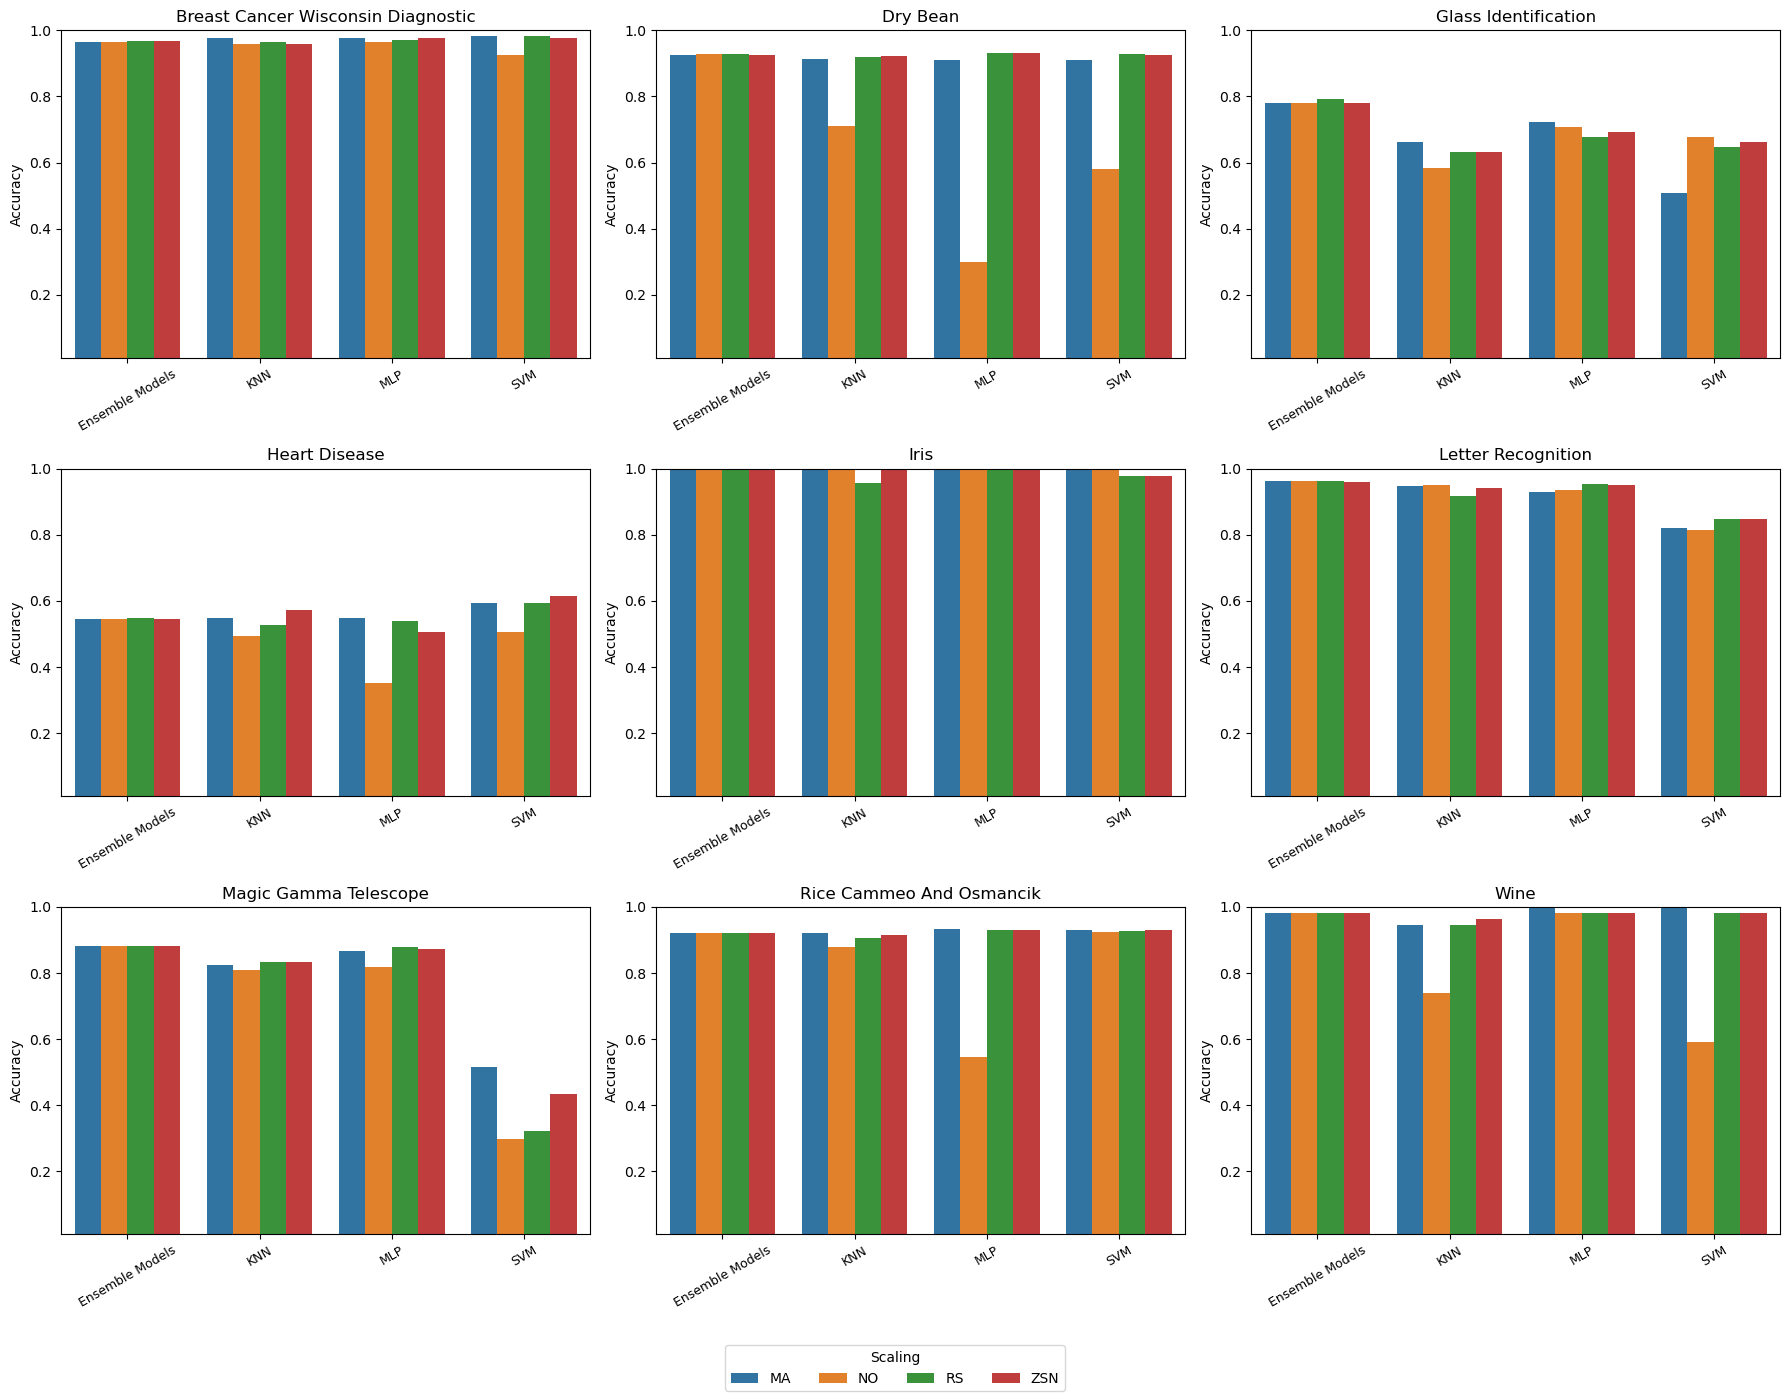

In [7]:
# List of datasets to process
output_dir = "final_results/figures_accuracy_scaling"
os.makedirs(output_dir, exist_ok=True)

df = df_results.loc[df_results['accuracy'].notna()]
datasets = df_results['dataset_name'].loc[df_results['accuracy'].notna()].unique()
scalers = ["NO", "MA", "ZSN", "RS"]
df = df[df["scaling_abbrev"].isin(scalers)]

ensemble_models = ['RF', 'LGBM', 'CatBoost', 'XGBoost']
individual_models = ['MLP', 'SVM', 'KNN']
selected_models = ensemble_models + individual_models
df = df.loc[(df_results['model'].isin(selected_models))]
df['model_group'] = df['model'].apply(lambda m: 'Ensemble Models' if m in ensemble_models else m)

df_grouped = (
    df.groupby(['model_group', 'dataset_name', 'scaling_abbrev'])
    .agg({'accuracy': 'mean'})
    .reset_index()
)
fig, axes = plt.subplots(3, 3, figsize=(18, 14))
axes = axes.flatten()

for i, dataset in enumerate(datasets):
    df_filtered = df_grouped[df_grouped['dataset_name'] == dataset]
    nice_title = name_mapping.get(dataset, dataset)

    sns.barplot(
        data=df_filtered,
        x='model_group',
        y='accuracy',
        hue='scaling_abbrev',
        palette='tab10',
        ax=axes[i]
    )

    axes[i].set_title(nice_title, fontsize=12)
    axes[i].set_ylim(0.01, 1.0)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Accuracy")
    axes[i].tick_params(axis='x', rotation=30, labelsize=9)


    axes[i].get_legend().remove()


handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles, labels,
    title="Scaling",
    loc="lower center",  
    ncol=len(labels),    
    fontsize=10
)

plt.tight_layout(rect=[0, 0.05, 1, 1])  
plt.savefig(f"{output_dir}/all_datasets_accuracy.pdf")
plt.show()


In [14]:
df

accuracy model  time_train  time_inference  scaling_name  \
126   0.982456   SVM    0.000747        0.000225  MaxAbsScaler   
127   0.910872   SVM    0.193222        0.172348  MaxAbsScaler   
128   0.507692   SVM    0.000689        0.000164  MaxAbsScaler   
129   0.593407   SVM    0.000921        0.000201  MaxAbsScaler   
130   1.000000   SVM    0.000354        0.000093  MaxAbsScaler   
...        ...   ...         ...             ...           ...   
2274       NaN   KNN    0.000424        0.021626  RobustScaler   
2275       NaN   KNN    0.000363        0.000994  RobustScaler   
2276       NaN   KNN    0.000271        0.000522  RobustScaler   
2277       NaN   KNN    0.000235        0.000331  RobustScaler   
2278       NaN   KNN    0.002160        0.032950  RobustScaler   

                            dataset_name  memory_used_kb   r2score        mae  \
126   breast_cancer_wisconsin_diagnostic      175.726562       NaN        NaN   
127                     dry_bean_dataset     2448.359375       NaN        NaN   
128                 glass_identification       23.187500       NaN        NaN   
129                        heart_disease       67.179688       NaN        NaN   
130                                 iris        8.757812       NaN        NaN   
...                                  ...             ...       ...        ...   
2274        appliances_energy_prediction     5832.521484  0.292863  41.582841   
2275       concrete_compressive_strength       94.331055  0.744605   6.423728   
2276                        forest_fires      157.776367 -0.034472  19.781795   
2277               real_estate_valuation       78.967773  0.634762   5.581920   
2278                        wine_quality      625.128906  0.323390   0.534872   

              mse scaling_abbrev model_group  
126           NaN             MA         SVM  
127           NaN             MA         SVM  
128           NaN             MA         SVM  
129           NaN             MA         SVM  
130           NaN             MA         SVM  
...           ...            ...         ...  
2274  7285.365310             RS         KNN  
2275    69.103392             RS         KNN  
2276  8232.242206             RS         KNN  
2277    61.077027             RS         KNN  
2278     0.493682             RS         KNN  

[420 rows x 12 columns]

#### Time to train

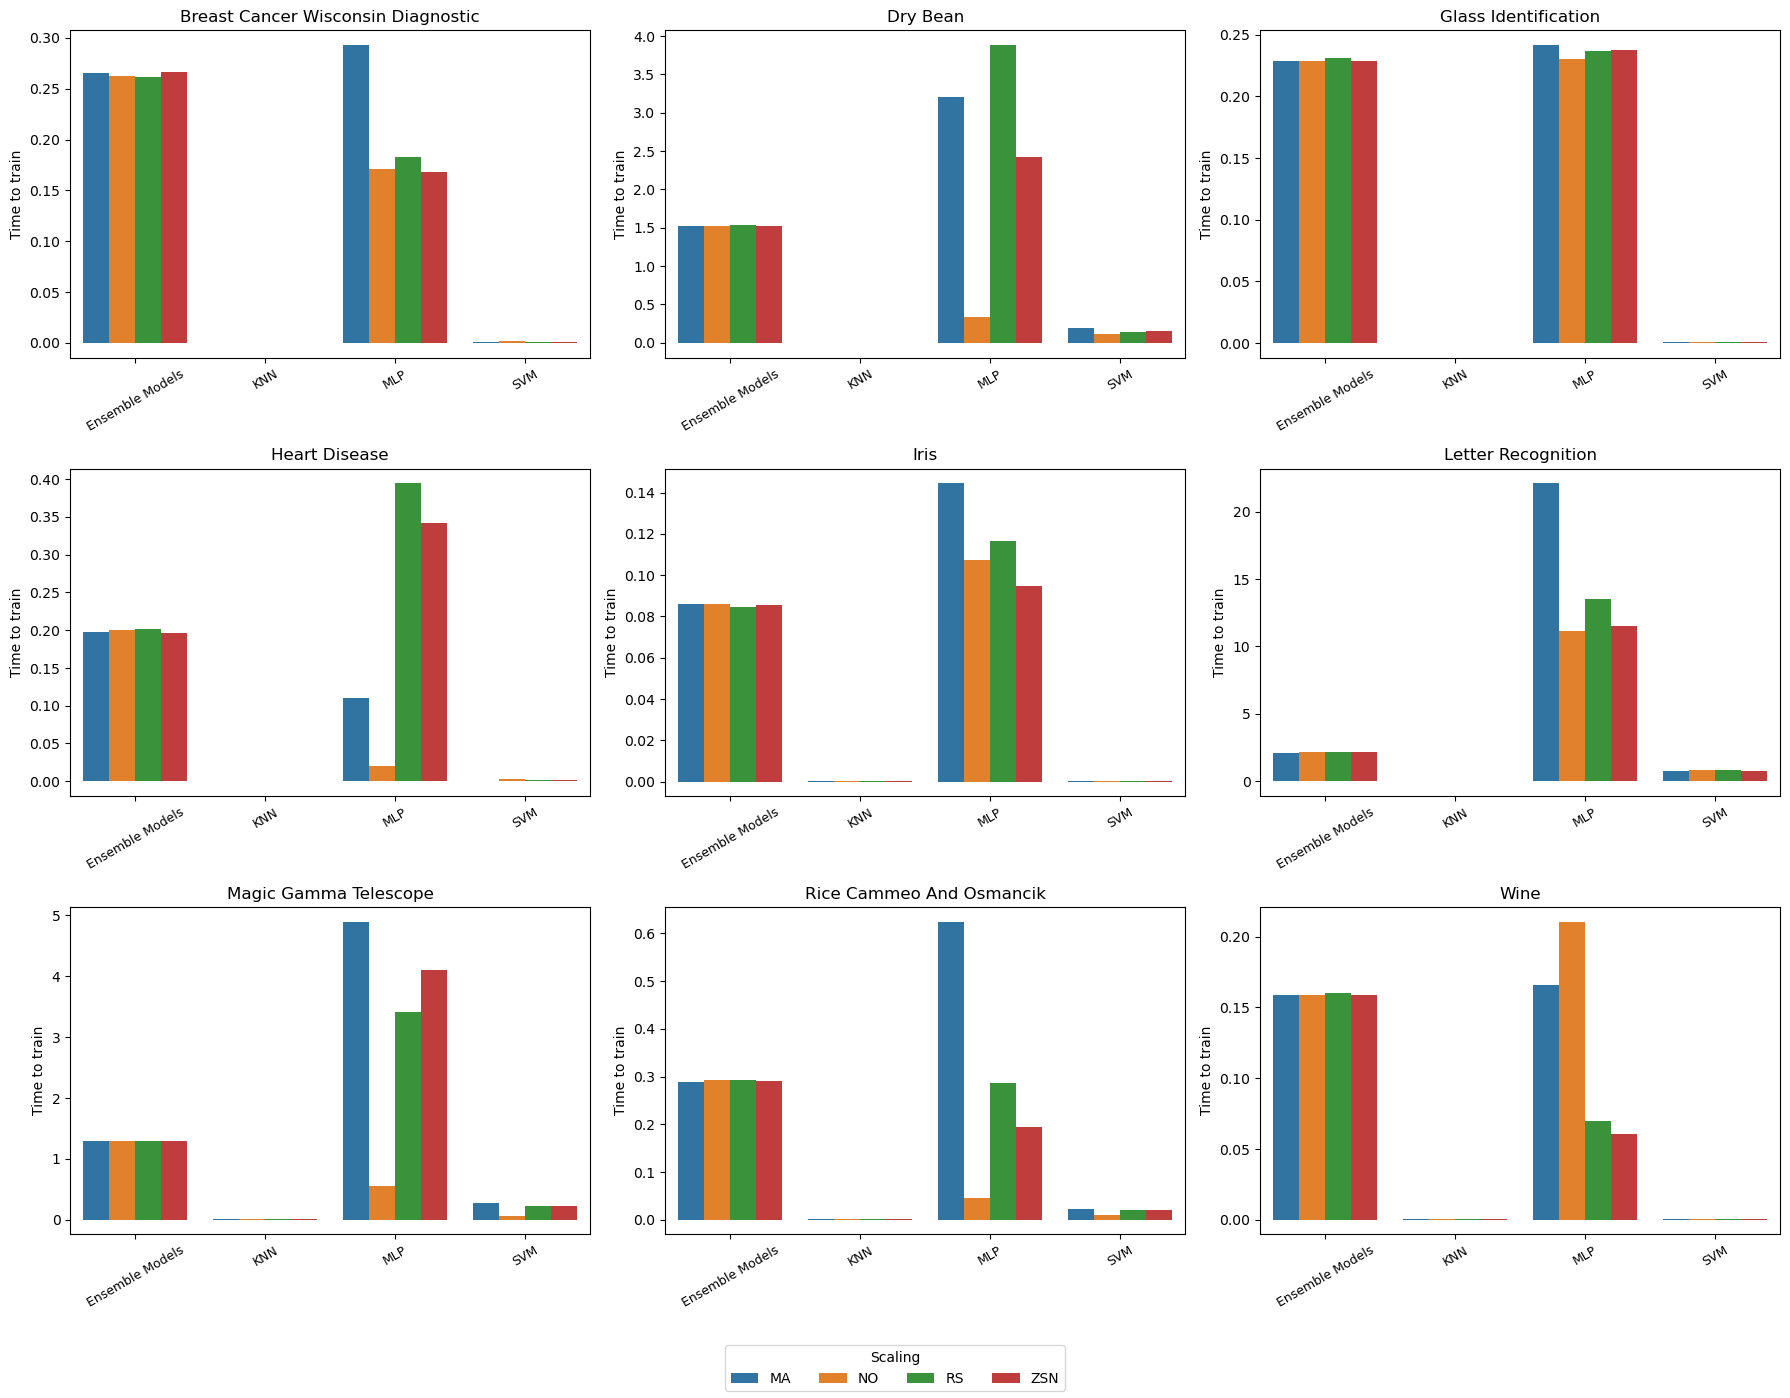

In [22]:
# List of datasets to process
output_dir = "final_results/figures_accuracy_scaling"
os.makedirs(output_dir, exist_ok=True)

df = df_results.loc[df_results['accuracy'].notna()]
datasets = df_results['dataset_name'].loc[df_results['accuracy'].notna()].unique()
scalers = ["NO", "MA", "ZSN", "RS"]
df = df[df["scaling_abbrev"].isin(scalers)]

ensemble_models = ['RF', 'LGBM', 'CatBoost', 'XGBoost']
individual_models = ['MLP', 'SVM', 'KNN']
selected_models = ensemble_models + individual_models
df = df.loc[(df_results['model'].isin(selected_models))]
df['model_group'] = df['model'].apply(lambda m: 'Ensemble Models' if m in ensemble_models else m)

df_grouped = (
    df.groupby(['model_group', 'dataset_name', 'scaling_abbrev'])
    .agg({'time_train': 'mean'})
    .reset_index()
)
fig, axes = plt.subplots(3, 3, figsize=(18, 14))
axes = axes.flatten()

for i, dataset in enumerate(datasets):
    df_filtered = df_grouped[df_grouped['dataset_name'] == dataset]
    nice_title = name_mapping.get(dataset, dataset)

    sns.barplot(
        data=df_filtered,
        x='model_group',
        y='time_train',
        hue='scaling_abbrev',
        palette='tab10',
        ax=axes[i]
    )

        # calcula limites dinâmicos
    ymin = df_filtered['time_train'].min()
    ymax = df_filtered['time_train'].max()
    margin = 0.05 * (ymax - ymin if ymax > ymin else 1)
    axes[i].set_ylim(ymin - margin, ymax + margin)

    axes[i].set_title(nice_title, fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Time to train")
    axes[i].tick_params(axis='x', rotation=30, labelsize=9)
    axes[i].get_legend().remove()



handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles, labels,
    title="Scaling",
    loc="lower center",  
    ncol=len(labels),    
    fontsize=10
)

plt.tight_layout(rect=[0, 0.05, 1, 1])  
plt.savefig(f"{output_dir}/all_datasets_accuracy_time_train.pdf")
plt.show()


#### Time to inference

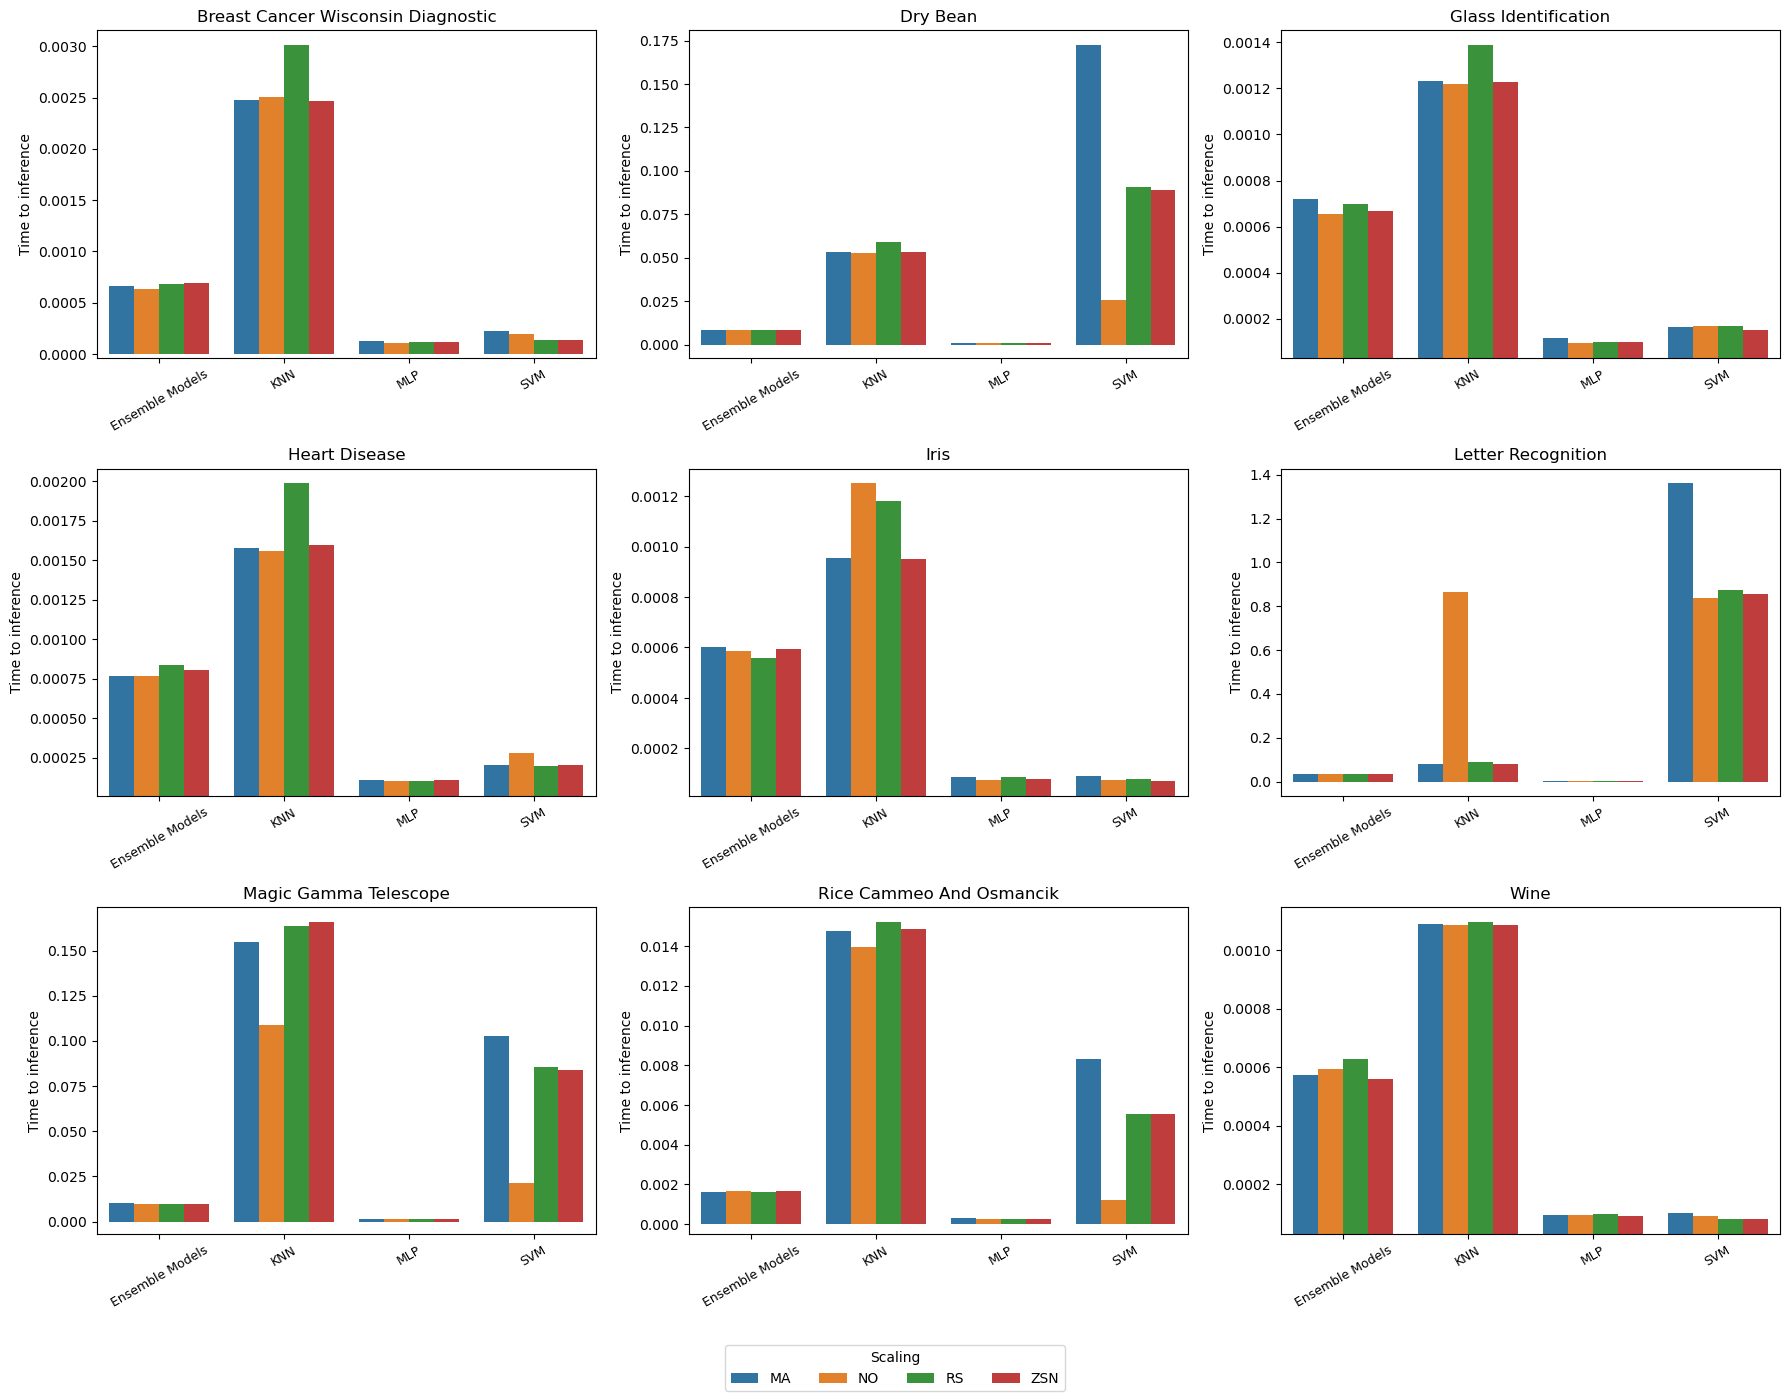

In [24]:
# List of datasets to process
output_dir = "final_results/figures_accuracy_scaling"
os.makedirs(output_dir, exist_ok=True)

df = df_results.loc[df_results['accuracy'].notna()]
datasets = df_results['dataset_name'].loc[df_results['accuracy'].notna()].unique()
scalers = ["NO", "MA", "ZSN", "RS"]
df = df[df["scaling_abbrev"].isin(scalers)]

ensemble_models = ['RF', 'LGBM', 'CatBoost', 'XGBoost']
individual_models = ['MLP', 'SVM', 'KNN']
selected_models = ensemble_models + individual_models
df = df.loc[(df_results['model'].isin(selected_models))]
df['model_group'] = df['model'].apply(lambda m: 'Ensemble Models' if m in ensemble_models else m)

df_grouped = (
    df.groupby(['model_group', 'dataset_name', 'scaling_abbrev'])
    .agg({'time_inference': 'mean'})
    .reset_index()
)
fig, axes = plt.subplots(3, 3, figsize=(18, 14))
axes = axes.flatten()

for i, dataset in enumerate(datasets):
    df_filtered = df_grouped[df_grouped['dataset_name'] == dataset]
    nice_title = name_mapping.get(dataset, dataset)

    sns.barplot(
        data=df_filtered,
        x='model_group',
        y='time_inference',
        hue='scaling_abbrev',
        palette='tab10',
        ax=axes[i]
    )

        # calcula limites dinâmicos
    ymin = df_filtered['time_inference'].min()
    ymax = df_filtered['time_inference'].max()
    margin = 0.05 * (ymax - ymin if ymax > ymin else 1)
    axes[i].set_ylim(ymin - margin, ymax + margin)

    axes[i].set_title(nice_title, fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Time to inference")
    axes[i].tick_params(axis='x', rotation=30, labelsize=9)
    axes[i].get_legend().remove()



handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles, labels,
    title="Scaling",
    loc="lower center",  
    ncol=len(labels),    
    fontsize=10
)

plt.tight_layout(rect=[0, 0.05, 1, 1])  
plt.savefig(f"{output_dir}/all_datasets_accuracy_time_inf.pdf")
plt.show()


#### MSE

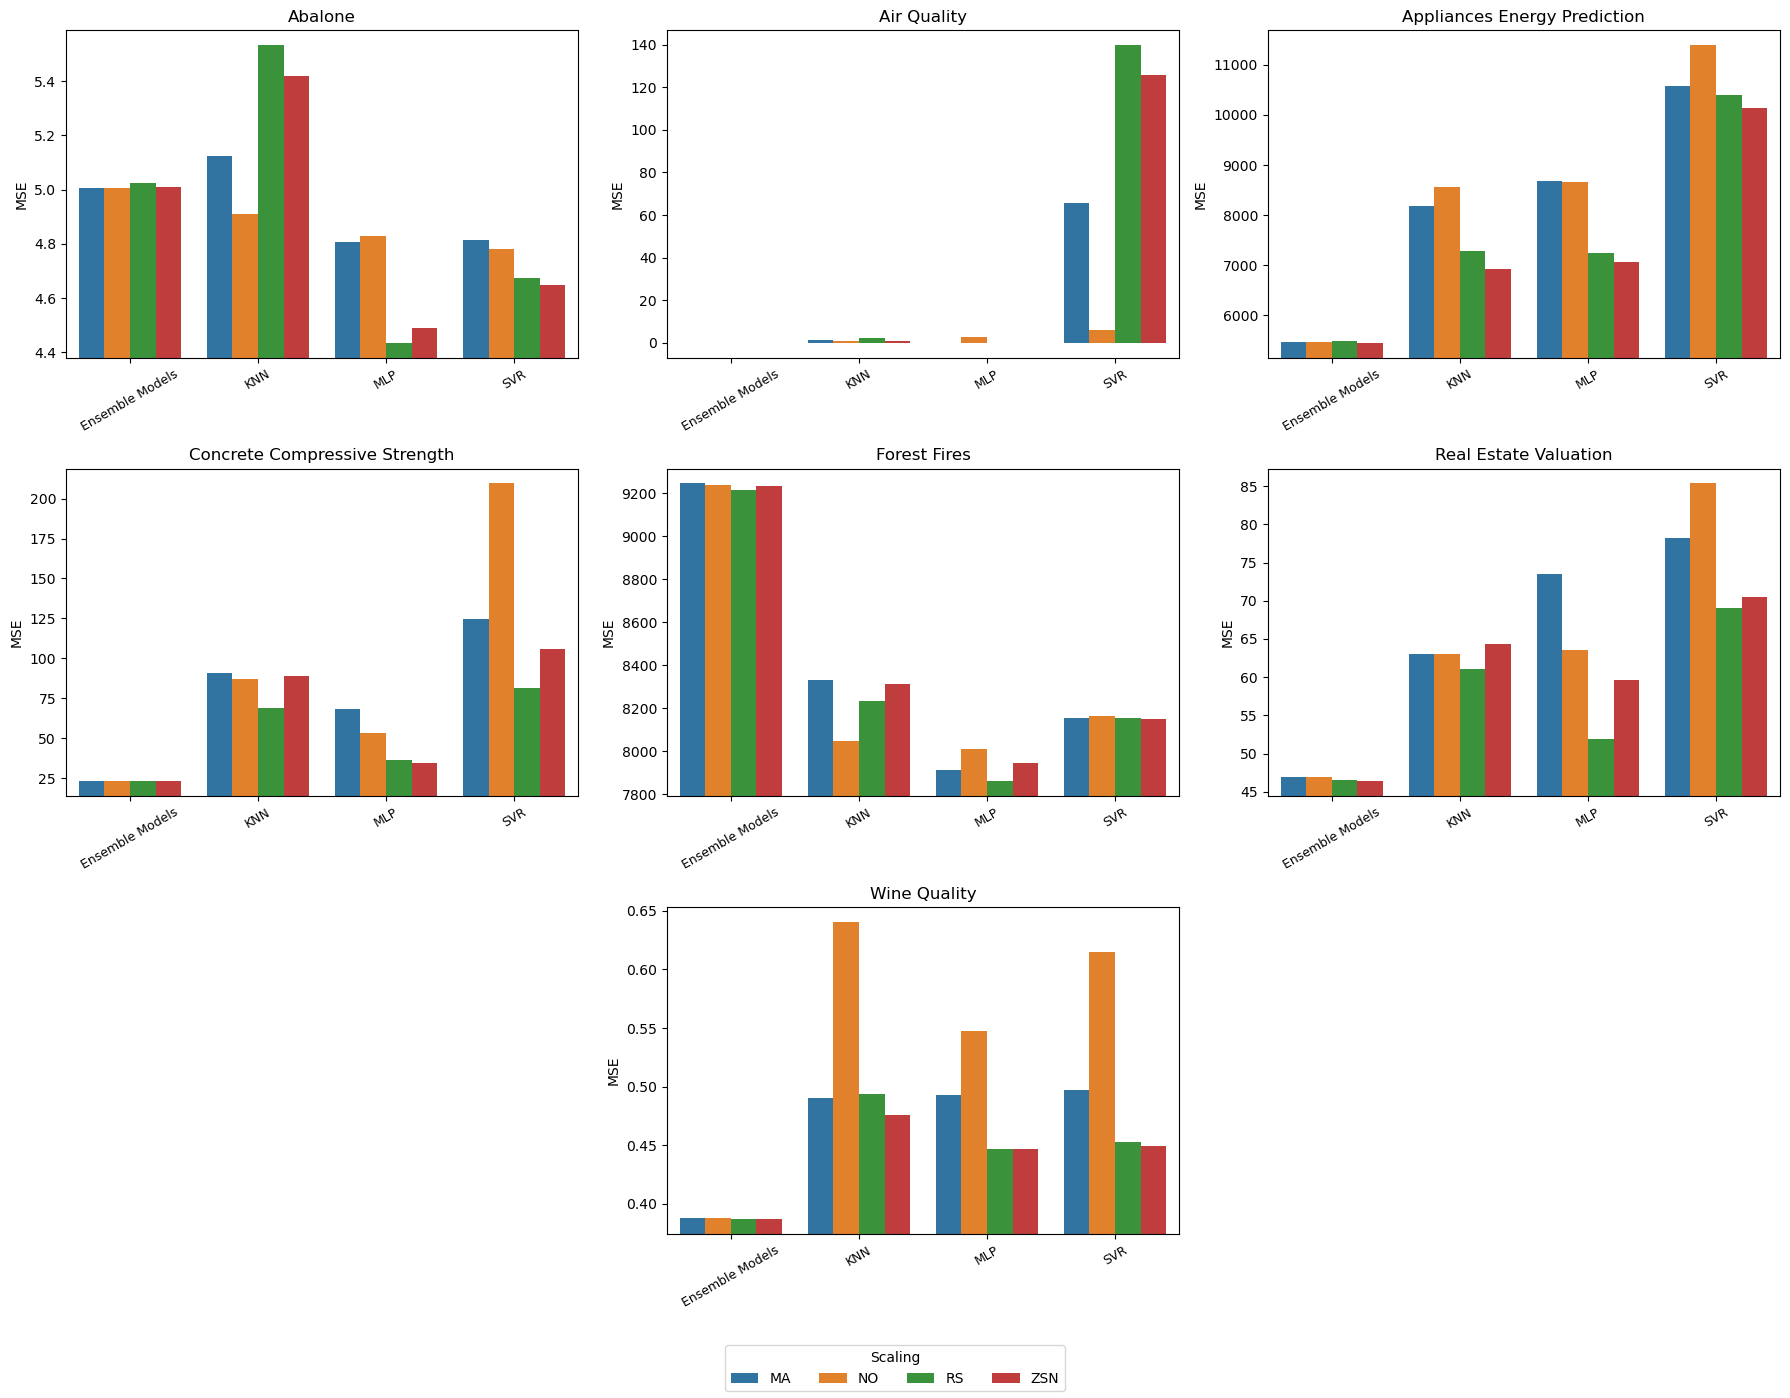

In [8]:
output_dir = "final_results/figures_regression_scaling"
os.makedirs(output_dir, exist_ok=True)


df = df_results.loc[df_results['mse'].notna()]
scalers = ["NO", "MA", "ZSN", "RS"]
df = df[df["scaling_abbrev"].isin(scalers)]


datasets = df['dataset_name'].unique()


ensemble_models = ['RF', 'LGBM','CatBoost', 'XGBoost']
individual_models = ['MLP', 'SVR', 'KNN']
selected_models = ensemble_models + individual_models
df = df.loc[(df_results['model'].isin(selected_models))]
df['model_group'] = df['model'].apply(
    lambda m: 'Ensemble Models' if m in ensemble_models else m
)


df_grouped = (
    df.groupby(['model_group', 'dataset_name', 'scaling_abbrev'], dropna=False)
    .agg({'mse': 'mean'})
    .reset_index()
)

df_grouped['mse'] = df_grouped['mse'].fillna(0)


fig, axes = plt.subplots(3, 3, figsize=(18, 14))
axes = axes.flatten()


df_first = df_grouped[df_grouped['dataset_name'] == datasets[0]]
sns.barplot(
    data=df_first,
    x='model_group',
    y='mse',
    hue='scaling_abbrev',
    palette='tab10',
    ax=axes[0]
)
handles, labels = axes[0].get_legend_handles_labels()
axes[0].get_legend().remove()

for i, dataset in enumerate(datasets):

    ax_idx = i if i < 6 else 7

    df_filtered = df_grouped[df_grouped['dataset_name'] == dataset]
    nice_title = name_mapping.get(dataset, dataset)

    sns.barplot(
        data=df_filtered,
        x='model_group',
        y='mse',
        hue='scaling_abbrev',
        palette='tab10',
        ax=axes[ax_idx]
    )

    axes[ax_idx].set_title(nice_title, fontsize=12)
    axes[ax_idx].set_xlabel("")
    axes[ax_idx].set_ylabel("MSE")
    axes[ax_idx].tick_params(axis='x', rotation=30, labelsize=9)
    axes[ax_idx].get_legend().remove()

    # --- ajuste dinâmico do ylim ---
    ymin = df_filtered['mse'].min()
    ymax = df_filtered['mse'].max()
    margin = 0.05 * (ymax - ymin if ymax > ymin else 1)
    axes[ax_idx].set_ylim(ymin - margin, ymax + margin)


fig.delaxes(axes[6])
fig.delaxes(axes[8])


fig.legend(
    handles, labels,
    title="Scaling",
    loc="lower center",
    ncol=len(labels),
    fontsize=10
)

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig(f"{output_dir}/all_datasets_mse.pdf")
plt.show()


#### MAE

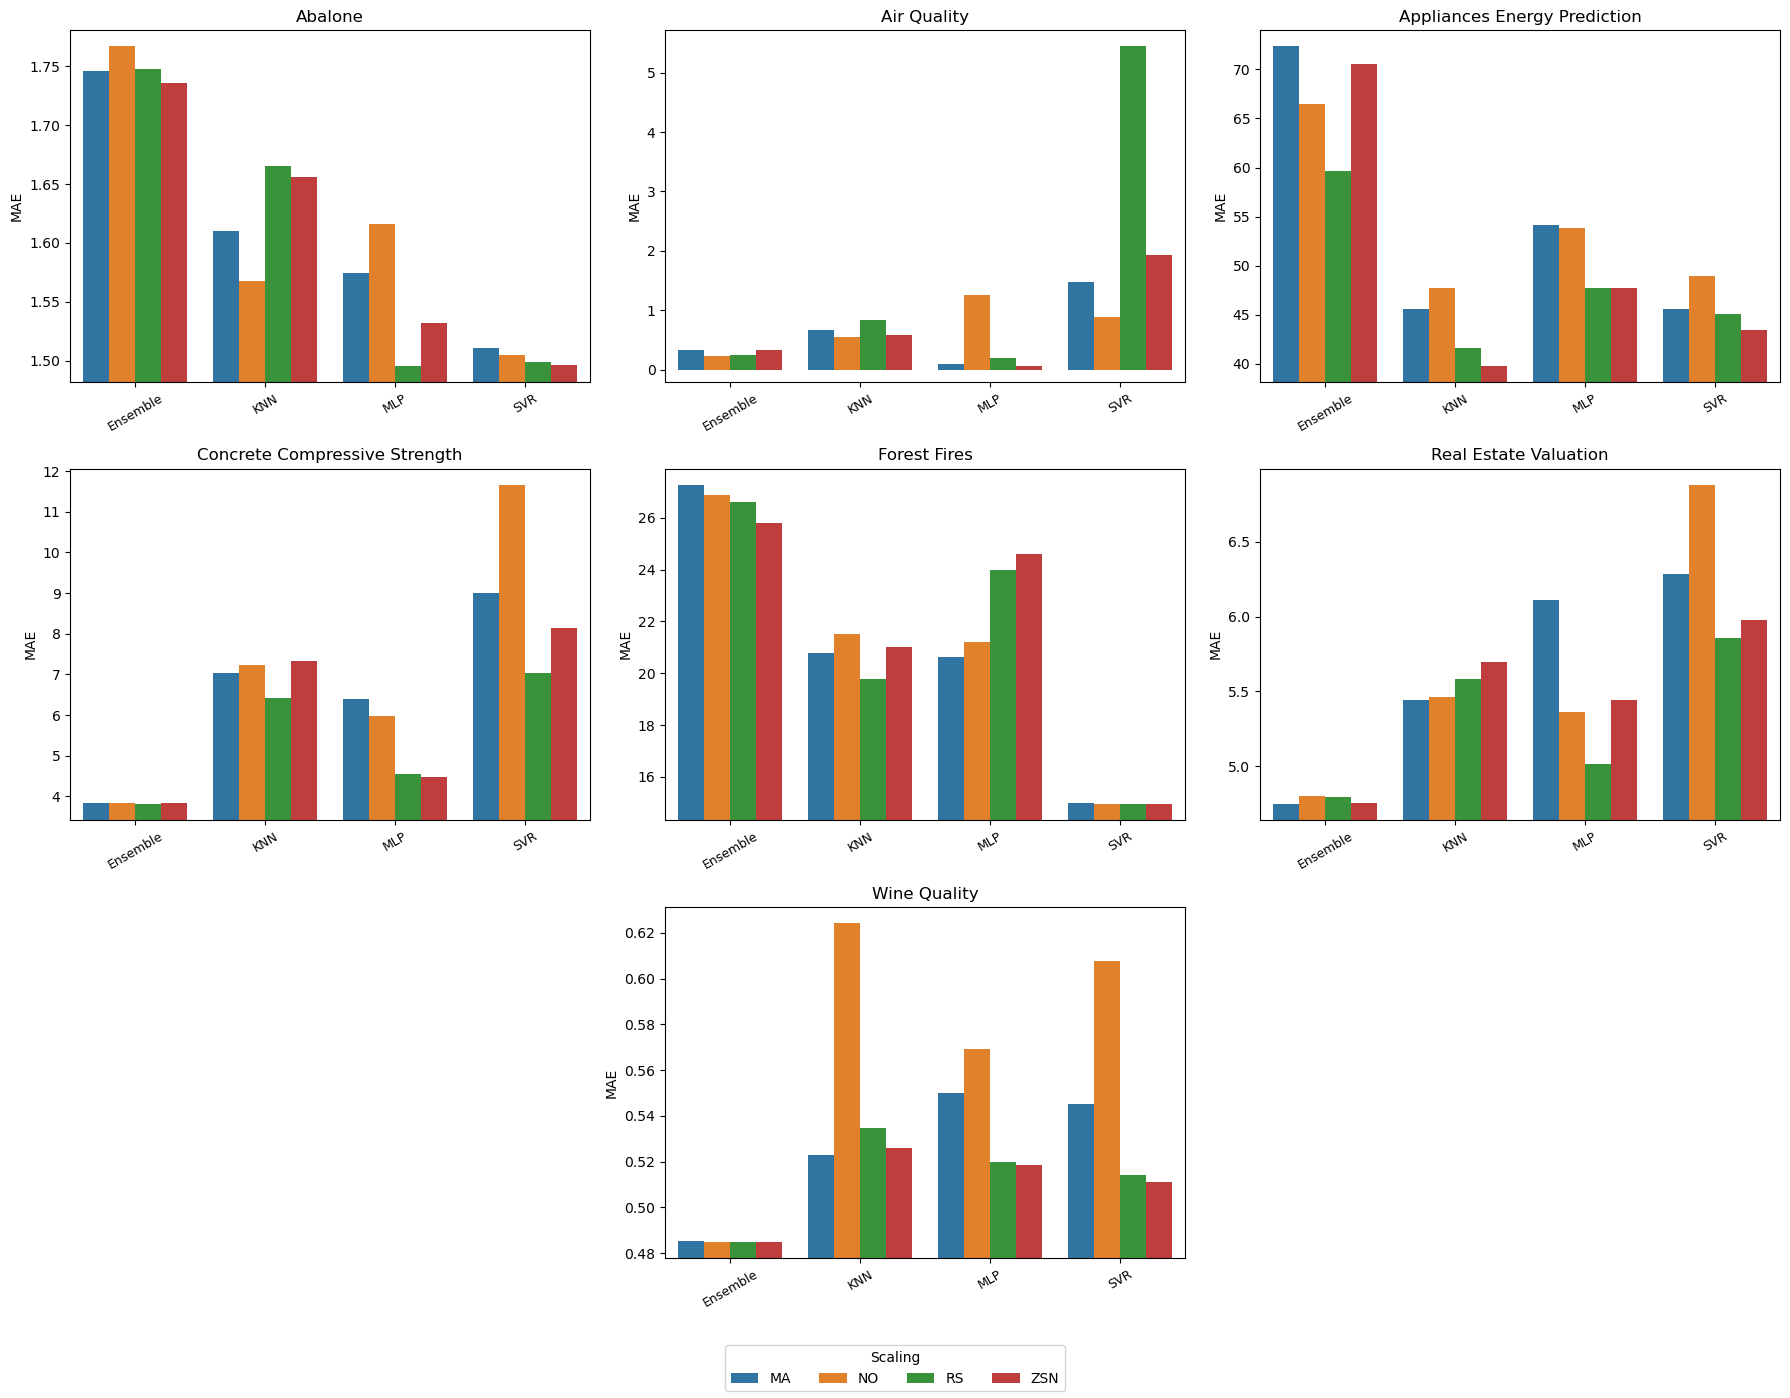

In [54]:
output_dir = "final_results/figures_regression_scaling"
os.makedirs(output_dir, exist_ok=True)


df = df_results.loc[df_results['mae'].notna()]
scalers = ["NO", "MA", "ZSN", "RS"]
df = df[df["scaling_abbrev"].isin(scalers)]


datasets = df['dataset_name'].unique()


ensemble_models = ['RF', 'LGBM', 'CatBoost', 'XGBoost']
individual_models = ['MLP', 'SVR', 'KNN']
selected_models = ensemble_models + individual_models
df = df.loc[(df_results['model'].isin(selected_models))]
df['model_group'] = df['model'].apply(
    lambda m: 'Ensemble' if m in ensemble_models else m
)


df_grouped = (
    df.groupby(['model_group', 'dataset_name', 'scaling_abbrev'], dropna=False)
    .agg({'mae': 'mean'})
    .reset_index()
)

df_grouped['mae'] = df_grouped['mae'].fillna(0)


fig, axes = plt.subplots(3, 3, figsize=(18, 14))
axes = axes.flatten()


df_first = df_grouped[df_grouped['dataset_name'] == datasets[0]]
sns.barplot(
    data=df_first,
    x='model_group',
    y='mae',
    hue='scaling_abbrev',
    palette='tab10',
    ax=axes[0]
)
handles, labels = axes[0].get_legend_handles_labels()
axes[0].get_legend().remove()

for i, dataset in enumerate(datasets):

    ax_idx = i if i < 6 else 7

    df_filtered = df_grouped[df_grouped['dataset_name'] == dataset]
    nice_title = name_mapping.get(dataset, dataset)

    sns.barplot(
        data=df_filtered,
        x='model_group',
        y='mae',
        hue='scaling_abbrev',
        palette='tab10',
        ax=axes[ax_idx]
    )

    axes[ax_idx].set_title(nice_title, fontsize=12)
    axes[ax_idx].set_xlabel("")
    axes[ax_idx].set_ylabel("MAE")
    axes[ax_idx].tick_params(axis='x', rotation=30, labelsize=9)
    axes[ax_idx].get_legend().remove()

    # --- ajuste dinâmico do ylim ---
    ymin = df_filtered['mae'].min()
    ymax = df_filtered['mae'].max()
    margin = 0.05 * (ymax - ymin if ymax > ymin else 1)
    axes[ax_idx].set_ylim(ymin - margin, ymax + margin)


fig.delaxes(axes[6])
fig.delaxes(axes[8])


fig.legend(
    handles, labels,
    title="Scaling",
    loc="lower center",
    ncol=len(labels),
    fontsize=10
)

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig(f"{output_dir}/all_datasets_mae.pdf")
plt.show()


#### $R^2$

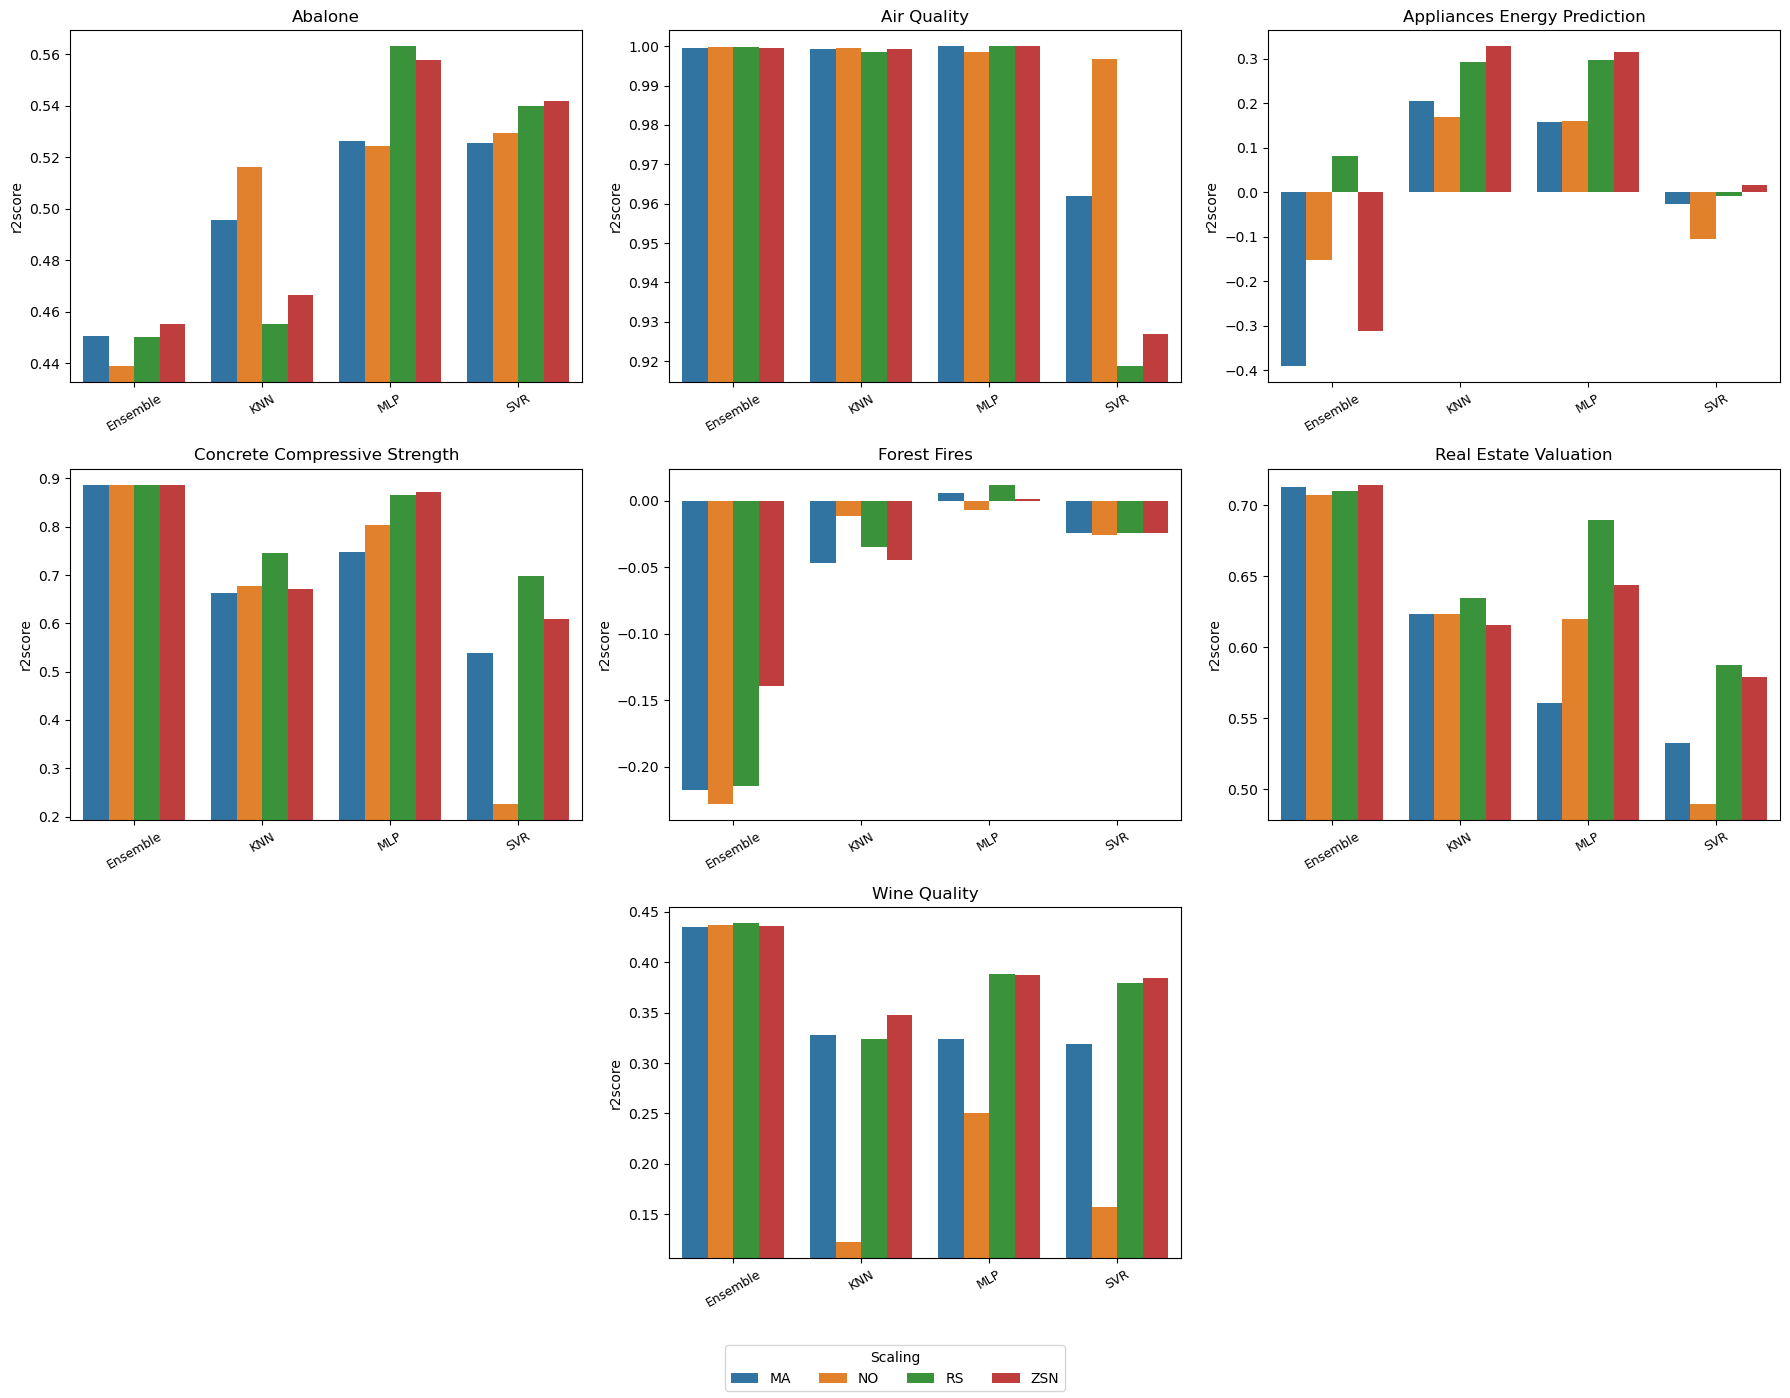

In [30]:
output_dir = "final_results/figures_regression_scaling"
os.makedirs(output_dir, exist_ok=True)


df = df_results.loc[df_results['r2score'].notna()]

scalers = ["NO", "MA", "ZSN", "RS"]
df = df[df["scaling_abbrev"].isin(scalers)]


datasets = df['dataset_name'].unique()


ensemble_models = ['RF', 'LGBM', 'CatBoost', 'XGBoost']
individual_models = ['MLP', 'SVR', 'KNN']
selected_models = ensemble_models + individual_models
df = df.loc[(df_results['model'].isin(selected_models))]
df['model_group'] = df['model'].apply(
    lambda m: 'Ensemble' if m in ensemble_models else m
)


df_grouped = (
    df.groupby(['model_group', 'dataset_name', 'scaling_abbrev'], dropna=False)
    .agg({'r2score': 'mean'})
    .reset_index()
)

df_grouped['r2score'] = df_grouped['r2score'].fillna(0)


fig, axes = plt.subplots(3, 3, figsize=(18, 14))
axes = axes.flatten()


df_first = df_grouped[df_grouped['dataset_name'] == datasets[0]]
sns.barplot(
    data=df_first,
    x='model_group',
    y='r2score',
    hue='scaling_abbrev',
    palette='tab10',
    ax=axes[0]
)
handles, labels = axes[0].get_legend_handles_labels()
axes[0].get_legend().remove()

for i, dataset in enumerate(datasets):

    ax_idx = i if i < 6 else 7

    df_filtered = df_grouped[df_grouped['dataset_name'] == dataset]
    nice_title = name_mapping.get(dataset, dataset)

    sns.barplot(
        data=df_filtered,
        x='model_group',
        y='r2score',
        hue='scaling_abbrev',
        palette='tab10',
        ax=axes[ax_idx]
    )

    axes[ax_idx].set_title(nice_title, fontsize=12)
    axes[ax_idx].set_xlabel("")
    axes[ax_idx].set_ylabel("r2score")
    axes[ax_idx].tick_params(axis='x', rotation=30, labelsize=9)
    axes[ax_idx].get_legend().remove()

    # --- ajuste dinâmico do ylim ---
    ymin = df_filtered['r2score'].min()
    ymax = df_filtered['r2score'].max()
    margin = 0.05 * (ymax - ymin if ymax > ymin else 1)
    axes[ax_idx].set_ylim(ymin - margin, ymax + margin)


fig.delaxes(axes[6])
fig.delaxes(axes[8])


fig.legend(
    handles, labels,
    title="Scaling",
    loc="lower center",
    ncol=len(labels),
    fontsize=10
)

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig(f"{output_dir}/all_datasets_r2score.pdf")
plt.show()


In [25]:
df

accuracy model  time_train  time_inference  scaling_name  \
126   0.982456   SVM    0.000747        0.000225  MaxAbsScaler   
127   0.910872   SVM    0.193222        0.172348  MaxAbsScaler   
128   0.507692   SVM    0.000689        0.000164  MaxAbsScaler   
129   0.593407   SVM    0.000921        0.000201  MaxAbsScaler   
130   1.000000   SVM    0.000354        0.000093  MaxAbsScaler   
...        ...   ...         ...             ...           ...   
1237  0.955556   KNN    0.000325        0.001182  RobustScaler   
1238  0.915833   KNN    0.000992        0.086961  RobustScaler   
1239  0.834034   KNN    0.007052        0.163513  RobustScaler   
1240  0.906387   KNN    0.000984        0.015221  RobustScaler   
1241  0.944444   KNN    0.000276        0.001097  RobustScaler   

                            dataset_name  memory_used_kb  r2score  mae  mse  \
126   breast_cancer_wisconsin_diagnostic      175.726562      NaN  NaN  NaN   
127                     dry_bean_dataset     2448.359375      NaN  NaN  NaN   
128                 glass_identification       23.187500      NaN  NaN  NaN   
129                        heart_disease       67.179688      NaN  NaN  NaN   
130                                 iris        8.757812      NaN  NaN  NaN   
...                                  ...             ...      ...  ...  ...   
1237                                iris       20.219727      NaN  NaN  NaN   
1238                  letter_recognition     2569.012695      NaN  NaN  NaN   
1239               magic_gamma_telescope     1553.046875      NaN  NaN  NaN   
1240            rice_cammeo_and_osmancik      298.004883      NaN  NaN  NaN   
1241                                wine       73.977539      NaN  NaN  NaN   

     scaling_abbrev model_group  
126              MA         SVM  
127              MA         SVM  
128              MA         SVM  
129              MA         SVM  
130              MA         SVM  
...             ...         ...  
1237             RS         KNN  
1238             RS         KNN  
1239             RS         KNN  
1240             RS         KNN  
1241             RS         KNN  

[252 rows x 12 columns]

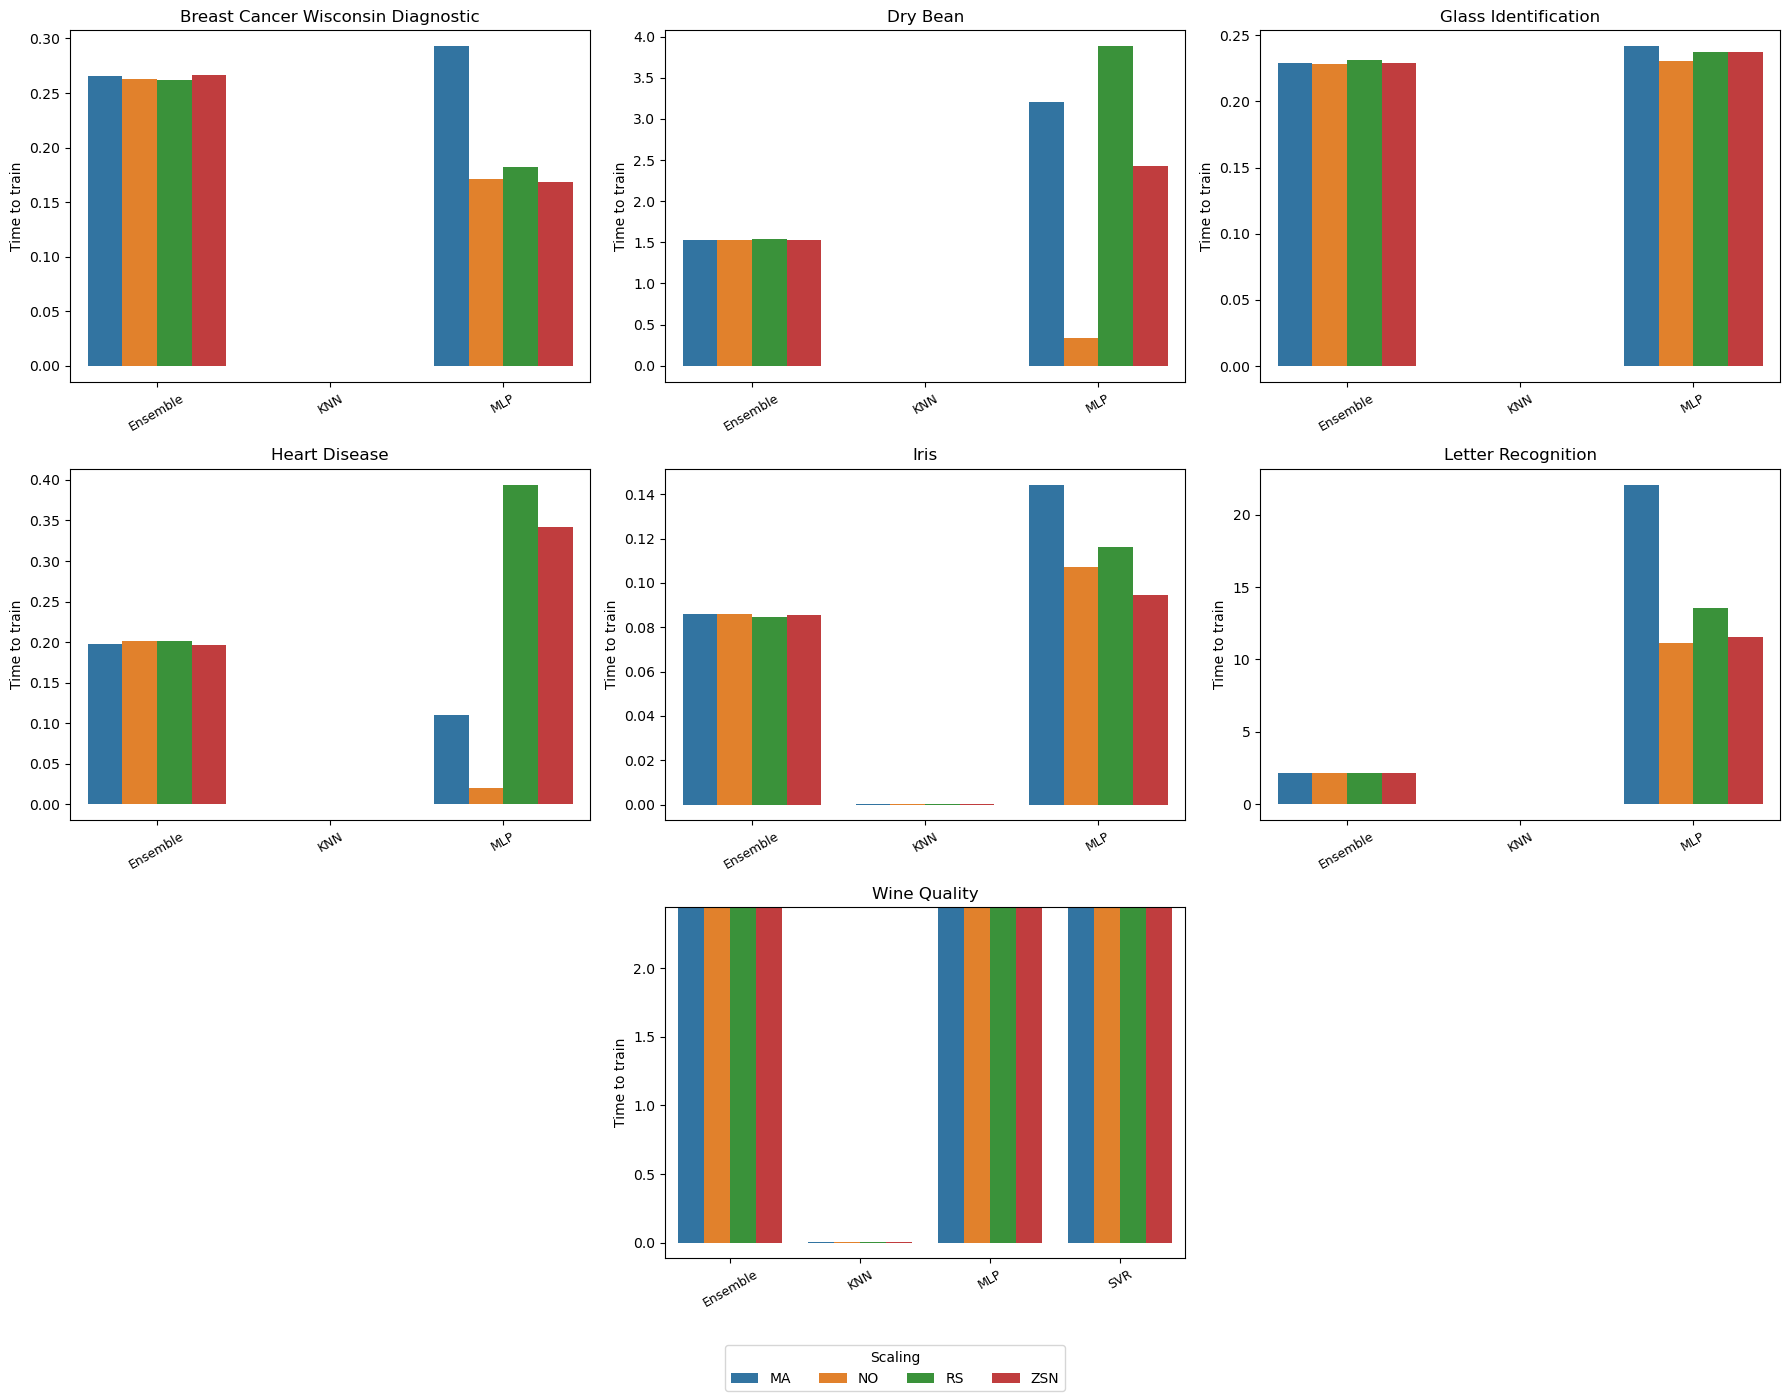

In [28]:
output_dir = "final_results/figures_regression_scaling"
os.makedirs(output_dir, exist_ok=True)


df = df_results.loc[df_results['time_train'].notna()]

scalers = ["NO", "MA", "ZSN", "RS"]
df = df[df["scaling_abbrev"].isin(scalers)]


datasets = df['dataset_name'].unique()


ensemble_models = ['RF', 'LGBM', 'CatBoost', 'XGBoost']
individual_models = ['MLP', 'SVR', 'KNN']
selected_models = ensemble_models + individual_models
df = df.loc[(df_results['model'].isin(selected_models))]
df['model_group'] = df['model'].apply(
    lambda m: 'Ensemble' if m in ensemble_models else m
)


df_grouped = (
    df.groupby(['model_group', 'dataset_name', 'scaling_abbrev'], dropna=False)
    .agg({'time_train': 'mean'})
    .reset_index()
)


fig, axes = plt.subplots(3, 3, figsize=(18, 14))
axes = axes.flatten()


df_first = df_grouped[df_grouped['dataset_name'] == datasets[0]]
sns.barplot(
    data=df_first,
    x='model_group',
    y='time_train',
    hue='scaling_abbrev',
    palette='tab10',
    ax=axes[0]
)
handles, labels = axes[0].get_legend_handles_labels()
axes[0].get_legend().remove()

for i, dataset in enumerate(datasets):

    ax_idx = i if i < 6 else 7

    df_filtered = df_grouped[df_grouped['dataset_name'] == dataset]
    nice_title = name_mapping.get(dataset, dataset)

    sns.barplot(
        data=df_filtered,
        x='model_group',
        y='time_train',
        hue='scaling_abbrev',
        palette='tab10',
        ax=axes[ax_idx]
    )

    axes[ax_idx].set_title(nice_title, fontsize=12)
    axes[ax_idx].set_xlabel("")
    axes[ax_idx].set_ylabel("Time to train")
    axes[ax_idx].tick_params(axis='x', rotation=30, labelsize=9)
    axes[ax_idx].get_legend().remove()

    # --- ajuste dinâmico do ylim ---
    ymin = df_filtered['time_train'].min()
    ymax = df_filtered['time_train'].max()
    margin = 0.05 * (ymax - ymin if ymax > ymin else 1)
    axes[ax_idx].set_ylim(ymin - margin, ymax + margin)


fig.delaxes(axes[6])
fig.delaxes(axes[8])


fig.legend(
    handles, labels,
    title="Scaling",
    loc="lower center",
    ncol=len(labels),
    fontsize=10
)

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig(f"{output_dir}/all_datasets_time_train_regression.pdf")
plt.show()


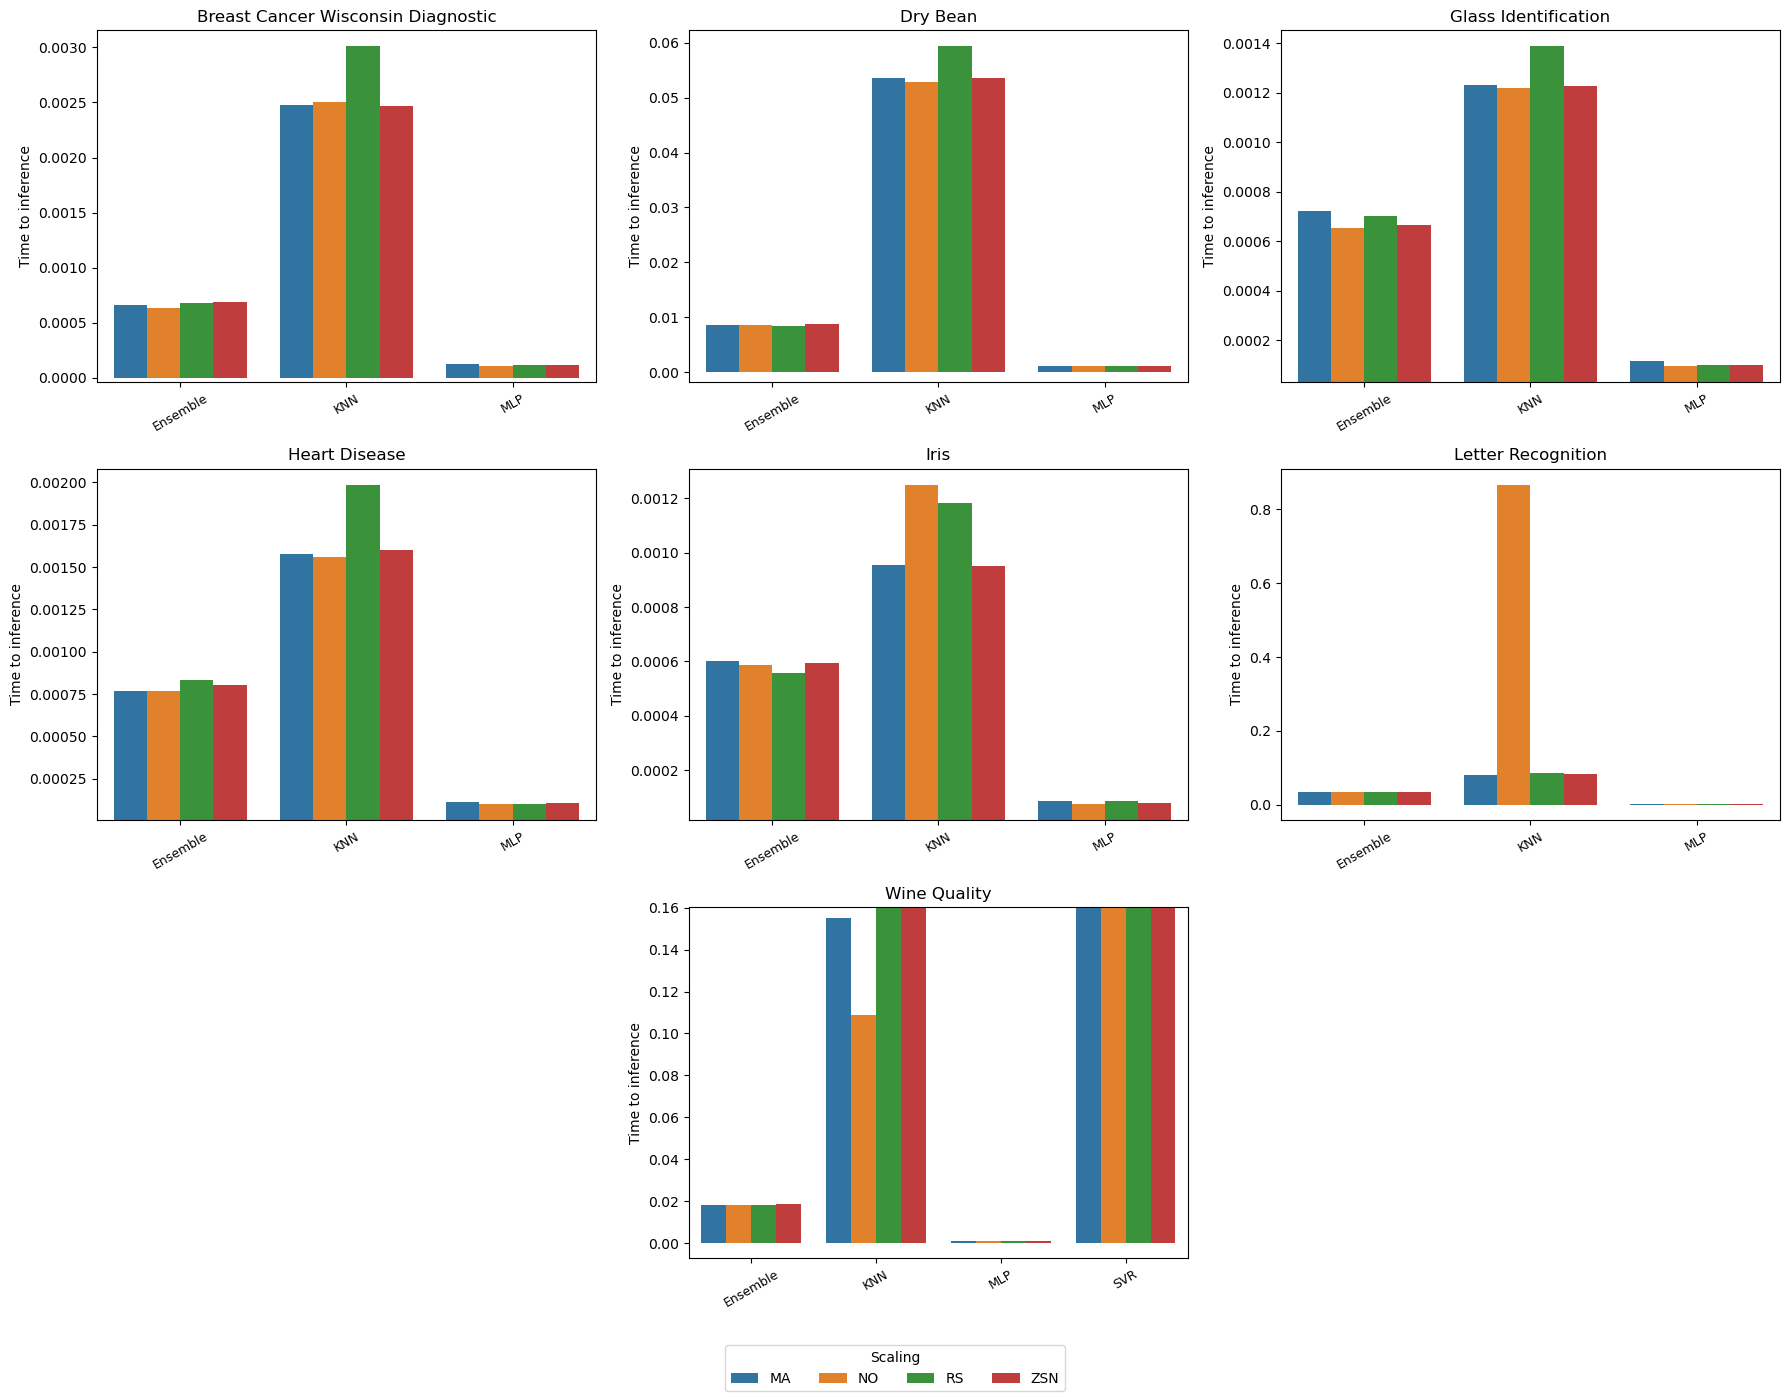

In [30]:
output_dir = "final_results/figures_regression_scaling"
os.makedirs(output_dir, exist_ok=True)


df = df_results.loc[df_results['time_train'].notna()]

scalers = ["NO", "MA", "ZSN", "RS"]
df = df[df["scaling_abbrev"].isin(scalers)]


datasets = df['dataset_name'].unique()


ensemble_models = ['RF', 'LGBM', 'CatBoost', 'XGBoost']
individual_models = ['MLP', 'SVR', 'KNN']
selected_models = ensemble_models + individual_models
df = df.loc[(df_results['model'].isin(selected_models))]
df['model_group'] = df['model'].apply(
    lambda m: 'Ensemble' if m in ensemble_models else m
)


df_grouped = (
    df.groupby(['model_group', 'dataset_name', 'scaling_abbrev'], dropna=False)
    .agg({'time_inference': 'mean'})
    .reset_index()
)


fig, axes = plt.subplots(3, 3, figsize=(18, 14))
axes = axes.flatten()


df_first = df_grouped[df_grouped['dataset_name'] == datasets[0]]
sns.barplot(
    data=df_first,
    x='model_group',
    y='time_inference',
    hue='scaling_abbrev',
    palette='tab10',
    ax=axes[0]
)
handles, labels = axes[0].get_legend_handles_labels()
axes[0].get_legend().remove()

for i, dataset in enumerate(datasets):

    ax_idx = i if i < 6 else 7

    df_filtered = df_grouped[df_grouped['dataset_name'] == dataset]
    nice_title = name_mapping.get(dataset, dataset)

    sns.barplot(
        data=df_filtered,
        x='model_group',
        y='time_inference',
        hue='scaling_abbrev',
        palette='tab10',
        ax=axes[ax_idx]
    )

    axes[ax_idx].set_title(nice_title, fontsize=12)
    axes[ax_idx].set_xlabel("")
    axes[ax_idx].set_ylabel("Time to inference")
    axes[ax_idx].tick_params(axis='x', rotation=30, labelsize=9)
    axes[ax_idx].get_legend().remove()

    # --- ajuste dinâmico do ylim ---
    ymin = df_filtered['time_inference'].min()
    ymax = df_filtered['time_inference'].max()
    margin = 0.05 * (ymax - ymin if ymax > ymin else 1)
    axes[ax_idx].set_ylim(ymin - margin, ymax + margin)


fig.delaxes(axes[6])
fig.delaxes(axes[8])


fig.legend(
    handles, labels,
    title="Scaling",
    loc="lower center",
    ncol=len(labels),
    fontsize=10
)

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig(f"{output_dir}/all_datasets_time_inf_regression.pdf")
plt.show()


#### Memory usage

/tmp/ipykernel_52869/3357199013.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_52869/3357199013.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_52869/3357199013.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_52869/3357199013.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_52869/3357199013.py:17: FutureWarning

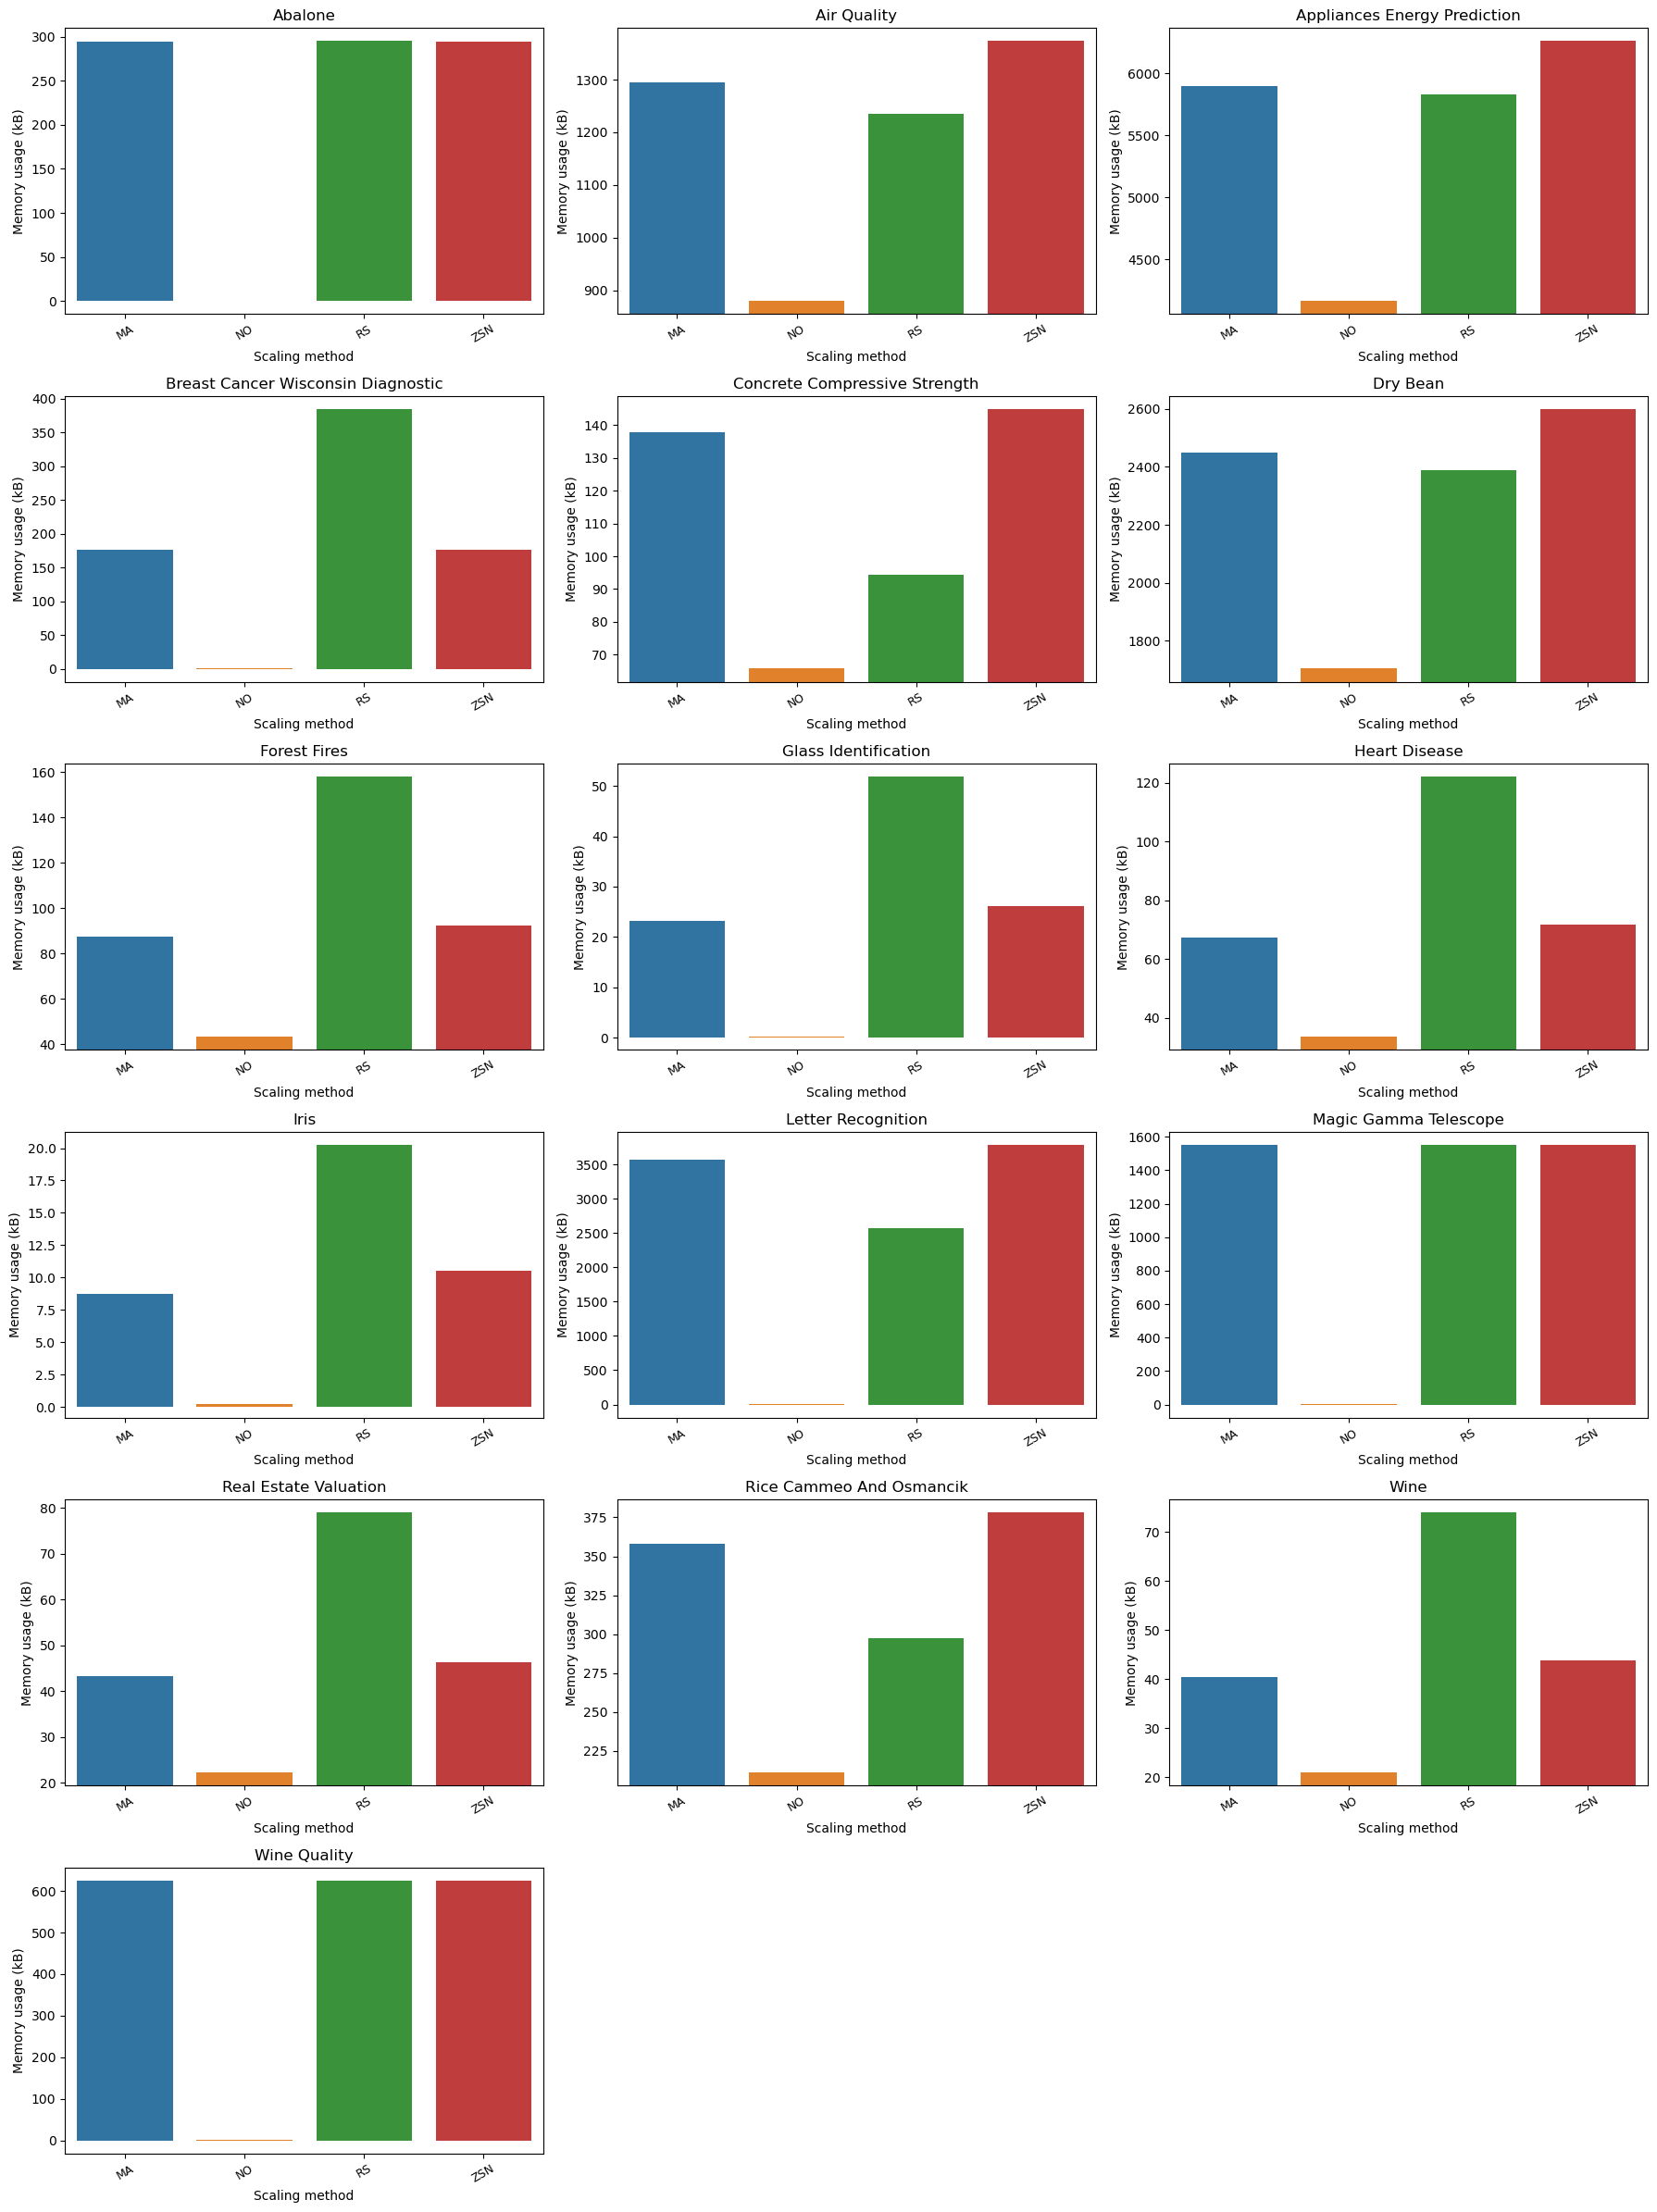

In [40]:
import math

datasets = df_grouped['dataset_name'].unique()
n_datasets = len(datasets)

ncols = 3
nrows = math.ceil(n_datasets / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(6*ncols, 4*nrows))
axes = axes.flatten()

for i, dataset in enumerate(datasets):
    ax_idx = i if i < 14 else 15
    df_filtered = df_grouped[df_grouped['dataset_name'] == dataset]
    nice_title = name_mapping.get(dataset, dataset)

    sns.barplot(
        data=df_filtered,
        x='scaling_abbrev',
        y='memory_used_kb',
        palette='tab10',
        ax=axes[i]
    )

    axes[i].set_title(nice_title, fontsize=12)
    axes[i].set_xlabel("Scaling method")
    axes[i].set_ylabel("Memory usage (kB)")
    axes[i].tick_params(axis='x', rotation=30, labelsize=9)

    # ajuste dinâmico do ylim
    ymin = df_filtered['memory_used_kb'].min()
    ymax = df_filtered['memory_used_kb'].max()
    margin = 0.05 * (ymax - ymin if ymax > ymin else 1)
    axes[i].set_ylim(ymin - margin, ymax + margin)

# remove subplots extras
for j in range(n_datasets, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


/tmp/ipykernel_52869/2865207406.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_52869/2865207406.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_52869/2865207406.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_52869/2865207406.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_52869/2865207406.py:22: FutureWarning

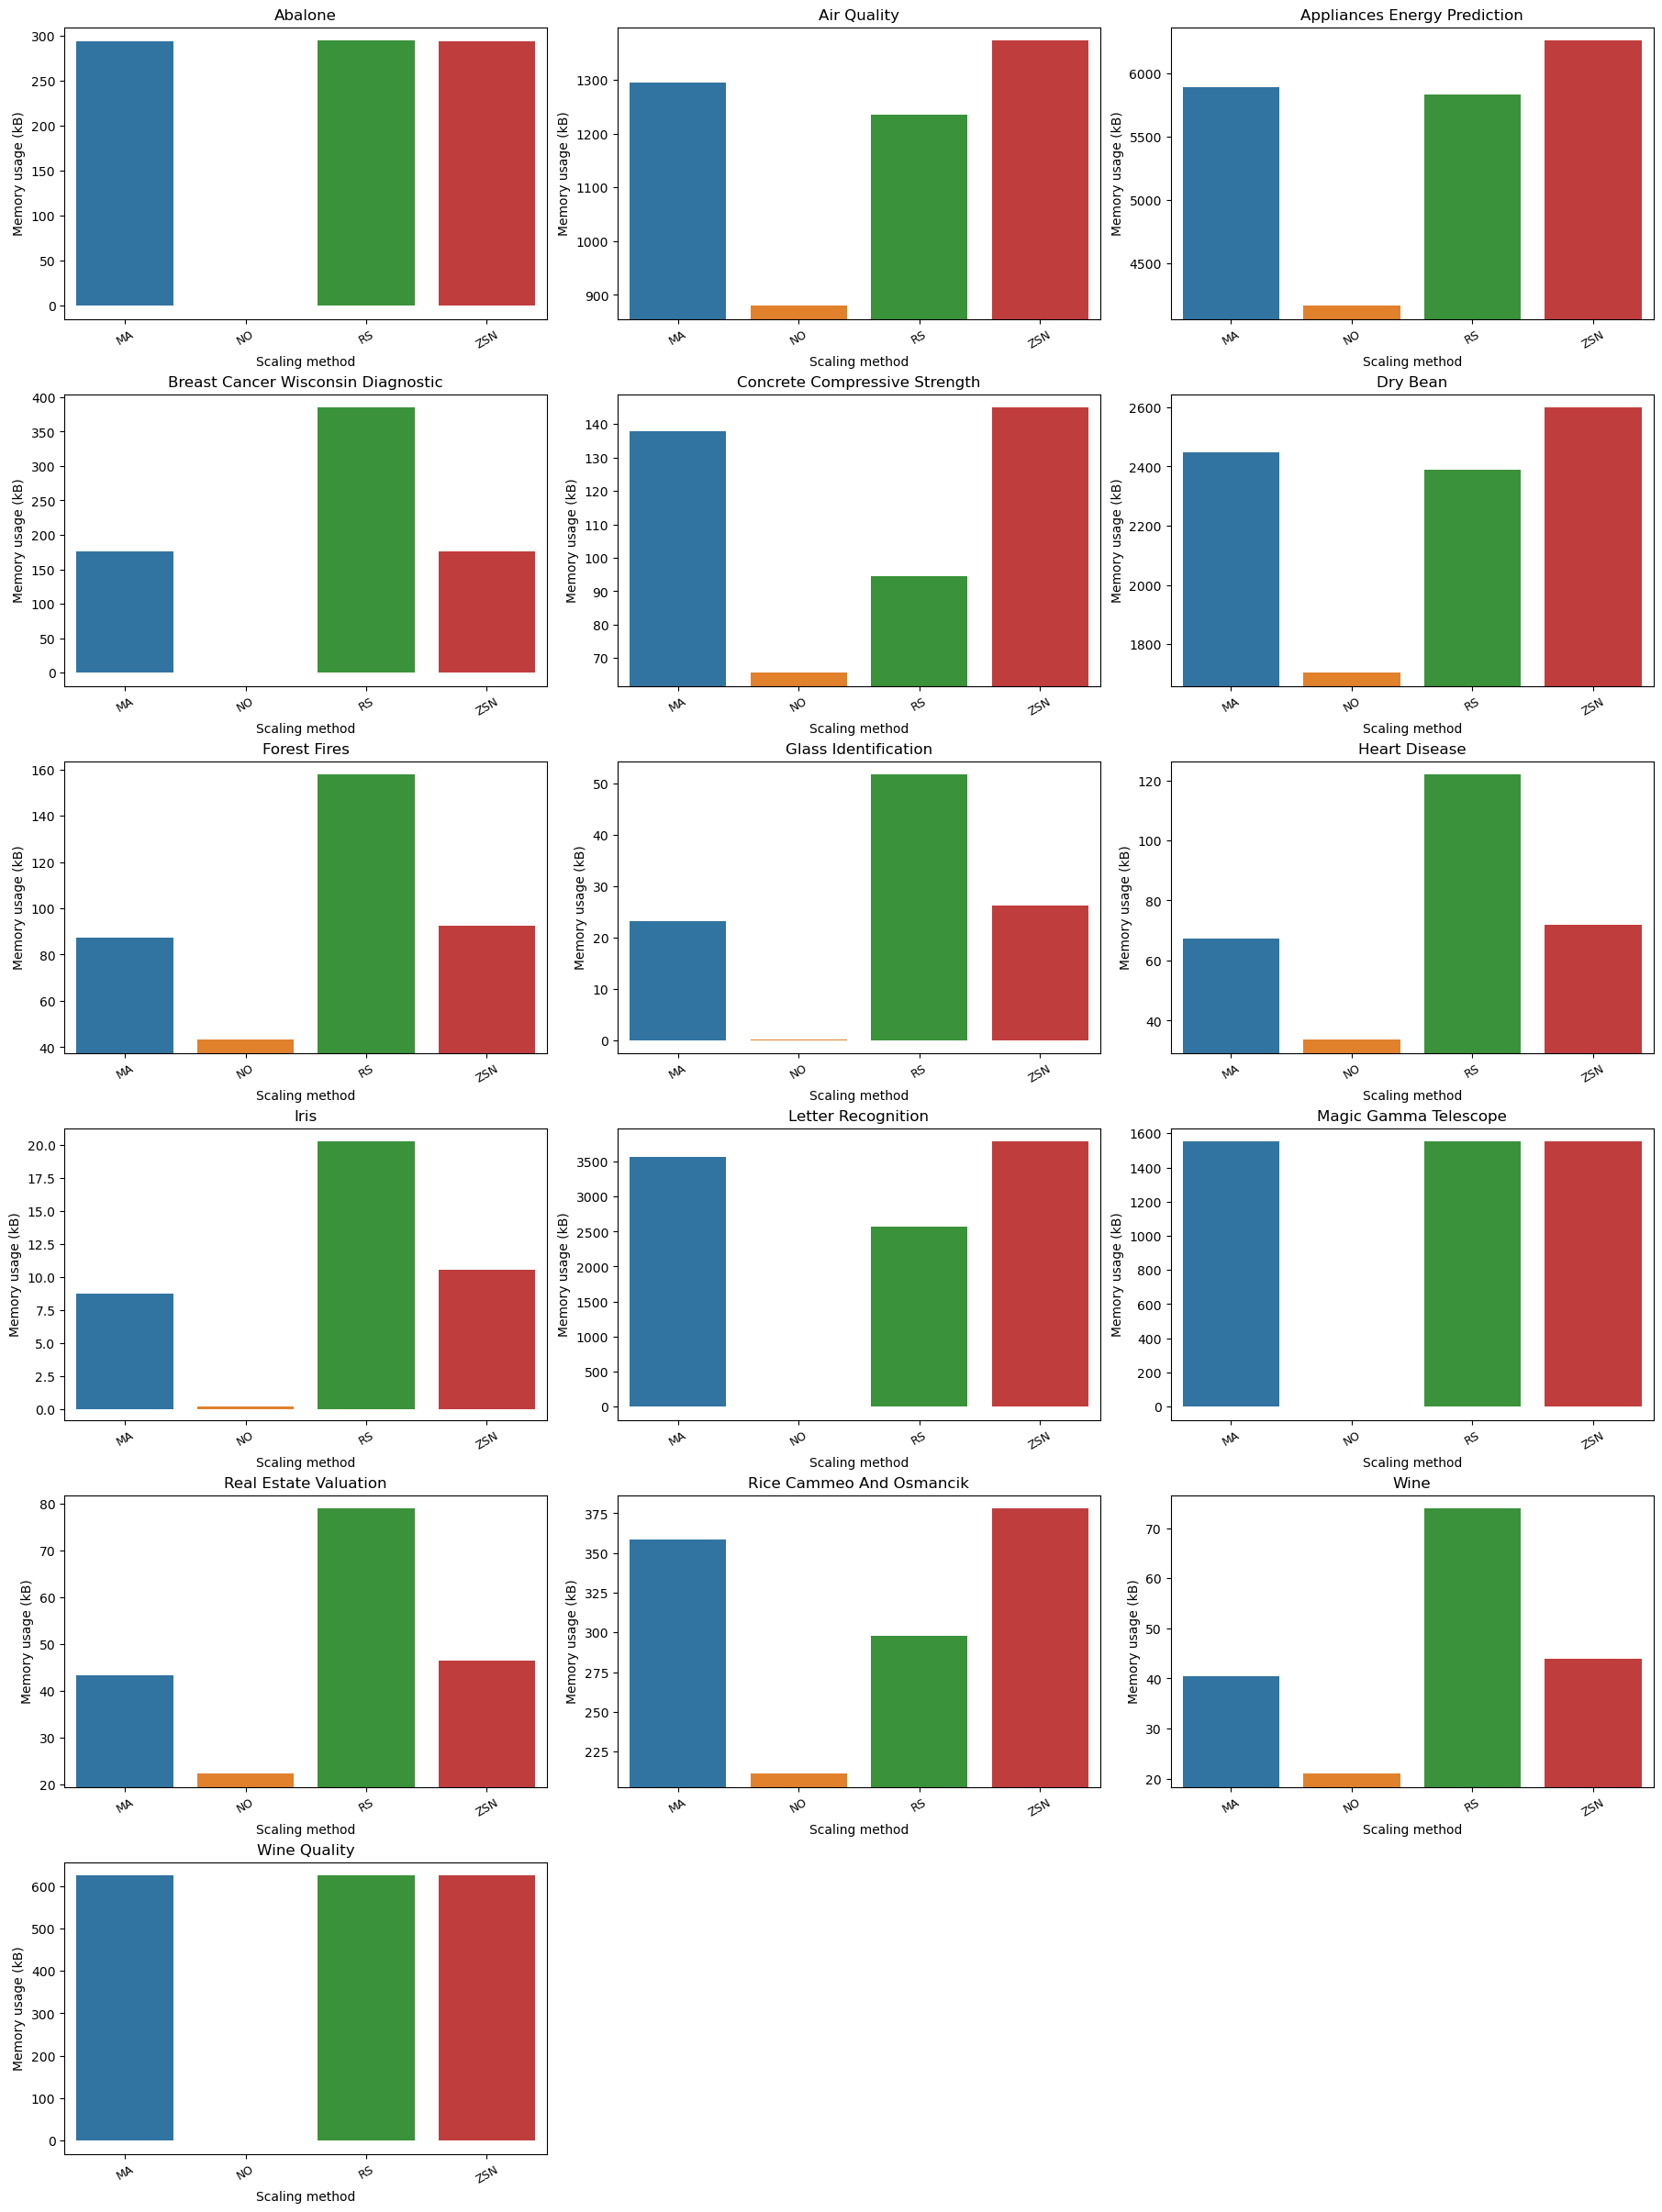

In [41]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

datasets = df_grouped['dataset_name'].unique()
n_datasets = len(datasets)

ncols = 3
nrows = math.ceil(n_datasets / ncols)

fig, axes = plt.subplots(
    nrows, ncols,
    figsize=(6*ncols, 4*nrows),
    constrained_layout=True  # <<< melhor que tight_layout + gambiarra
)
axes = axes.flatten()

for i, dataset in enumerate(datasets):
    df_filtered = df_grouped[df_grouped['dataset_name'] == dataset]
    nice_title = name_mapping.get(dataset, dataset)

    sns.barplot(
        data=df_filtered,
        x='scaling_abbrev',
        y='memory_used_kb',
        palette='tab10',
        ax=axes[i]
    )

    axes[i].set_title(nice_title, fontsize=12)
    axes[i].set_xlabel("Scaling method")
    axes[i].set_ylabel("Memory usage (kB)")
    axes[i].tick_params(axis='x', rotation=30, labelsize=9)

    # ajuste dinâmico do ylim
    ymin = df_filtered['memory_used_kb'].min()
    ymax = df_filtered['memory_used_kb'].max()
    margin = 0.05 * (ymax - ymin if ymax > ymin else 1)
    axes[i].set_ylim(ymin - margin, ymax + margin)

# Apaga os subplots que sobraram
for j in range(n_datasets, len(axes)):
    fig.delaxes(axes[j])

plt.savefig(f"{output_dir}/all_datasets_memory_usage.pdf")
plt.show()
